In [26]:
import pandas as  pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from statsmodels.tsa.stattools import adfuller



In [9]:
read_file = pd.read_excel("data.xlsx")
read_file.to_csv("data.csv", index=None, header=True)
df = pd.DataFrame(pd.read_csv("data.csv"))


In [10]:
df.head()

date  crude oil ( WTI)  Heating Oil   Conventional Gasoline   RBOB  \
0  2015-01-02             52.72         1.554                  1.378  1.586   
1  2015-01-05             50.05         1.646                  1.462  1.667   
2  2015-01-06             47.98         1.709                  1.540  1.750   
3  2015-01-07             48.69         1.774                  1.575  1.663   
4  2015-01-08             48.80         1.718                  1.483  1.659   

   Ultra-Low Sulfur CARB Diesel  Kerosene-Type Jet Fuel  Propane   \
0                         1.537                   1.539     0.546   
1                         1.518                   1.647     0.547   
2                         1.516                   1.709     0.574   
3                         1.599                   1.653     0.594   
4                         1.674                   1.675     0.604   

   Natural GAZ       DJIA    NASDAQ     sp500  bitcoin  USD FUTURE INDEX  \
0        2.889  17,501.65  4,726.81  2,058.20  8,726.2            99.596   
1        2.894  17,371.64  4,652.57  2,020.60  8,916.8            99.768   
2        2.855  17,584.52  4,592.74  2,002.60  8,547.4            98.940   
3        2.777  17,907.87  4,650.47  2,025.90  8,473.2            98.525   
4        2.816  17,737.37  4,736.19  2,062.10  8,143.5            97.614   

       gold  Silver   copper  
0  1,184.80  15.829   2.9295  
1  1,188.15  15.636   2.9205  
2  1,184.20  16.394   2.9350  
3  1,193.50  16.591   2.9260  
4  1,215.73  16.702   2.9180

In [11]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

print("Colonnes après nettoyage :")
print(df.columns)

Colonnes après nettoyage :
Index(['date', 'crude_oil_(_wti)', 'heating_oil', 'conventional_gasoline',
       'rbob', 'ultra-low_sulfur_carb_diesel', 'kerosene-type_jet_fuel',
       'propane', 'natural_gaz', 'djia', 'nasdaq', 'sp500', 'bitcoin',
       'usd_future_index', 'gold', 'silver', 'copper'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          2569 non-null   object 
 1   crude_oil_(_wti)              2505 non-null   float64
 2   heating_oil                   2569 non-null   float64
 3   conventional_gasoline         2569 non-null   float64
 4   rbob                          2568 non-null   float64
 5   ultra-low_sulfur_carb_diesel  2564 non-null   float64
 6   kerosene-type_jet_fuel        2568 non-null   float64
 7   propane                       2562 non-null   float64
 8   natural_gaz                   2516 non-null   float64
 9   djia                          2516 non-null   object 
 10  nasdaq                        2516 non-null   object 
 11  sp500                         2516 non-null   object 
 12  bitcoin                       2516 non-null   object 
 13  usd

In [13]:
df.describe()

crude_oil_(_wti)  heating_oil  conventional_gasoline         rbob  \
count       2505.000000  2569.000000            2569.000000  2568.000000   
mean          62.095126     2.010637               1.968033     2.139924   
std           18.389380     0.731783               0.601646     0.679083   
min          -36.980000     0.562000               0.434000     0.293000   
25%           48.480000     1.496000               1.543000     1.677750   
50%           59.930000     1.898000               1.905000     2.089000   
75%           74.260000     2.319000               2.315000     2.487250   
max          123.640000     5.152000               4.509000     4.968000   

       ultra-low_sulfur_carb_diesel  kerosene-type_jet_fuel      propane  \
count                   2564.000000             2568.000000  2562.000000   
mean                       2.128661                1.967736     0.730087   
std                        0.715283                0.708123     0.256789   
min                        0.566000                0.407000     0.203000   
25%                        1.619000                1.465750     0.513000   
50%                        2.033500                1.877000     0.701000   
75%                        2.440000                2.278000     0.887500   
max                        4.719000                5.066000     1.615000   

       natural_gaz  usd_future_index       silver       copper  
count  2516.000000       2516.000000  2516.000000  2516.000000  
mean      3.195873         98.077200    20.300121     3.261783  
std       1.425794          4.917052     4.836195     0.785926  
min       1.544000         88.505000    11.772000     1.943500  
25%       2.462250         94.524000    16.374500     2.631000  
50%       2.814000         97.206500    18.361500     3.073500  
75%       3.232000        101.789250    24.050750     3.980125  
max       9.647000        114.047000    35.041000     5.106000

In [14]:
print(df.isnull().any())  


date                            False
crude_oil_(_wti)                 True
heating_oil                     False
conventional_gasoline           False
rbob                             True
ultra-low_sulfur_carb_diesel     True
kerosene-type_jet_fuel           True
propane                          True
natural_gaz                      True
djia                             True
nasdaq                           True
sp500                            True
bitcoin                          True
usd_future_index                 True
gold                             True
silver                           True
copper                           True
dtype: bool


In [11]:
print(df.isnull().sum())

date                             0
crude_oil_(_wti)                64
heating_oil                      0
conventional_gasoline            0
rbob                             1
ultra-low_sulfur_carb_diesel     5
kerosene-type_jet_fuel           1
propane                          7
natural_gaz                     53
djia                            53
nasdaq                          53
sp500                           53
bitcoin                         53
usd_future_index                53
gold                            53
silver                          53
copper                          53
dtype: int64


In [15]:
df = df.ffill().bfill() 
thresh = int(df.shape[1] * 0.7)
df = df.dropna(thresh=thresh)
print('shape after cleaning:', df.shape)
df.isnull().sum()

shape after cleaning: (2569, 17)


date                            0
crude_oil_(_wti)                0
heating_oil                     0
conventional_gasoline           0
rbob                            0
ultra-low_sulfur_carb_diesel    0
kerosene-type_jet_fuel          0
propane                         0
natural_gaz                     0
djia                            0
nasdaq                          0
sp500                           0
bitcoin                         0
usd_future_index                0
gold                            0
silver                          0
copper                          0
dtype: int64

In [16]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df.dtypes

date                            datetime64[ns]
crude_oil_(_wti)                       float64
heating_oil                            float64
conventional_gasoline                  float64
rbob                                   float64
ultra-low_sulfur_carb_diesel           float64
kerosene-type_jet_fuel                 float64
propane                                float64
natural_gaz                            float64
djia                                    object
nasdaq                                  object
sp500                                   object
bitcoin                                 object
usd_future_index                       float64
gold                                    object
silver                                 float64
copper                                 float64
dtype: object

In [17]:
df = df.sort_values('date').set_index('date')
df = df.replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2569 entries, 2015-01-02 to 2024-12-31
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   crude_oil_(_wti)              2569 non-null   float64
 1   heating_oil                   2569 non-null   float64
 2   conventional_gasoline         2569 non-null   float64
 3   rbob                          2569 non-null   float64
 4   ultra-low_sulfur_carb_diesel  2569 non-null   float64
 5   kerosene-type_jet_fuel        2569 non-null   float64
 6   propane                       2569 non-null   float64
 7   natural_gaz                   2569 non-null   float64
 8   djia                          2569 non-null   float64
 9   nasdaq                        2569 non-null   float64
 10  sp500                         2569 non-null   float64
 11  bitcoin                       2569 non-null   float64
 12  usd_future_index              2569 non-null 

In [18]:
df.dtypes

crude_oil_(_wti)                float64
heating_oil                     float64
conventional_gasoline           float64
rbob                            float64
ultra-low_sulfur_carb_diesel    float64
kerosene-type_jet_fuel          float64
propane                         float64
natural_gaz                     float64
djia                            float64
nasdaq                          float64
sp500                           float64
bitcoin                         float64
usd_future_index                float64
gold                            float64
silver                          float64
copper                          float64
dtype: object

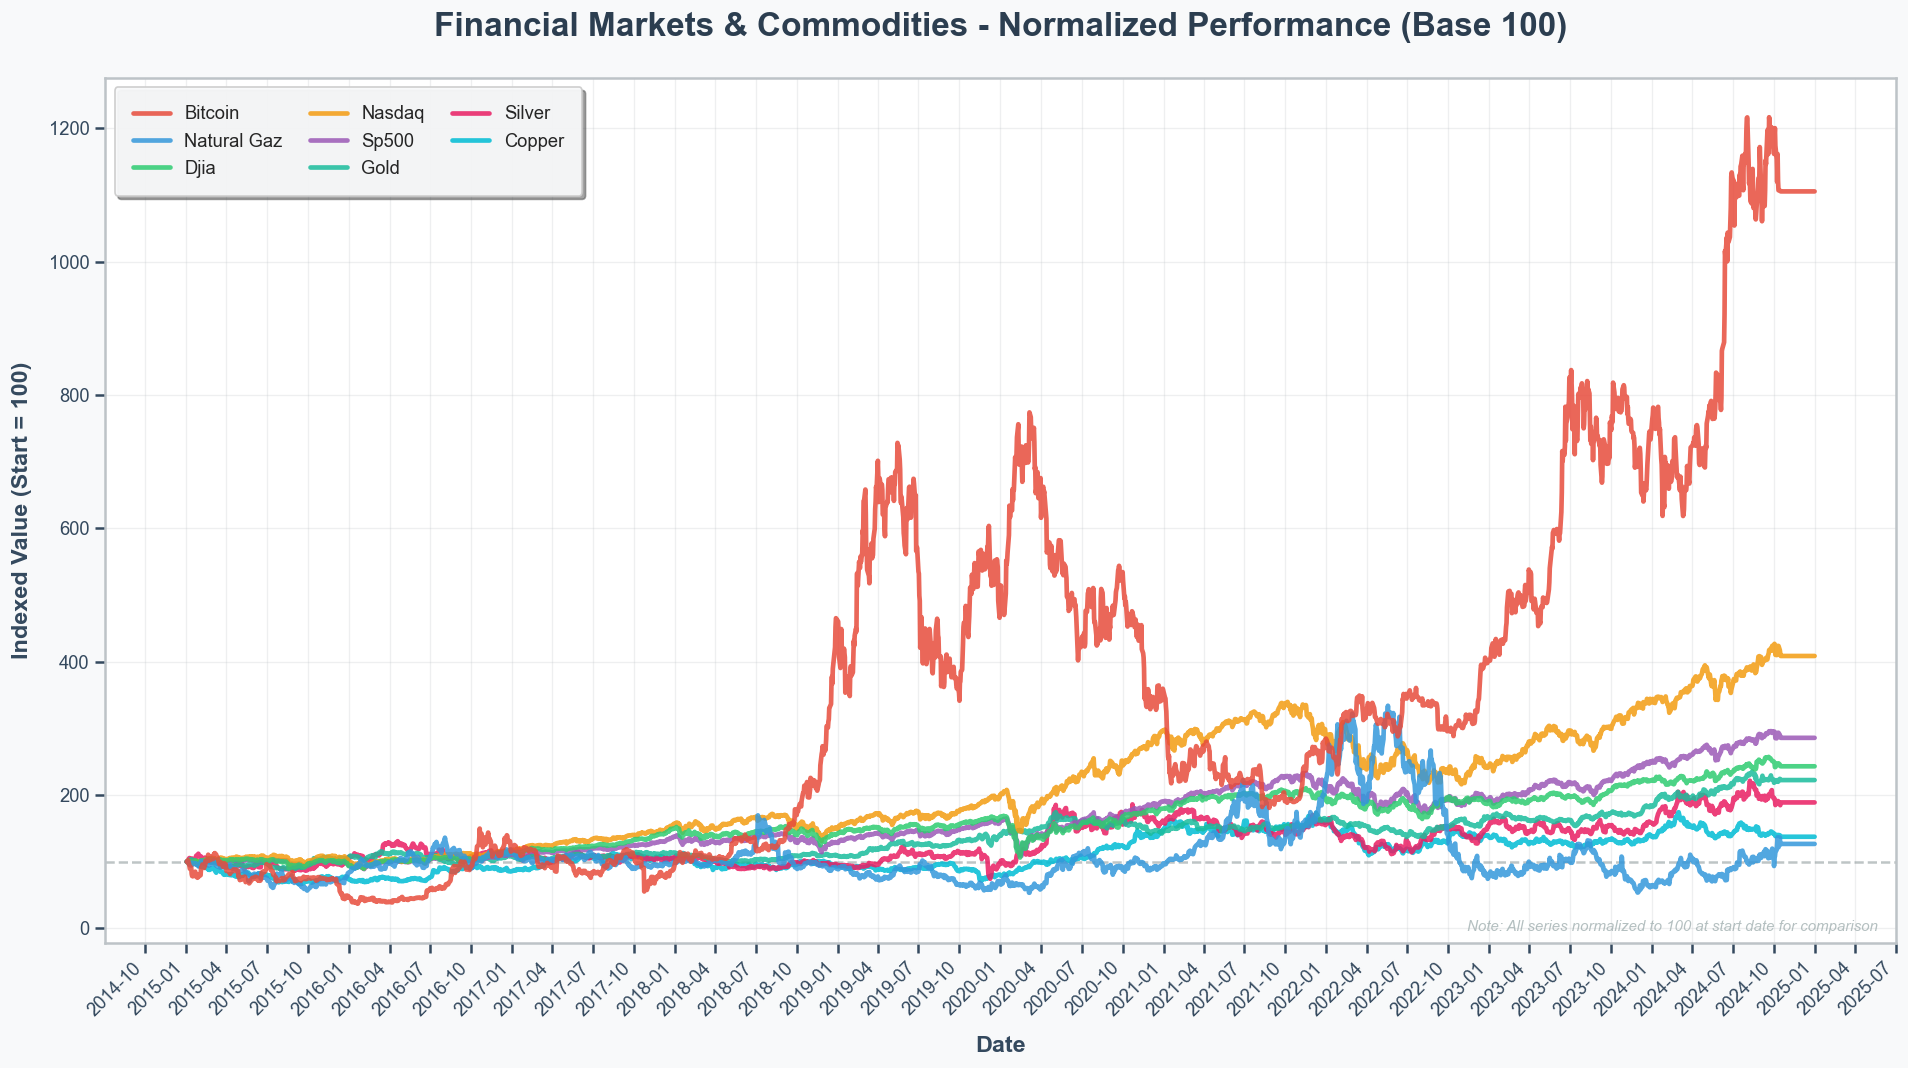

In [19]:
selected = ['bitcoin', 'crude_oil_(wti)', 'natural_gaz', 'djia', 'nasdaq', 'sp500', 'gold', 'silver', 'copper']
selected = [c for c in selected if c in df.columns]

# Set style for a modern look
plt.style.use('seaborn-v0_8-darkgrid')

# Create figure with optimal size
fig, ax = plt.subplots(figsize=(16, 9), dpi=120)
fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#ffffff')

# Premium color palette (colorblind-friendly)
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', 
          '#1abc9c', '#e91e63', '#00bcd4', '#ff9800']

# Normalize each series to start at 100 (base index)
# This shows relative performance, not absolute values
for i, col in enumerate(selected):
    # Normalize: (value / first_value) * 100
    normalized = (df[col] / df[col].iloc[0]) * 100
    
    ax.plot(df.index, normalized, 
            label=col.replace('_', ' ').replace('(', '').replace(')', '').title(), 
            linewidth=2.8, 
            alpha=0.85,
            color=colors[i % len(colors)],
            zorder=10 - i)

# Enhanced legend with better positioning
legend = ax.legend(loc='upper left', 
                   frameon=True, 
                   shadow=True, 
                   fancybox=True,
                   fontsize=11,
                   ncol=3,
                   framealpha=0.95,
                   edgecolor='#cccccc',
                   borderpad=1,
                   columnspacing=1.5)

# Style the legend
legend.get_frame().set_facecolor('#f8f9fa')

# Professional title and labels
ax.set_title('Financial Markets & Commodities - Normalized Performance (Base 100)', 
             fontsize=20, 
             fontweight='bold', 
             pad=25,
             color='#2c3e50',
             family='sans-serif')

ax.set_xlabel('Date', fontsize=14, fontweight='bold', color='#34495e', labelpad=10)
ax.set_ylabel('Indexed Value (Start = 100)', fontsize=14, fontweight='bold', color='#34495e', labelpad=10)

# Add horizontal line at 100 (starting point)
ax.axhline(y=100, color='#7f8c8d', linestyle='--', linewidth=1.5, alpha=0.5, label='Base Level')

# Enhanced grid
ax.grid(True, alpha=0.25, linestyle='-', linewidth=0.8, color='#bdc3c7')
ax.set_axisbelow(True)

# Format x-axis dates elegantly
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Improve tick styling
ax.tick_params(axis='both', labelsize=11, colors='#34495e', length=6, width=1.5)
plt.xticks(rotation=45, ha='right')

# Add subtle spines styling
for spine in ax.spines.values():
    spine.set_edgecolor('#bdc3c7')
    spine.set_linewidth(1.5)

# Add percentage labels on y-axis
y_ticks = ax.get_yticks()
ax.set_yticklabels([f'{int(y)}%' if y == 100 else f'{int(y)}' for y in y_ticks])

# Optimize layout
plt.tight_layout()

# Add annotation explaining normalization
ax.text(0.99, 0.01, 'Note: All series normalized to 100 at start date for comparison', 
        transform=ax.transAxes,
        fontsize=9, 
        color='#95a5a6',
        ha='right',
        va='bottom',
        style='italic',
        alpha=0.7)

plt.show()

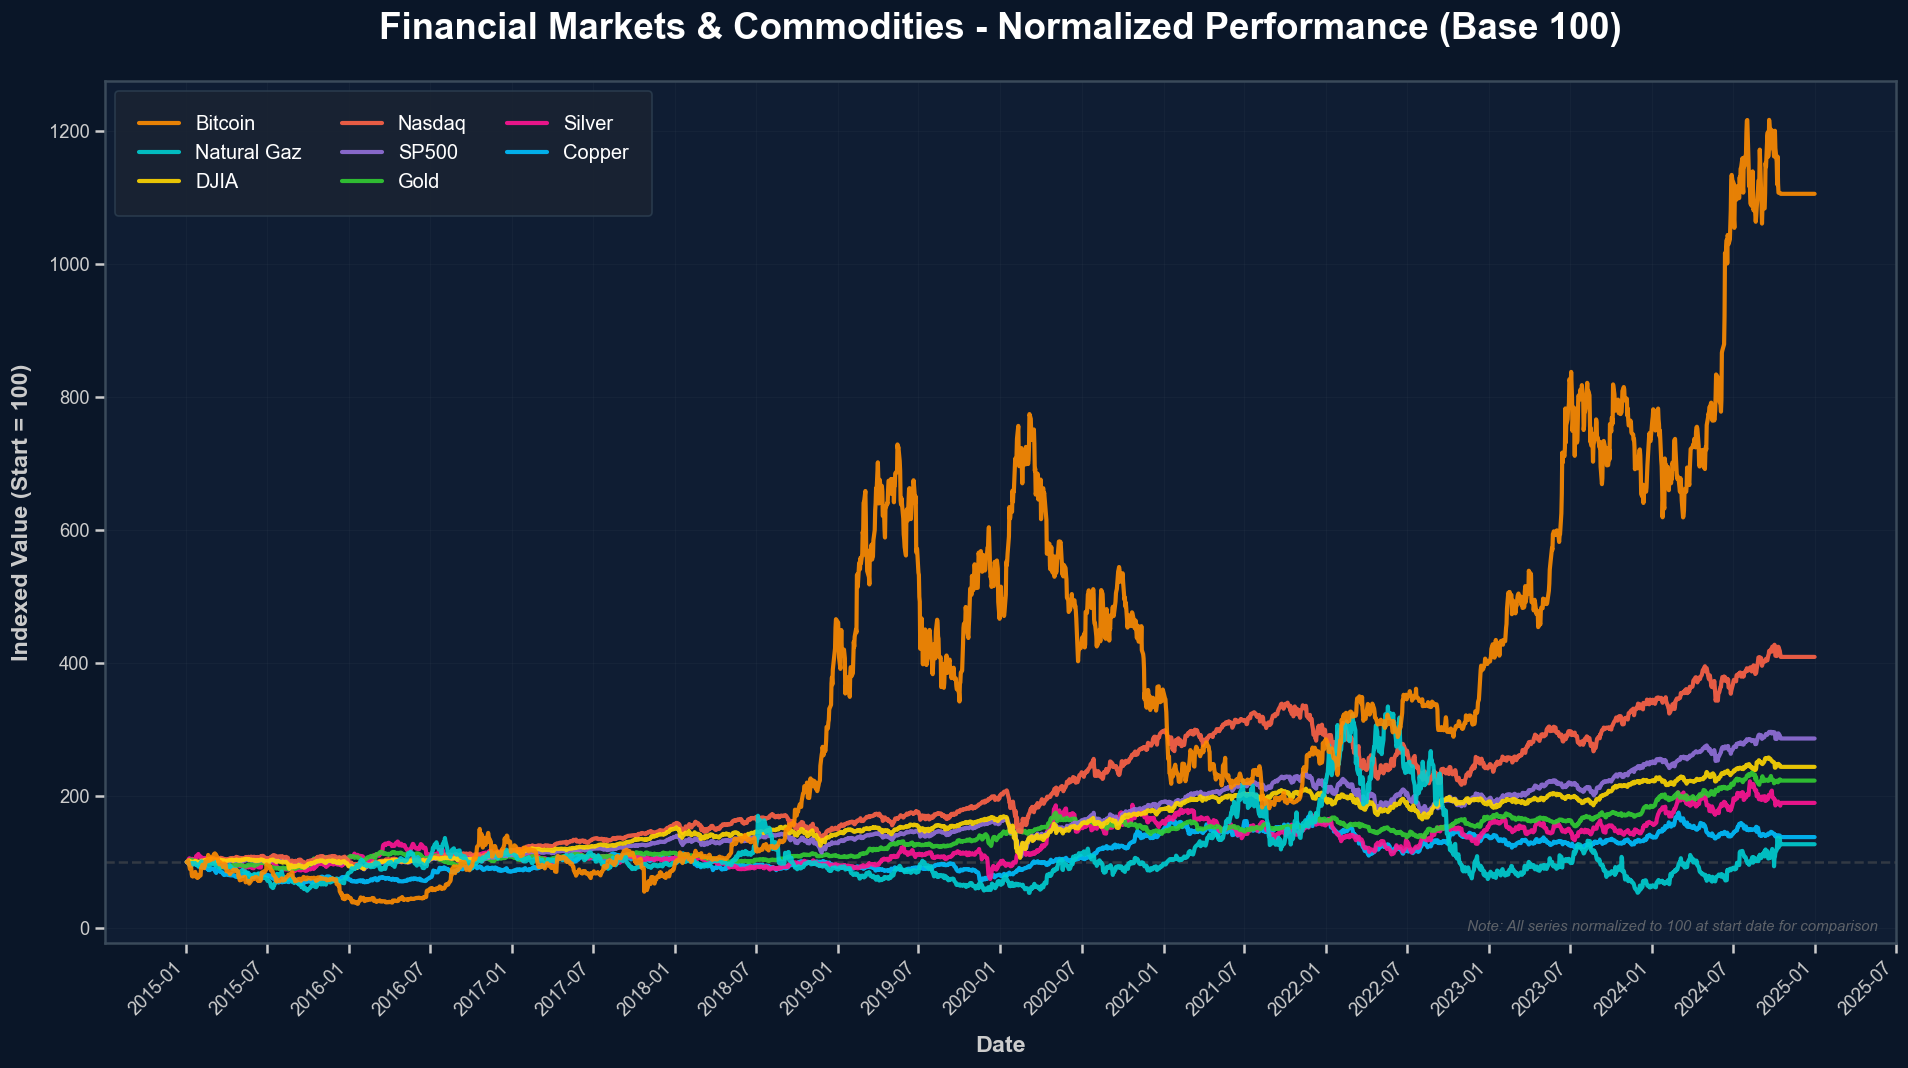

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Colonnes sélectionnées
selected = ['bitcoin', 'crude_oil_wti', 'natural_gaz', 'djia', 'nasdaq', 'sp500', 'gold', 'silver', 'copper']
selected = [c for c in selected if c in df.columns]

# DARK THEME - comme le graphique Bitcoin
plt.style.use('dark_background')

# Create figure
fig, ax = plt.subplots(figsize=(16, 9), dpi=120)
fig.patch.set_facecolor('#0a1628')  # Dark blue background
ax.set_facecolor('#0f1d33')  # Slightly lighter for plot area

# PALETTE VIBRANTE ET COLORÉE (inspirée du 2ème graphe)
colors = {
    'bitcoin': '#FF8C00',      # Orange vif (comme le graphe Bitcoin)
    'crude_oil_wti': '#FF69B4', # Rose vif
    'natural_gaz': '#00CED1',   # Cyan
    'djia': '#FFD700',          # Or
    'nasdaq': '#FF6347',        # Rouge-orange
    'sp500': '#9370DB',         # Violet
    'gold': '#32CD32',          # Vert lime
    'silver': '#FF1493',        # Rose profond
    'copper': '#00BFFF'         # Bleu ciel
}

# Labels propres
labels = {
    'bitcoin': 'Bitcoin',
    'crude_oil_wti': 'Crude Oil (WTI)',
    'natural_gaz': 'Natural Gaz',
    'djia': 'DJIA',
    'nasdaq': 'Nasdaq',
    'sp500': 'SP500',
    'gold': 'Gold',
    'silver': 'Silver',
    'copper': 'Copper'
}

# Tracer chaque série avec couleurs vibrantes
for i, col in enumerate(selected):
    # Normalize to base 100
    normalized = (df[col] / df[col].iloc[0]) * 100
    
    # Get color for this asset
    color = colors.get(col, '#FFFFFF')
    label = labels.get(col, col.replace('_', ' ').title())
    
    # Plot with vibrant colors
    ax.plot(df.index, normalized, 
            label=label, 
            linewidth=2.5, 
            alpha=0.9,
            color=color,
            zorder=10 - i)

# LEGEND - Style moderne avec fond sombre
legend = ax.legend(loc='upper left', 
                   frameon=True, 
                   shadow=False, 
                   fancybox=True,
                   fontsize=12,
                   ncol=3,
                   framealpha=0.85,
                   edgecolor='#2c3e50',
                   borderpad=1.2,
                   columnspacing=2)

# Style de la légende
legend.get_frame().set_facecolor('#1a2332')
for text in legend.get_texts():
    text.set_color('#FFFFFF')

# TITRE - Style moderne et impactant
ax.set_title('Financial Markets & Commodities - Normalized Performance (Base 100)', 
             fontsize=22, 
             fontweight='bold', 
             pad=25,
             color='#FFFFFF',
             family='sans-serif')

# AXES LABELS
ax.set_xlabel('Date', 
              fontsize=14, 
              fontweight='bold', 
              color='#CCCCCC', 
              labelpad=10)

ax.set_ylabel('Indexed Value (Start = 100)', 
              fontsize=14, 
              fontweight='bold', 
              color='#CCCCCC', 
              labelpad=10)

# Ligne de base à 100
ax.axhline(y=100, color='#555555', linestyle='--', linewidth=1.5, alpha=0.5)

# GRID - Subtil mais visible
ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.7, color='#3a4a5a')
ax.set_axisbelow(True)

# FORMAT DES DATES
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

# TICK STYLING - Couleurs claires sur fond sombre
ax.tick_params(axis='both', 
               labelsize=11, 
               colors='#CCCCCC', 
               length=6, 
               width=1.5)
plt.xticks(rotation=45, ha='right')

# SPINES - Bordures subtiles
for spine in ax.spines.values():
    spine.set_edgecolor('#3a4a5a')
    spine.set_linewidth(1.5)

# Optimiser le layout
plt.tight_layout()

# NOTE EN BAS
ax.text(0.99, 0.01, 
        'Note: All series normalized to 100 at start date for comparison', 
        transform=ax.transAxes,
        fontsize=9, 
        color='#808080',
        ha='right',
        va='bottom',
        style='italic',
        alpha=0.7)

plt.show()

In [21]:
print(df.columns.tolist())


['crude_oil_(_wti)', 'heating_oil', 'conventional_gasoline', 'rbob', 'ultra-low_sulfur_carb_diesel', 'kerosene-type_jet_fuel', 'propane', 'natural_gaz', 'djia', 'nasdaq', 'sp500', 'bitcoin', 'usd_future_index', 'gold', 'silver', 'copper']


In [22]:

useful_cols = [
    "bitcoin",
    "gold",
    "silver",
    "crude_oil_(_wti)",
    "natural_gaz",
    "propane",
    "heating_oil",
    "conventional_gasoline",
    "rbob",
    "ultra-low_sulfur_carb_diesel",
    "kerosene-type_jet_fuel",
    "copper",
    "usd_future_index",
    "djia",
    "sp500",
    "nasdaq"
]
df = df[useful_cols] 

In [23]:
df["bitcoin"]

date
2015-01-02     8726.2
2015-01-05     8916.8
2015-01-06     8547.4
2015-01-07     8473.2
2015-01-08     8143.5
               ...   
2024-12-24    96447.9
2024-12-26    96447.9
2024-12-27    96447.9
2024-12-30    96447.9
2024-12-31    96447.9
Name: bitcoin, Length: 2569, dtype: float64

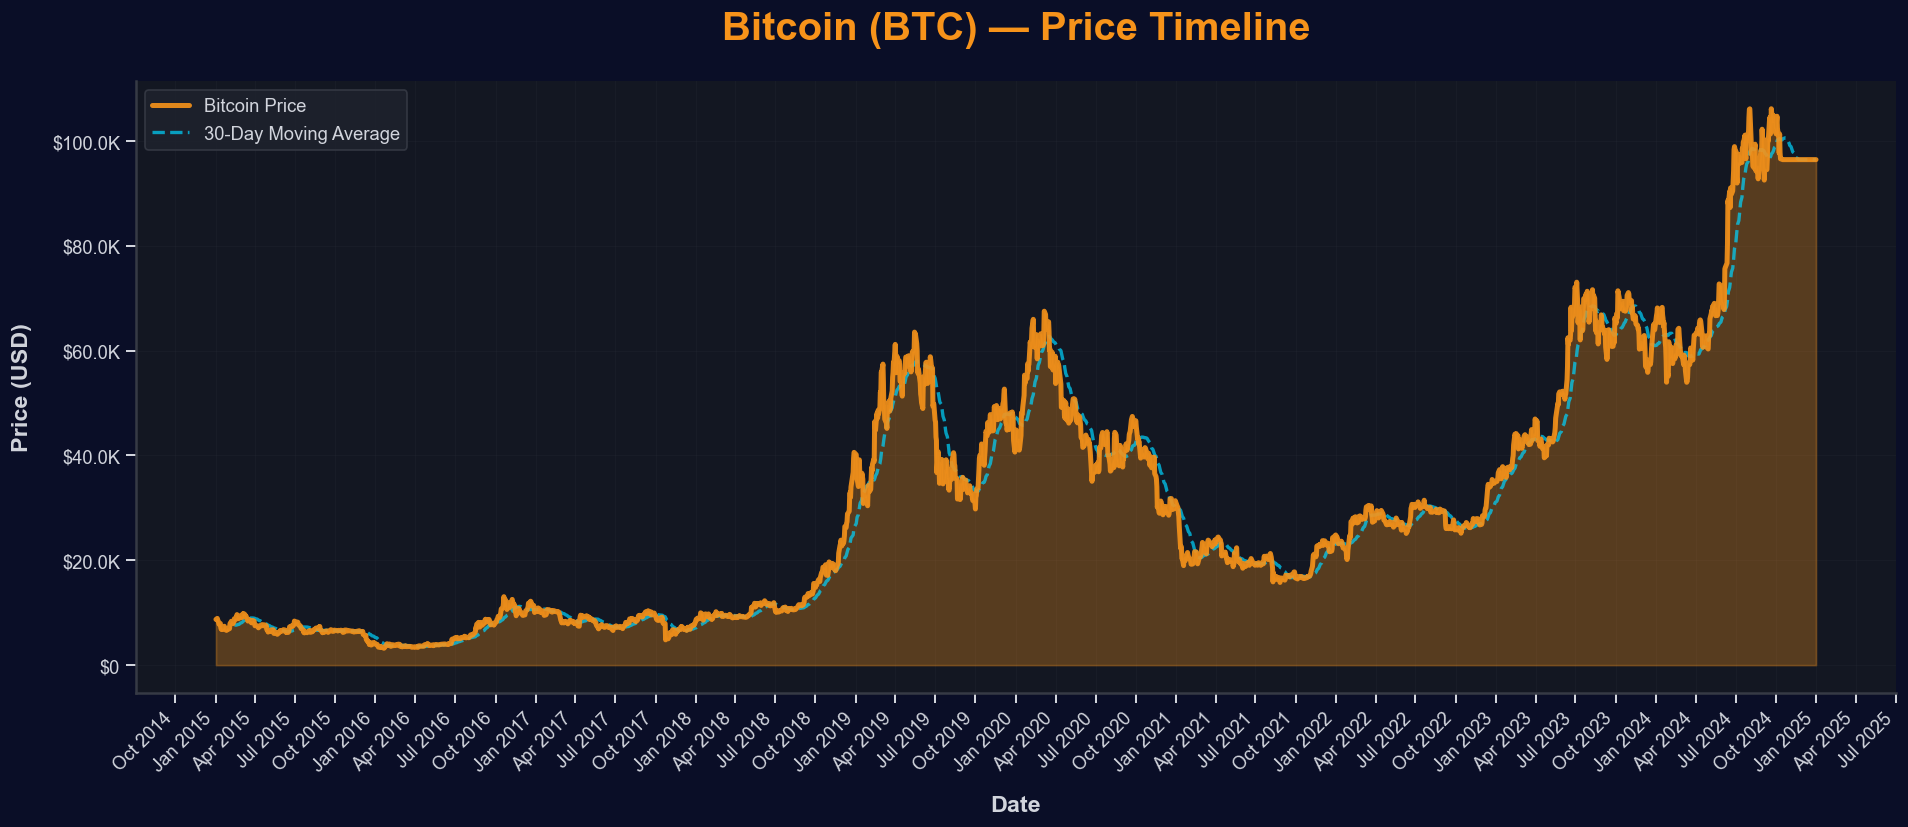

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np

# Set modern style
plt.style.use('seaborn-v0_8-darkgrid')

# Create figure with premium styling
fig, ax = plt.subplots(figsize=(16, 7), dpi=120)
fig.patch.set_facecolor('#0a0e27')
ax.set_facecolor('#131722')

# Create gradient effect by plotting multiple lines with varying alpha
bitcoin_data = df['bitcoin']
x_data = df.index

# Main line with gradient effect
ax.fill_between(x_data, bitcoin_data, alpha=0.3, color='#f7931a', label='_nolegend_')
ax.plot(x_data, bitcoin_data, 
        color='#f7931a', 
        linewidth=3, 
        alpha=0.9,
        label='Bitcoin Price',
        zorder=5)

# Add moving average for context (30-day)
if len(bitcoin_data) >= 30:
    ma_30 = bitcoin_data.rolling(window=30).mean()
    ax.plot(x_data, ma_30, 
            color='#00d4ff', 
            linewidth=2, 
            alpha=0.7,
            linestyle='--',
            label='30-Day Moving Average',
            zorder=4)

# Professional title with Bitcoin styling
ax.set_title('Bitcoin (BTC) — Price Timeline', 
             fontsize=24, 
             fontweight='bold', 
             pad=25,
             color='#f7931a',
             family='sans-serif')

# Elegant labels
ax.set_xlabel('Date', fontsize=14, fontweight='bold', color='#d1d4dc', labelpad=12)
ax.set_ylabel('Price (USD)', fontsize=14, fontweight='bold', color='#d1d4dc', labelpad=12)

# Premium grid styling
ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.8, color='#363a45')
ax.set_axisbelow(True)

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Style tick labels
ax.tick_params(axis='both', labelsize=11, colors='#d1d4dc', length=6, width=1.2)
plt.xticks(rotation=45, ha='right')

# Format y-axis with $ and thousands separator
def format_price(x, pos):
    if x >= 1000:
        return f'${x/1000:.1f}K'
    return f'${x:.0f}'

ax.yaxis.set_major_formatter(FuncFormatter(format_price))

# Style spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('#363a45')
    ax.spines[spine].set_linewidth(1.5)

# Add statistics box FIRST (so legend appears on top)
if not bitcoin_data.empty:
    current_price = bitcoin_data.iloc[-1]
    max_price = bitcoin_data.max()
    min_price = bitcoin_data.min()
    change = ((current_price - bitcoin_data.iloc[0]) / bitcoin_data.iloc[0]) * 100
    
    stats_text = f'Current: ${current_price:,.2f}\n'
    stats_text += f'High: ${max_price:,.2f}\n'
    stats_text += f'Low: ${min_price:,.2f}\n'
    stats_text += f'Change: {change:+.1f}%'
    
    # Stats box positioned at top right
    # props = dict(boxstyle='round', facecolor='#1e222d', alpha=0.9, edgecolor='#363a45', linewidth=1.5)
    # ax.text(0.98, 0.98, stats_text,
    #         transform=ax.transAxes,
    #         fontsize=10,
    #         verticalalignment='top',
    #         horizontalalignment='right',
    #         bbox=props,
    #         color='#d1d4dc',
    #         family='monospace')

# Add legend with dark theme at top left (separate from stats)
legend = ax.legend(loc='upper left', 
                   frameon=True,
                   fancybox=True,
                   fontsize=11,
                   framealpha=0.9,
                   edgecolor='#363a45')
legend.get_frame().set_facecolor('#1e222d')
for text in legend.get_texts():
    text.set_color('#d1d4dc')

# Tight layout
plt.tight_layout()

plt.show()

In [25]:
df["btc_ma7"] = df["bitcoin"].rolling(window=7).mean()
df["btc_ma30"] = df["bitcoin"].rolling(window=30).mean()
df["btc_ma180"] = df["bitcoin"].rolling(window=180).mean()


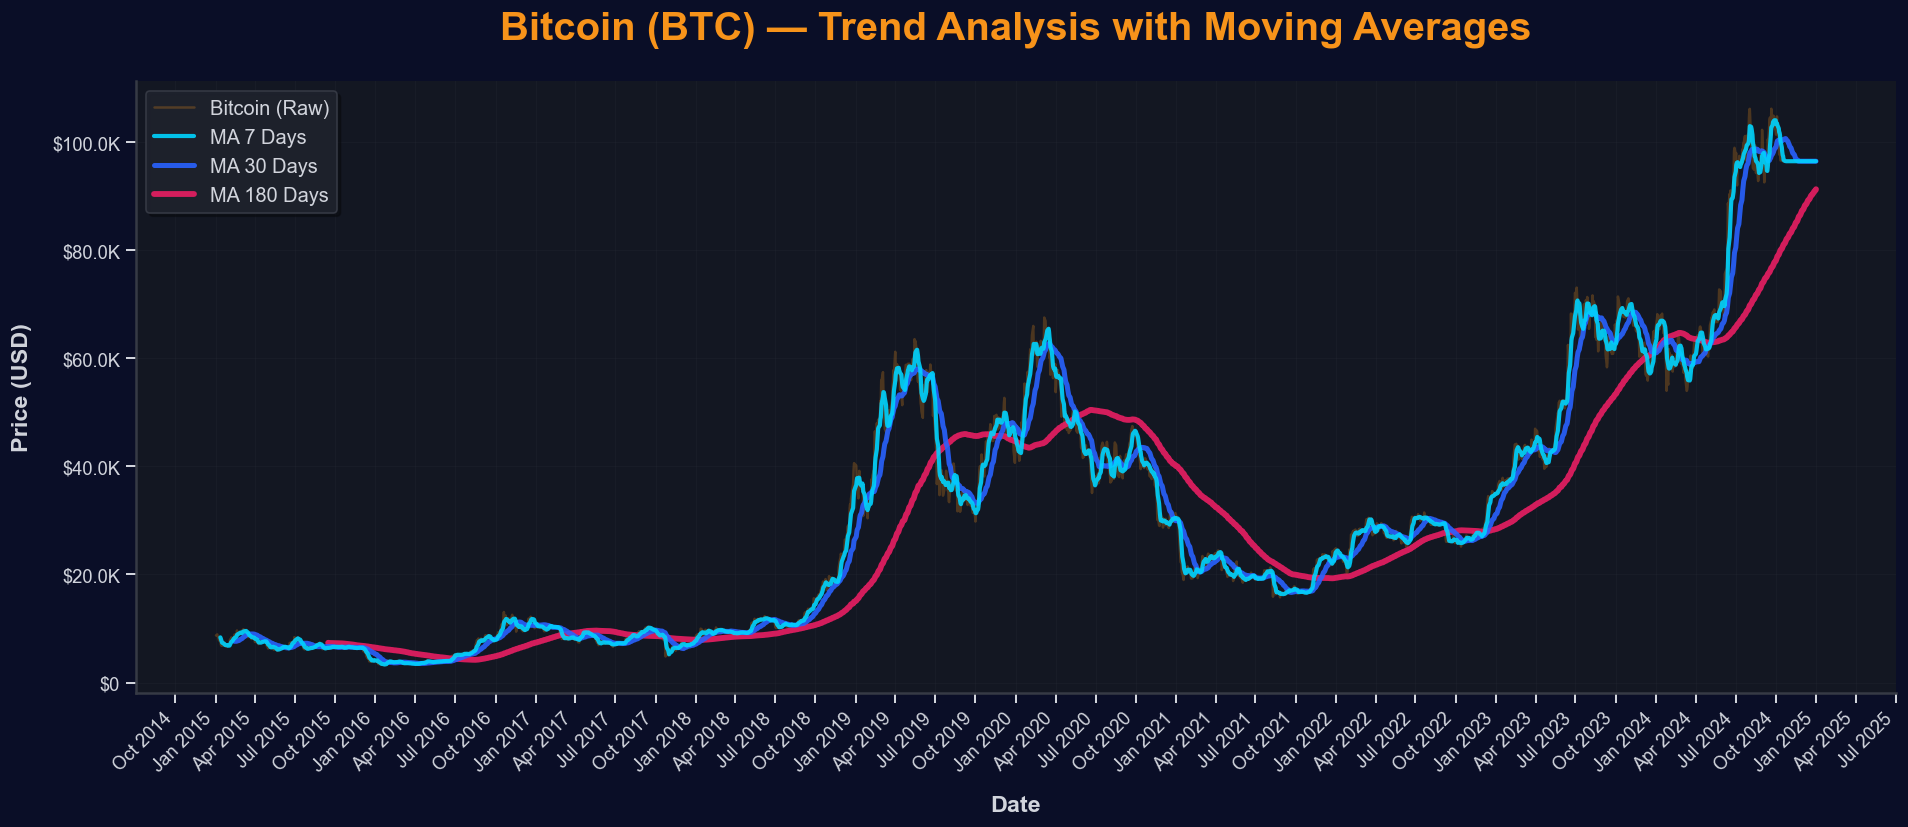

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.ticker import FuncFormatter
# import numpy as np

# # Set modern style
# plt.style.use('seaborn-v0_8-darkgrid')

# # Create figure with premium styling
# fig, ax = plt.subplots(figsize=(16, 7), dpi=120)
# fig.patch.set_facecolor('#0a0e27')
# ax.set_facecolor('#131722')

# # Plot raw Bitcoin price with low opacity
# ax.plot(df.index, df['bitcoin'], 
#         alpha=0.25, 
#         color='#f7931a',
#         linewidth=1.5,
#         label='Bitcoin (Raw)',
#         zorder=1)

# # Plot moving averages with distinct colors and increasing thickness
# # MA 7 - Short term (cyan/turquoise)
# ax.plot(df.index, df['btc_ma7'], 
#         color='#00d4ff',
#         linewidth=2.5,
#         alpha=0.9,
#         label='MA 7 Days',
#         zorder=4)

# # MA 30 - Medium term (electric blue)
# ax.plot(df.index, df['btc_ma30'], 
#         color='#2962ff',
#         linewidth=3,
#         alpha=0.9,
#         label='MA 30 Days',
#         zorder=3)

# # MA 180 - Long term (purple/magenta)
# ax.plot(df.index, df['btc_ma180'], 
#         color='#e91e63',
#         linewidth=3.5,
#         alpha=0.9,
#         label='MA 180 Days',
#         zorder=2)

# # Professional title
# ax.set_title('Bitcoin (BTC) — Trend Analysis with Moving Averages', 
#              fontsize=24, 
#              fontweight='bold', 
#              pad=25,
#              color='#f7931a',
#              family='sans-serif')

# # Elegant labels
# ax.set_xlabel('Date', fontsize=14, fontweight='bold', color='#d1d4dc', labelpad=12)
# ax.set_ylabel('Price (USD)', fontsize=14, fontweight='bold', color='#d1d4dc', labelpad=12)

# # Premium grid styling
# ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.8, color='#363a45')
# ax.set_axisbelow(True)

# # Format x-axis dates
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# # Style tick labels
# ax.tick_params(axis='both', labelsize=11, colors='#d1d4dc', length=6, width=1.2)
# plt.xticks(rotation=45, ha='right')

# # Format y-axis with $ and thousands separator
# def format_price(x, pos):
#     if x >= 1000:
#         return f'${x/1000:.1f}K'
#     return f'${x:.0f}'

# ax.yaxis.set_major_formatter(FuncFormatter(format_price))

# # Style spines
# for spine in ['top', 'right']:
#     ax.spines[spine].set_visible(False)
# for spine in ['bottom', 'left']:
#     ax.spines[spine].set_color('#363a45')
#     ax.spines[spine].set_linewidth(1.5)

# # Enhanced legend with dark theme
# legend = ax.legend(loc='upper left', 
#                    frameon=True,
#                    fancybox=True,
#                    fontsize=12,
#                    framealpha=0.95,
#                    edgecolor='#363a45',
#                    shadow=True)
# legend.get_frame().set_facecolor('#1e222d')
# for text in legend.get_texts():
#     text.set_color('#d1d4dc')

# # Add info box about moving averages
# # info_text = 'Moving Averages (MA) smooth price data\n'
# # info_text += 'to identify trends:\n'
# # info_text += '• MA7: Short-term momentum\n'
# # info_text += '• MA30: Medium-term trend\n'
# # info_text += '• MA180: Long-term direction'

# # props = dict(boxstyle='round', facecolor='#1e222d', alpha=0.9, edgecolor='#363a45', linewidth=1.5)
# # ax.text(0.98, 0.98, info_text,
# #         transform=ax.transAxes,
# #         fontsize=9.5,
# #         verticalalignment='top',
# #         horizontalalignment='right',
# #         bbox=props,
# #         color='#d1d4dc',
# #         family='sans-serif')

# # Tight layout
# plt.tight_layout()

# # plt.show()

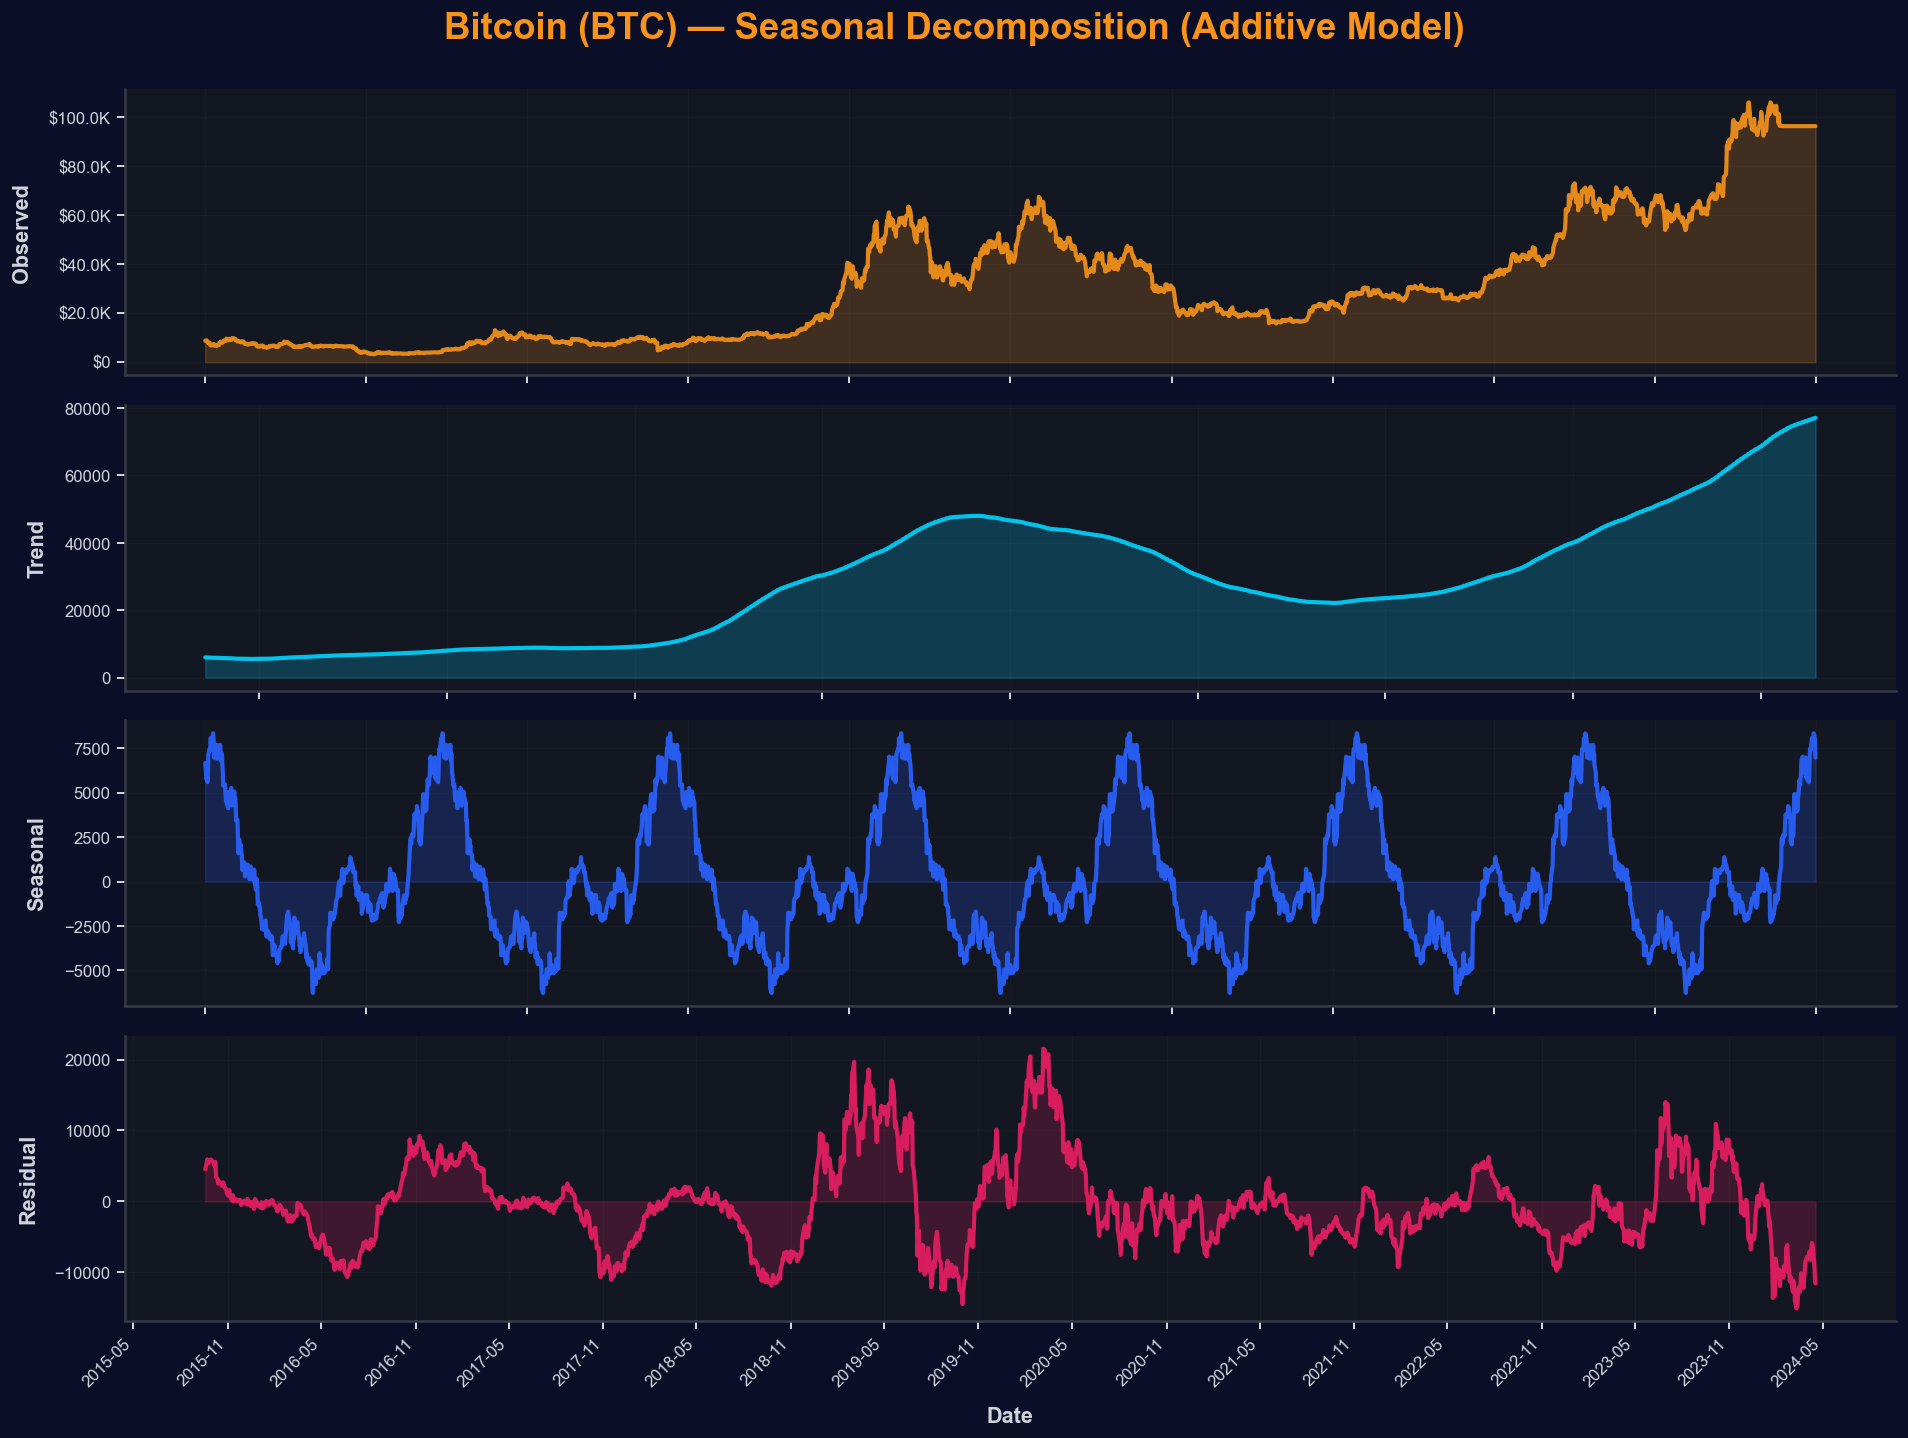

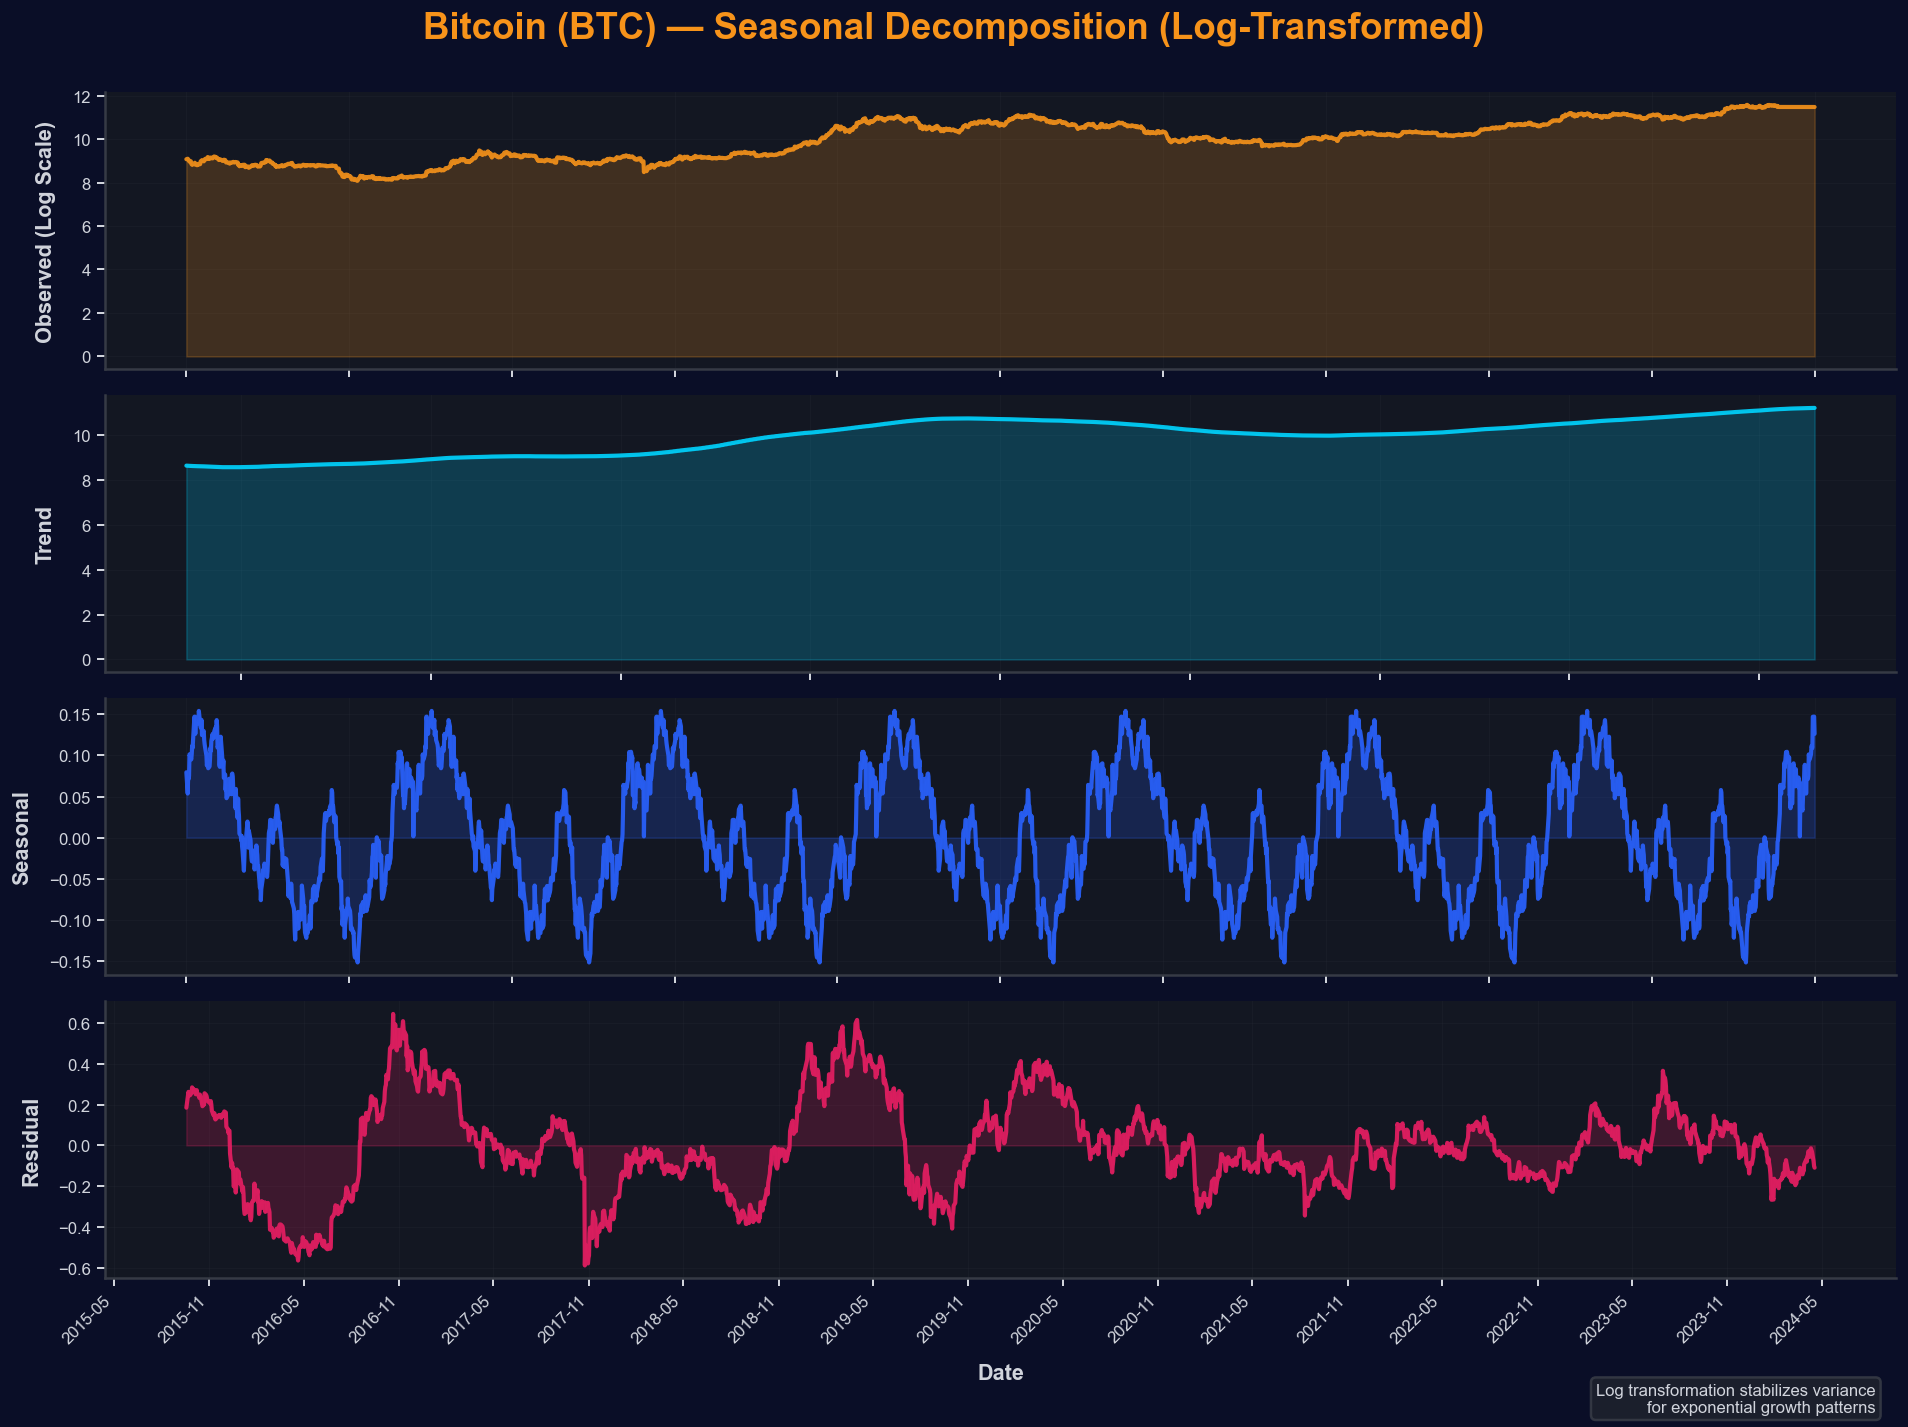

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.ticker import FuncFormatter
# from statsmodels.tsa.seasonal import seasonal_decompose
# import numpy as np

# # Set modern style
# plt.style.use('seaborn-v0_8-darkgrid')

# # Prepare data
# btc = df['bitcoin'].dropna()
# btc_log = np.log(btc)

# # Decomposition
# result_add = seasonal_decompose(btc, model='additive', period=365)
# result_mul = seasonal_decompose(btc_log, model='additive', period=365)

# # ==================== ADDITIVE DECOMPOSITION ====================
# fig, axes = plt.subplots(4, 1, figsize=(16, 12), dpi=120)
# fig.patch.set_facecolor('#0a0e27')

# # Color palette
# colors = ['#f7931a', '#00d4ff', '#2962ff', '#e91e63']
# titles = ['Observed', 'Trend', 'Seasonal', 'Residual']
# components = [result_add.observed, result_add.trend, result_add.seasonal, result_add.resid]

# for i, (ax, component, color, title) in enumerate(zip(axes, components, colors, titles)):
#     ax.set_facecolor('#131722')
    
#     # Plot component
#     ax.plot(component.index, component.values, 
#             color=color, 
#             linewidth=2.5, 
#             alpha=0.9)
    
#     # Fill under curve for visual effect
#     ax.fill_between(component.index, component.values, 
#                      alpha=0.2, 
#                      color=color)
    
#     # Styling
#     ax.set_ylabel(title, fontsize=13, fontweight='bold', color='#d1d4dc', labelpad=10)
#     ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.8, color='#363a45')
#     ax.set_axisbelow(True)
#     ax.tick_params(axis='both', labelsize=10, colors='#d1d4dc', length=5, width=1.2)
    
#     # Format y-axis
#     if i == 0:  # Observed - format as price
#         def format_price(x, pos):
#             if x >= 1000:
#                 return f'${x/1000:.1f}K'
#             return f'${x:.0f}'
#         ax.yaxis.set_major_formatter(FuncFormatter(format_price))
    
#     # Spines styling
#     for spine in ['top', 'right']:
#         ax.spines[spine].set_visible(False)
#     for spine in ['bottom', 'left']:
#         ax.spines[spine].set_color('#363a45')
#         ax.spines[spine].set_linewidth(1.5)
    
#     # X-axis formatting (only for bottom plot)
#     if i == 3:
#         ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#         ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
#         plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
#         ax.set_xlabel('Date', fontsize=13, fontweight='bold', color='#d1d4dc', labelpad=10)
#     else:
#         ax.set_xticklabels([])

# # Main title
# fig.suptitle('Bitcoin (BTC) — Seasonal Decomposition (Additive Model)', 
#              fontsize=22, 
#              fontweight='bold', 
#              color='#f7931a',
#              y=0.995)

# plt.tight_layout(rect=[0, 0, 1, 0.99])
# plt.show()

# # ==================== LOG DECOMPOSITION ====================
# fig, axes = plt.subplots(4, 1, figsize=(16, 12), dpi=120)
# fig.patch.set_facecolor('#0a0e27')

# components_log = [result_mul.observed, result_mul.trend, result_mul.seasonal, result_mul.resid]

# for i, (ax, component, color, title) in enumerate(zip(axes, components_log, colors, titles)):
#     ax.set_facecolor('#131722')
    
#     # Plot component
#     ax.plot(component.index, component.values, 
#             color=color, 
#             linewidth=2.5, 
#             alpha=0.9)
    
#     # Fill under curve for visual effect
#     ax.fill_between(component.index, component.values, 
#                      alpha=0.2, 
#                      color=color)
    
#     # Styling
#     ylabel = f'{title} (Log Scale)' if i == 0 else title
#     ax.set_ylabel(ylabel, fontsize=13, fontweight='bold', color='#d1d4dc', labelpad=10)
#     ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.8, color='#363a45')
#     ax.set_axisbelow(True)
#     ax.tick_params(axis='both', labelsize=10, colors='#d1d4dc', length=5, width=1.2)
    
#     # Spines styling
#     for spine in ['top', 'right']:
#         ax.spines[spine].set_visible(False)
#     for spine in ['bottom', 'left']:
#         ax.spines[spine].set_color('#363a45')
#         ax.spines[spine].set_linewidth(1.5)
    
#     # X-axis formatting (only for bottom plot)
#     if i == 3:
#         ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#         ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
#         plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
#         ax.set_xlabel('Date', fontsize=13, fontweight='bold', color='#d1d4dc', labelpad=10)
#     else:
#         ax.set_xticklabels([])

# # Main title
# fig.suptitle('Bitcoin (BTC) — Seasonal Decomposition (Log-Transformed)', 
#              fontsize=22, 
#              fontweight='bold', 
#              color='#f7931a',
#              y=0.995)

# # Add info box
# info_text = 'Log transformation stabilizes variance\nfor exponential growth patterns'
# props = dict(boxstyle='round', facecolor='#1e222d', alpha=0.9, edgecolor='#363a45', linewidth=1.5)
# fig.text(0.98, 0.02, info_text,
#          fontsize=10,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=props,
#          color='#d1d4dc',
#          transform=fig.transFigure)

# plt.tight_layout(rect=[0, 0.03, 1, 0.99])
# plt.show()

In [ ]:
# from statsmodels.tsa.stattools import adfuller

# # Test sur la série des log-returns (recommandé)
# btc = df['bitcoin'].dropna()
# btc_logret = np.log(btc).diff().dropna()

# adf_price = adfuller(btc.dropna())
# adf_logret = adfuller(btc_logret)

# print("ADF on price: stat=%.4f, p=%.4f" % (adf_price[0], adf_price[1]))
# print("ADF on log-returns: stat=%.4f, p=%.4f" % (adf_logret[0], adf_logret[1]))


ADF on price: stat=-0.3343, p=0.9205
ADF on log-returns: stat=-23.9759, p=0.0000


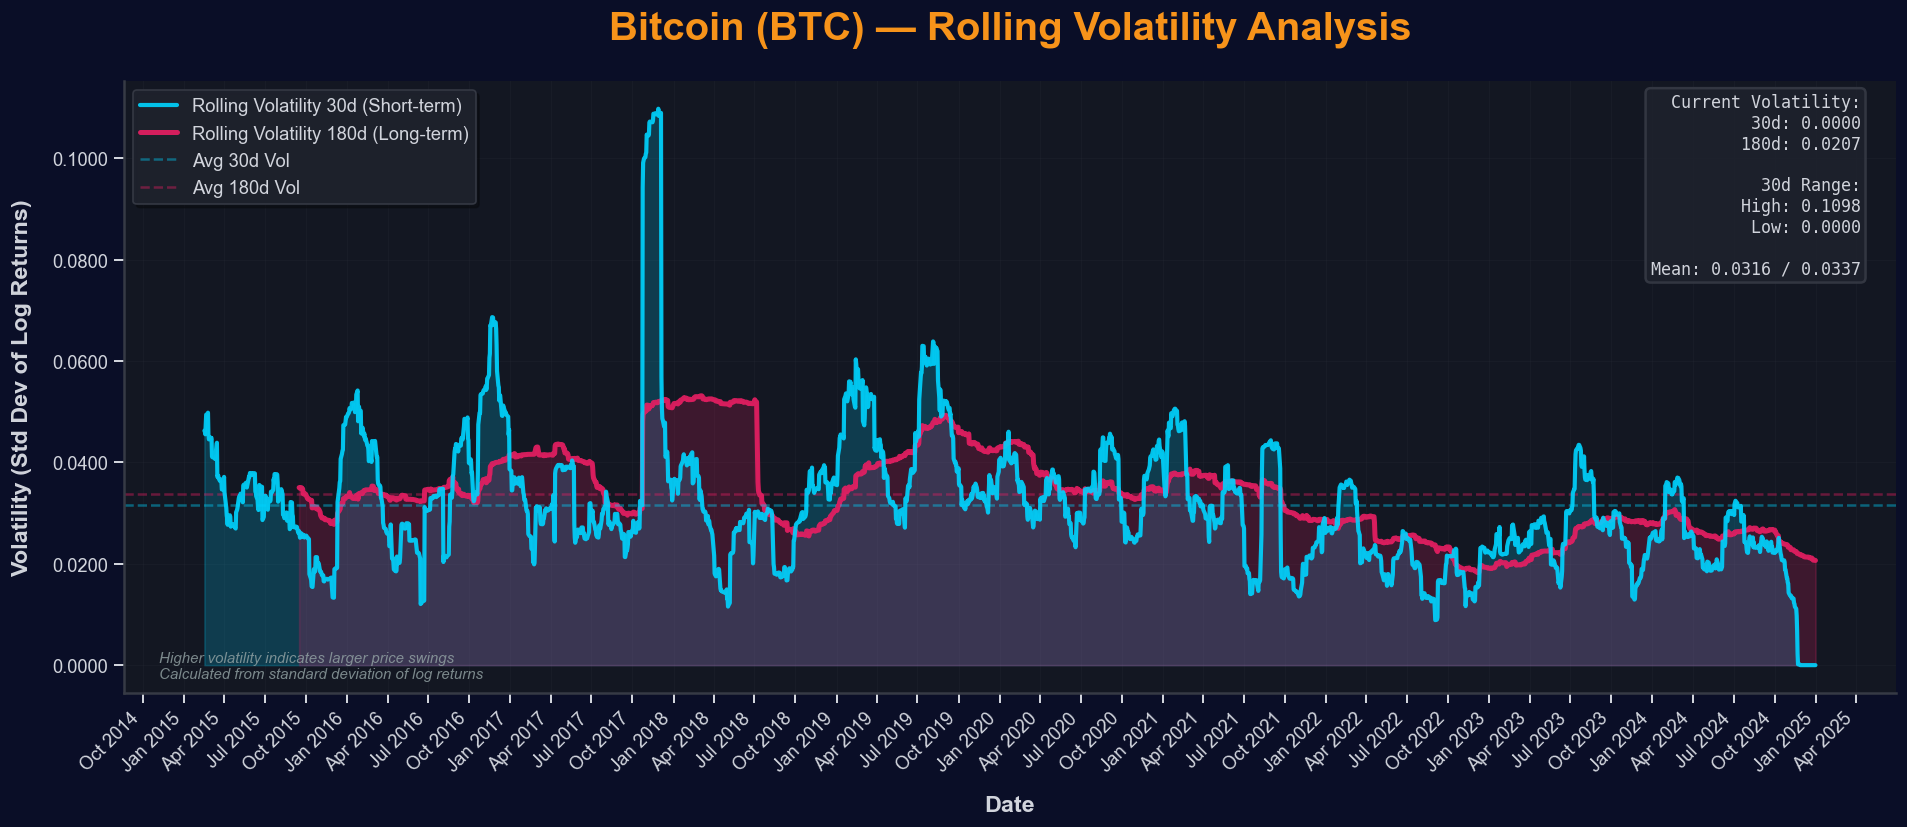

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np

# Set modern style
plt.style.use('seaborn-v0_8-darkgrid')

# Calculate rolling volatility
window_short = 30
window_long = 180
btc_logret = np.log(df['bitcoin']).diff().dropna()
rolstd30 = btc_logret.rolling(window_short).std()
rolstd180 = btc_logret.rolling(window_long).std()

# Create figure with premium styling
fig, ax = plt.subplots(figsize=(16, 7), dpi=120)
fig.patch.set_facecolor('#0a0e27')
ax.set_facecolor('#131722')

# Plot rolling volatilities with gradient fills
# Short-term volatility (30 days) - Cyan
ax.fill_between(rolstd30.index, rolstd30.values, 
                alpha=0.2, 
                color='#00d4ff',
                label='_nolegend_')
ax.plot(rolstd30.index, rolstd30.values, 
        color='#00d4ff',
        linewidth=2.5,
        alpha=0.9,
        label=f'Rolling Volatility {window_short}d (Short-term)',
        zorder=3)

# Long-term volatility (180 days) - Magenta
ax.fill_between(rolstd180.index, rolstd180.values, 
                alpha=0.2, 
                color='#e91e63',
                label='_nolegend_')
ax.plot(rolstd180.index, rolstd180.values, 
        color='#e91e63',
        linewidth=3,
        alpha=0.9,
        label=f'Rolling Volatility {window_long}d (Long-term)',
        zorder=2)

# Add horizontal lines for reference levels
mean_vol_short = rolstd30.mean()
mean_vol_long = rolstd180.mean()

ax.axhline(y=mean_vol_short, color='#00d4ff', linestyle='--', 
           linewidth=1.5, alpha=0.4, label=f'Avg {window_short}d Vol')
ax.axhline(y=mean_vol_long, color='#e91e63', linestyle='--', 
           linewidth=1.5, alpha=0.4, label=f'Avg {window_long}d Vol')

# Professional title
ax.set_title('Bitcoin (BTC) — Rolling Volatility Analysis', 
             fontsize=24, 
             fontweight='bold', 
             pad=25,
             color='#f7931a',
             family='sans-serif')

# Elegant labels
ax.set_xlabel('Date', fontsize=14, fontweight='bold', color='#d1d4dc', labelpad=12)
ax.set_ylabel('Volatility (Std Dev of Log Returns)', fontsize=14, fontweight='bold', color='#d1d4dc', labelpad=12)

# Premium grid styling
ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.8, color='#363a45')
ax.set_axisbelow(True)

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Style tick labels
ax.tick_params(axis='both', labelsize=11, colors='#d1d4dc', length=6, width=1.2)
plt.xticks(rotation=45, ha='right')

# Format y-axis with percentage (volatility)
def format_volatility(x, pos):
    return f'{x:.4f}'

ax.yaxis.set_major_formatter(FuncFormatter(format_volatility))

# Style spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('#363a45')
    ax.spines[spine].set_linewidth(1.5)

# Enhanced legend with dark theme
legend = ax.legend(loc='upper left', 
                   frameon=True,
                   fancybox=True,
                   fontsize=11,
                   framealpha=0.95,
                   edgecolor='#363a45',
                   shadow=True)
legend.get_frame().set_facecolor('#1e222d')
for text in legend.get_texts():
    text.set_color('#d1d4dc')

# Add statistics box
current_vol_30 = rolstd30.iloc[-1]
current_vol_180 = rolstd180.iloc[-1]
max_vol_30 = rolstd30.max()
min_vol_30 = rolstd30.min()

stats_text = f'Current Volatility:\n'
stats_text += f'  30d: {current_vol_30:.4f}\n'
stats_text += f'  180d: {current_vol_180:.4f}\n\n'
stats_text += f'30d Range:\n'
stats_text += f'  High: {max_vol_30:.4f}\n'
stats_text += f'  Low: {min_vol_30:.4f}\n\n'
stats_text += f'Mean: {mean_vol_short:.4f} / {mean_vol_long:.4f}'

props = dict(boxstyle='round', facecolor='#1e222d', alpha=0.9, edgecolor='#363a45', linewidth=1.5)
ax.text(0.98, 0.98, stats_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=props,
        color='#d1d4dc',
        family='monospace')

# Add info note
info_text = 'Higher volatility indicates larger price swings\nCalculated from standard deviation of log returns'
ax.text(0.02, 0.02, info_text,
        transform=ax.transAxes,
        fontsize=9,
        verticalalignment='bottom',
        horizontalalignment='left',
        style='italic',
        color='#95a5a6',
        alpha=0.8)

# Tight layout
plt.tight_layout()

plt.show()

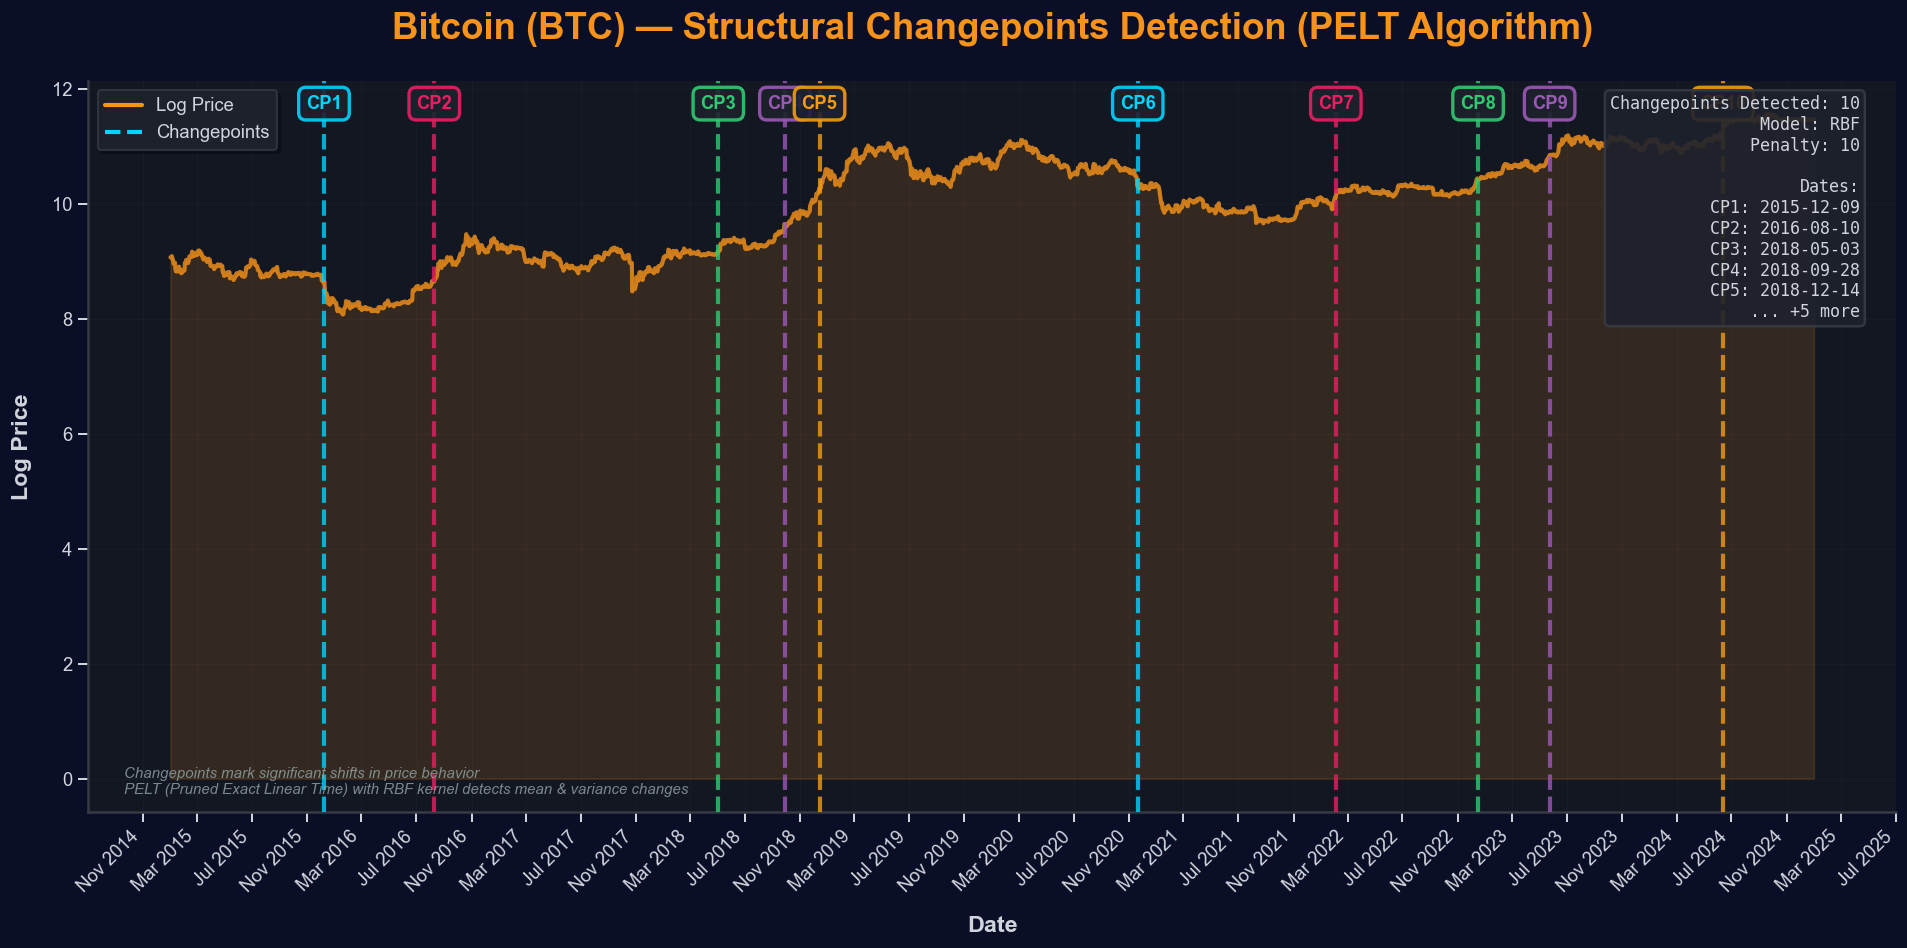


CHANGEPOINTS DETECTED
CP1: Index  240 → Date: 2015-12-09
CP2: Index  410 → Date: 2016-08-10
CP3: Index  855 → Date: 2018-05-03
CP4: Index  960 → Date: 2018-09-28
CP5: Index 1015 → Date: 2018-12-14
CP6: Index 1510 → Date: 2020-11-20
CP7: Index 1820 → Date: 2022-02-03
CP8: Index 2045 → Date: 2022-12-16
CP9: Index 2155 → Date: 2023-05-24
CP10: Index 2425 → Date: 2024-06-12


In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np
import ruptures as rpt

# Set modern style
plt.style.use('seaborn-v0_8-darkgrid')

# Prepare data
btc_series = df['bitcoin'].dropna()
series = np.log(btc_series).values
dates = btc_series.index

# Detect changepoints
model = "rbf"  # Good for mean+var changes
algo = rpt.Pelt(model=model).fit(series)
bkpts = algo.predict(pen=10)  # Penalty parameter

# Create figure with premium styling
fig, ax = plt.subplots(figsize=(16, 8), dpi=120)
fig.patch.set_facecolor('#0a0e27')
ax.set_facecolor('#131722')

# Plot the log price series
ax.plot(dates, series, 
        color='#f7931a',
        linewidth=2.5,
        alpha=0.8,
        label='Log Price',
        zorder=2)

# Fill under curve
ax.fill_between(dates, series, 
                alpha=0.15, 
                color='#f7931a')

# Add vertical lines for changepoints (excluding the last point which is length of series)
colors_changepoints = ['#00d4ff', '#e91e63', '#2ecc71', '#9b59b6', '#f39c12']
for i, bkpt in enumerate(bkpts[:-1]):  # Exclude last point
    changepoint_date = dates[bkpt]
    color = colors_changepoints[i % len(colors_changepoints)]
    
    # Vertical line
    ax.axvline(x=changepoint_date, 
               color=color,
               linestyle='--',
               linewidth=2.5,
               alpha=0.8,
               zorder=3)
    
    # Add label with changepoint number
    ax.text(changepoint_date, ax.get_ylim()[1] * 0.98, 
            f'CP{i+1}',
            rotation=0,
            verticalalignment='top',
            horizontalalignment='center',
            fontsize=11,
            fontweight='bold',
            color=color,
            bbox=dict(boxstyle='round,pad=0.4', 
                     facecolor='#1e222d', 
                     edgecolor=color,
                     alpha=0.9,
                     linewidth=2))

# Professional title
ax.set_title('Bitcoin (BTC) — Structural Changepoints Detection (PELT Algorithm)', 
             fontsize=22, 
             fontweight='bold', 
             pad=25,
             color='#f7931a',
             family='sans-serif')

# Elegant labels
ax.set_xlabel('Date', fontsize=14, fontweight='bold', color='#d1d4dc', labelpad=12)
ax.set_ylabel('Log Price', fontsize=14, fontweight='bold', color='#d1d4dc', labelpad=12)

# Premium grid styling
ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.8, color='#363a45')
ax.set_axisbelow(True)

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))

# Style tick labels
ax.tick_params(axis='both', labelsize=11, colors='#d1d4dc', length=6, width=1.2)
plt.xticks(rotation=45, ha='right')

# Style spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('#363a45')
    ax.spines[spine].set_linewidth(1.5)

# Add legend
legend_elements = [plt.Line2D([0], [0], color='#f7931a', linewidth=2.5, label='Log Price'),
                   plt.Line2D([0], [0], color='#00d4ff', linewidth=2.5, linestyle='--', label='Changepoints')]
legend = ax.legend(handles=legend_elements,
                   loc='upper left', 
                   frameon=True,
                   fancybox=True,
                   fontsize=11,
                   framealpha=0.95,
                   edgecolor='#363a45',
                   shadow=True)
legend.get_frame().set_facecolor('#1e222d')
for text in legend.get_texts():
    text.set_color('#d1d4dc')

# Add statistics box with changepoint details
num_changepoints = len(bkpts) - 1
stats_text = f'Changepoints Detected: {num_changepoints}\n'
stats_text += f'Model: {model.upper()}\n'
stats_text += f'Penalty: 10\n\n'
stats_text += 'Dates:\n'

for i, bkpt in enumerate(bkpts[:-1]):
    if i < 5:  # Show max 5 changepoints
        cp_date = dates[bkpt].strftime('%Y-%m-%d')
        stats_text += f'  CP{i+1}: {cp_date}\n'

if num_changepoints > 5:
    stats_text += f'  ... +{num_changepoints - 5} more'

props = dict(boxstyle='round', facecolor='#1e222d', alpha=0.9, edgecolor='#363a45', linewidth=1.5)
ax.text(0.98, 0.98, stats_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=props,
        color='#d1d4dc',
        family='monospace')

# Add info note
info_text = 'Changepoints mark significant shifts in price behavior\nPELT (Pruned Exact Linear Time) with RBF kernel detects mean & variance changes'
ax.text(0.02, 0.02, info_text,
        transform=ax.transAxes,
        fontsize=9,
        verticalalignment='bottom',
        horizontalalignment='left',
        style='italic',
        color='#95a5a6',
        alpha=0.8)

# Tight layout
plt.tight_layout()

plt.show()

# Print changepoints with dates
print("\n" + "="*60)
print("CHANGEPOINTS DETECTED")
print("="*60)
for i, bkpt in enumerate(bkpts[:-1]):
    cp_date = dates[bkpt].strftime('%Y-%m-%d')
    print(f"CP{i+1}: Index {bkpt:4d} → Date: {cp_date}")
print("="*60)

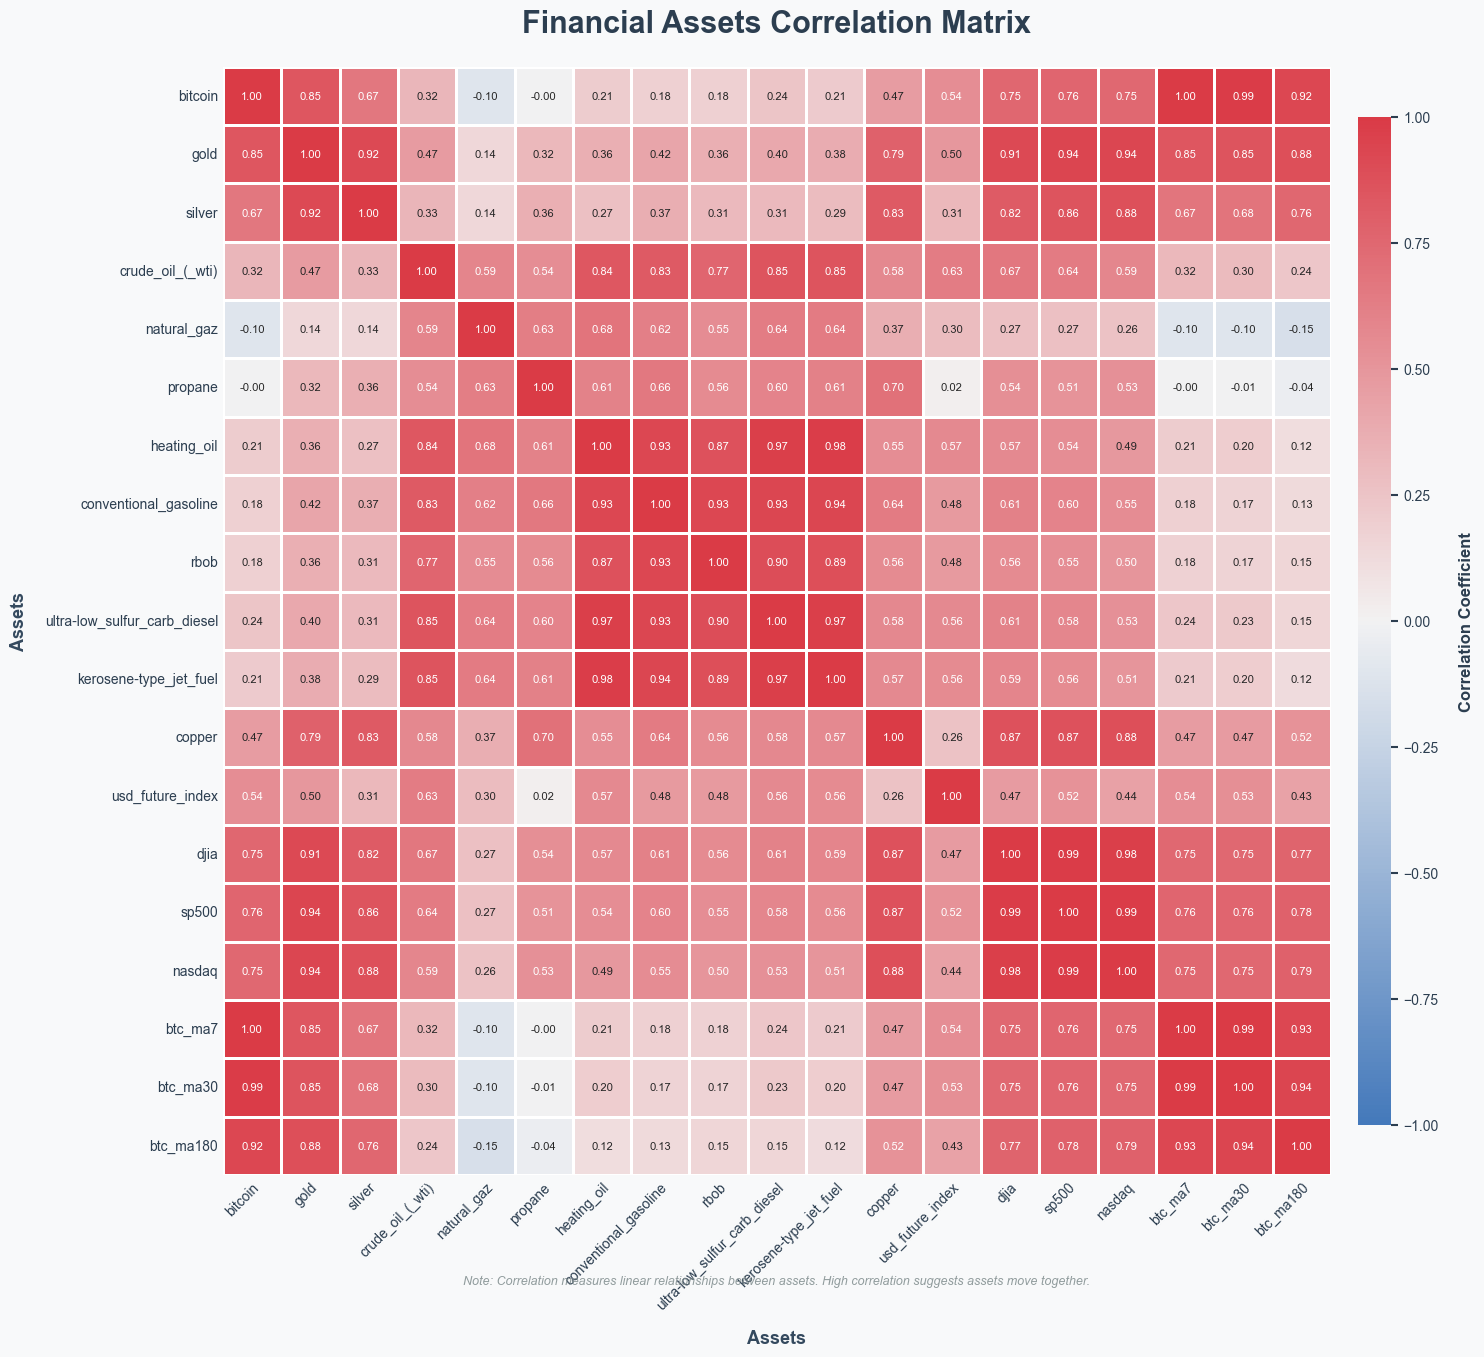


  CORRELATION MATRIX - KEY FINDINGS

Top 10 Strongest Correlations:
----------------------------------------------------------------------
 1. bitcoin              <-> btc_ma7             : +0.9981 (positive)
 2. btc_ma7              <-> btc_ma30            : +0.9937 (positive)
 3. sp500                <-> nasdaq              : +0.9911 (positive)
 4. bitcoin              <-> btc_ma30            : +0.9900 (positive)
 5. djia                 <-> sp500               : +0.9866 (positive)
 6. heating_oil          <-> kerosene-type_jet_fuel: +0.9784 (positive)
 7. djia                 <-> nasdaq              : +0.9757 (positive)
 8. ultra-low_sulfur_carb_diesel <-> kerosene-type_jet_fuel: +0.9725 (positive)
 9. heating_oil          <-> ultra-low_sulfur_carb_diesel: +0.9708 (positive)
10. btc_ma30             <-> btc_ma180           : +0.9435 (positive)




In [26]:

# Set modern style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.0)

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr()

# Create figure with premium styling
fig, ax = plt.subplots(figsize=(18, 16), dpi=100)
fig.patch.set_facecolor('#f8f9fa')

# Create custom colormap (diverging from blue to red through white)
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Create heatmap with enhanced styling and FIXED alignment
heatmap = sns.heatmap(corr_matrix, 
                      annot=True,                    # Show correlation values
                      fmt=".2f",                     # 2 decimal places
                      cmap=cmap,                     # Custom colormap
                      center=0,                      # Center colormap at 0
                      square=True,                   # Square cells
                      linewidths=1,                  # Cell borders (increased)
                      linecolor='#ffffff',           # Border color (white for better contrast)
                      cbar_kws={
                          "shrink": 0.75,            # Colorbar size
                          "label": "Correlation Coefficient",
                          "orientation": "vertical",
                          "pad": 0.02,
                          "aspect": 30
                      },
                      annot_kws={
                          "fontsize": 8,             # Annotation font size
                          "fontweight": "normal",    # Normal weight for better readability
                          "va": "center",            # CRITICAL: Vertical alignment
                          "ha": "center"             # CRITICAL: Horizontal alignment
                      },
                      vmin=-1,                       # Min correlation value
                      vmax=1,                        # Max correlation value
                      ax=ax)

# FIX: Ensure proper cell alignment by setting axis properties
ax.set_aspect('equal', adjustable='box')

# Customize colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10, colors='#2c3e50', length=5, width=1.5)
cbar.set_label('Correlation Coefficient', 
               fontsize=12, 
               fontweight='bold', 
               color='#2c3e50',
               labelpad=15)

# Professional title with more padding
ax.set_title('Financial Assets Correlation Matrix', 
             fontsize=22, 
             fontweight='bold', 
             pad=25,
             color='#2c3e50',
             family='sans-serif')

# Enhance axis labels
ax.set_xlabel('Assets', fontsize=13, fontweight='bold', color='#34495e', labelpad=12)
ax.set_ylabel('Assets', fontsize=13, fontweight='bold', color='#34495e', labelpad=12)

# Rotate and style tick labels with better positioning
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=45, 
                   ha='right',
                   rotation_mode='anchor',  # CRITICAL: Proper rotation anchor
                   fontsize=10,
                   color='#2c3e50',
                   fontweight='normal')

ax.set_yticklabels(ax.get_yticklabels(), 
                   rotation=0,
                   fontsize=10,
                   color='#2c3e50',
                   fontweight='normal')

# Remove tick marks for cleaner look
ax.tick_params(axis='both', which='both', length=0)

# # Add interpretation guide
# guide_text = 'Interpretation Guide:\n'
# guide_text += '• +1.0: Perfect positive correlation\n'
# guide_text += '• +0.7 to +1.0: Strong positive\n'
# guide_text += '• +0.3 to +0.7: Moderate positive\n'
# guide_text += '• -0.3 to +0.3: Weak/No correlation\n'
# guide_text += '• -0.7 to -0.3: Moderate negative\n'
# guide_text += '• -1.0 to -0.7: Strong negative\n'
# guide_text += '• -1.0: Perfect negative correlation'

# props = dict(boxstyle='round,pad=0.8', 
#              facecolor='#ffffff', 
#              edgecolor='#bdc3c7',
#              alpha=0.95,
#              linewidth=2)

# ax.text(1.12, 0.5, guide_text,
#         transform=ax.transAxes,
#         fontsize=9.5,
#         verticalalignment='center',
#         bbox=props,
#         color='#2c3e50',
#         family='monospace',
#         linespacing=1.6)

# # Add statistics summary
# strong_positive = ((corr_matrix > 0.7) & (corr_matrix < 1.0)).sum().sum() // 2
# strong_negative = (corr_matrix < -0.7).sum().sum() // 2
# moderate = ((corr_matrix.abs() > 0.3) & (corr_matrix.abs() < 0.7)).sum().sum() // 2

# stats_text = f'Summary Statistics:\n'
# stats_text += f'Total Pairs: {len(numeric_cols) * (len(numeric_cols) - 1) // 2}\n'
# stats_text += f'Strong Positive (>0.7): {strong_positive}\n'
# stats_text += f'Strong Negative (<-0.7): {strong_negative}\n'
# stats_text += f'Moderate (0.3-0.7): {moderate}'

# ax.text(0.02, -0.06, stats_text,
#         transform=ax.transAxes,
#         fontsize=9.5,
#         verticalalignment='top',
#         bbox=dict(boxstyle='round,pad=0.6', 
#                  facecolor='#ecf0f1', 
#                  edgecolor='#95a5a6',
#                  alpha=0.9,
#                  linewidth=1.5),
#         color='#2c3e50',
#         family='monospace')

# Add note about analysis
note_text = 'Note: Correlation measures linear relationships between assets. High correlation suggests assets move together.'
ax.text(0.5, -0.09, note_text,
        transform=ax.transAxes,
        fontsize=9,
        verticalalignment='top',
        horizontalalignment='center',
        style='italic',
        color='#7f8c8d',
        alpha=0.85)

# CRITICAL FIX: Adjust layout to prevent cutoff
plt.tight_layout(rect=[0, 0.02, 0.88, 0.98])

# FIX: Ensure matplotlib renders properly
plt.draw()

plt.show()

# Print key findings
print("\n" + "="*70)
print("  CORRELATION MATRIX - KEY FINDINGS")
print("="*70)

# Find strongest positive correlations (excluding diagonal)
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append((
            corr_matrix.columns[i],
            corr_matrix.columns[j],
            corr_matrix.iloc[i, j]
        ))

# Sort by absolute correlation
corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)

print("\nTop 10 Strongest Correlations:")
print("-"*70)
for i, (asset1, asset2, corr) in enumerate(corr_pairs_sorted[:10], 1):
    correlation_type = "positive" if corr > 0 else "negative"
    print(f"{i:2d}. {asset1:20s} <-> {asset2:20s}: {corr:+.4f} ({correlation_type})")

print("\n" + "="*70 + "\n")

 CROSS-CORRELATION ANALYSIS: BITCOIN vs OTHER ASSETS

✓ Target: BITCOIN
✓ Data points: 2569
✓ Variables to analyze: 18

────────────────────────────────────────────────────────────────────────────────
Computing cross-correlations...
────────────────────────────────────────────────────────────────────────────────

   Processed 5/18 variables...
   Processed 10/18 variables...
   Processed 15/18 variables...

✓ Analysis complete: 18 variables analyzed

 CROSS-CORRELATION RESULTS (Sorted by Absolute Correlation)
                    variable  lag_optimal  corr_max  corr_lag0  abs_corr_max corr_type  is_significant  pearson_corr  pearson_pval  data_points
                     btc_ma7            0  0.998139   0.998139      0.998139  positive            True      0.998139  0.000000e+00         2563
                    btc_ma30            0  0.989952   0.989952      0.989952  positive            True      0.989952  0.000000e+00         2540
                   btc_ma180            0  0.923128  

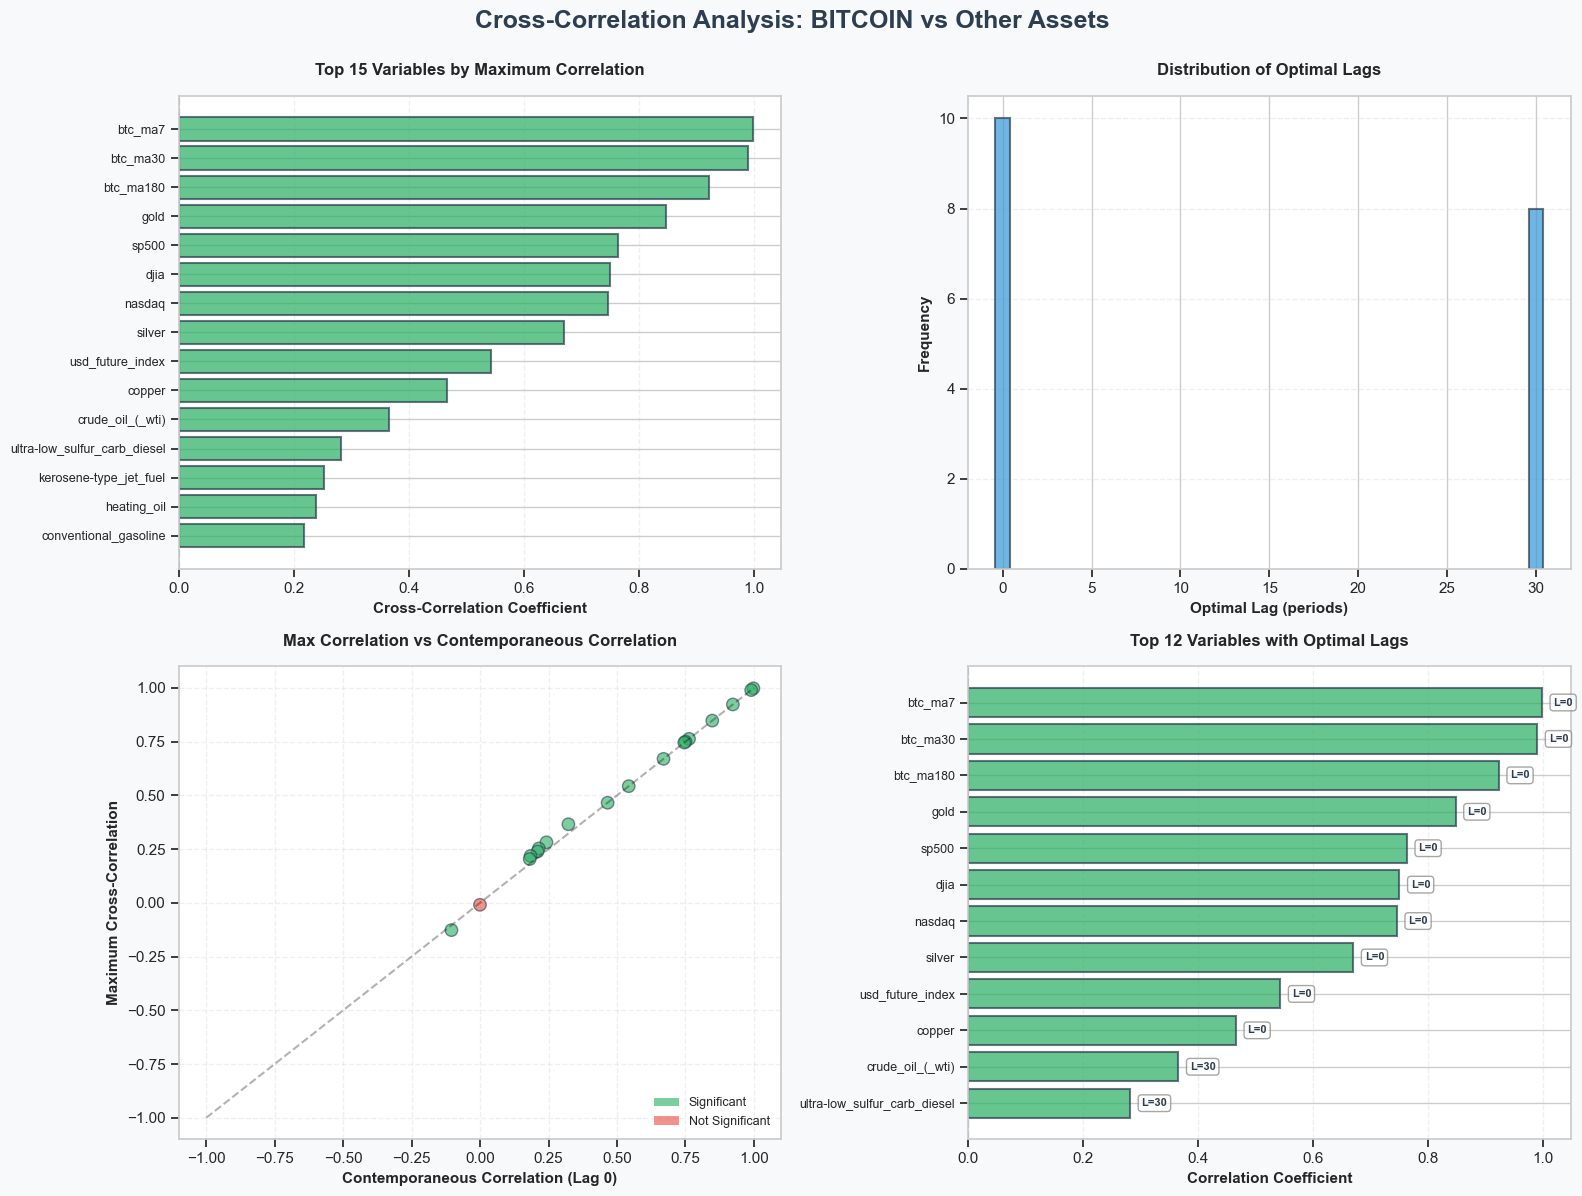

✓ Visualization complete!

 ANALYSIS COMPLETE

Results stored in variable: crosscorr_df
To export to CSV: crosscorr_df.to_csv('bitcoin_crosscorr_results.csv', index=False)



In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import ccf
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION
# ============================================================================
TARGET = "bitcoin"
MAX_LAG = 30
MIN_DATA_POINTS = 50  # Minimum required data points for reliable analysis
SIGNIFICANCE_LEVEL = 0.05

# ============================================================================
# 1. DATA PREPARATION & VALIDATION
# ============================================================================
print("="*80)
print(" CROSS-CORRELATION ANALYSIS: BITCOIN vs OTHER ASSETS")
print("="*80)

# Validate target exists
if TARGET not in df.columns:
    raise ValueError(f"Target '{TARGET}' not found in dataframe columns")

# Extract and clean target series
btc = df[TARGET].dropna()
print(f"\n✓ Target: {TARGET.upper()}")
print(f"✓ Data points: {len(btc)}")

# Select all variables except date and target
variables = [col for col in df.columns if col not in ["date", TARGET] and df[col].dtype in ['float64', 'int64']]
print(f"✓ Variables to analyze: {len(variables)}")

# ============================================================================
# 2. CROSS-CORRELATION COMPUTATION
# ============================================================================
print(f"\n{'─'*80}")
print("Computing cross-correlations...")
print(f"{'─'*80}\n")

results = []

for idx, var in enumerate(variables, 1):
    try:
        # Extract and clean variable series
        serie = df[var].dropna()
        
        # Align series to common indices
        common_idx = btc.index.intersection(serie.index)
        
        if len(common_idx) < MIN_DATA_POINTS:
            print(f"⚠ Skipping {var}: insufficient data ({len(common_idx)} points)")
            continue
        
        btc_aligned = btc.loc[common_idx]
        serie_aligned = serie.loc[common_idx]
        
        # Standardize series (zero mean, unit variance)
        btc_std = (btc_aligned - btc_aligned.mean()) / btc_aligned.std()
        serie_std = (serie_aligned - serie_aligned.mean()) / serie_aligned.std()
        
        # Compute cross-correlation function
        cc_values = ccf(btc_std, serie_std, adjusted=False)[:MAX_LAG + 1]
        
        # Find maximum absolute correlation and its lag
        abs_cc = np.abs(cc_values)
        lag_max_idx = np.argmax(abs_cc)
        corr_max = cc_values[lag_max_idx]
        
        # Compute contemporaneous (lag 0) correlation
        corr_lag0 = cc_values[0]
        
        # Statistical significance (approximate)
        # Rule of thumb: |corr| > 1.96/sqrt(n) for 95% confidence
        n = len(btc_aligned)
        significance_threshold = 1.96 / np.sqrt(n)
        is_significant = abs(corr_max) > significance_threshold
        
        # Pearson correlation for comparison
        pearson_corr, pearson_pval = pearsonr(btc_aligned, serie_aligned)
        
        results.append({
            "variable": var,
            "lag_optimal": lag_max_idx,
            "corr_max": corr_max,
            "corr_lag0": corr_lag0,
            "abs_corr_max": abs(corr_max),
            "corr_type": "positive" if corr_max > 0 else "negative",
            "is_significant": is_significant,
            "pearson_corr": pearson_corr,
            "pearson_pval": pearson_pval,
            "data_points": n
        })
        
        # Progress indicator
        if idx % 5 == 0:
            print(f"   Processed {idx}/{len(variables)} variables...")
            
    except Exception as e:
        print(f"✗ Error processing {var}: {str(e)}")
        continue

print(f"\n✓ Analysis complete: {len(results)} variables analyzed\n")

# ============================================================================
# 3. RESULTS DATAFRAME
# ============================================================================
crosscorr_df = pd.DataFrame(results).sort_values(
    by="abs_corr_max", 
    ascending=False
).reset_index(drop=True)

# ============================================================================
# 4. DETAILED RESULTS DISPLAY
# ============================================================================
print("="*80)
print(" CROSS-CORRELATION RESULTS (Sorted by Absolute Correlation)")
print("="*80)
print(crosscorr_df.to_string(index=False))
print("="*80)

# ============================================================================
# 5. SUMMARY STATISTICS
# ============================================================================
print("\n" + "="*80)
print(" SUMMARY STATISTICS")
print("="*80)

significant_count = crosscorr_df['is_significant'].sum()
positive_count = (crosscorr_df['corr_type'] == 'positive').sum()
negative_count = (crosscorr_df['corr_type'] == 'negative').sum()

avg_lag = crosscorr_df['lag_optimal'].mean()
max_corr_overall = crosscorr_df['abs_corr_max'].max()
best_predictor = crosscorr_df.iloc[0]['variable']

print(f"\nTotal Variables Analyzed: {len(crosscorr_df)}")
print(f"Significant Correlations: {significant_count} ({significant_count/len(crosscorr_df)*100:.1f}%)")
print(f"Positive Correlations: {positive_count}")
print(f"Negative Correlations: {negative_count}")
print(f"\nAverage Optimal Lag: {avg_lag:.1f} periods")
print(f"Maximum Correlation: {max_corr_overall:.4f}")
print(f"Best Predictor: {best_predictor}")

# ============================================================================
# 6. TOP PREDICTORS
# ============================================================================
print("\n" + "="*80)
print(" TOP 10 PREDICTORS OF BITCOIN")
print("="*80)

top_10 = crosscorr_df.head(10)
print("\n{:<30} {:>12} {:>12} {:>12} {:>10}".format(
    "Variable", "Max Corr", "Lag", "Lag 0 Corr", "Significant"
))
print("-"*80)

for _, row in top_10.iterrows():
    sig_marker = "✓" if row['is_significant'] else "✗"
    print("{:<30} {:>12.4f} {:>12d} {:>12.4f} {:>10}".format(
        row['variable'],
        row['corr_max'],
        row['lag_optimal'],
        row['corr_lag0'],
        sig_marker
    ))

# ============================================================================
# 7. VISUALIZATION: TOP CORRELATIONS
# ============================================================================
print("\n" + "="*80)
print(" GENERATING VISUALIZATION...")
print("="*80 + "\n")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('#f8f9fa')
fig.suptitle(f'Cross-Correlation Analysis: {TARGET.upper()} vs Other Assets', 
             fontsize=18, fontweight='bold', y=0.995, color='#2c3e50')

# Plot 1: Bar chart of top correlations
ax1 = axes[0, 0]
top_n = 15
plot_data = crosscorr_df.head(top_n).copy()
colors = ['#e74c3c' if x < 0 else '#27ae60' for x in plot_data['corr_max']]

ax1.barh(range(len(plot_data)), plot_data['corr_max'], color=colors, alpha=0.7, edgecolor='#2c3e50', linewidth=1.5)
ax1.set_yticks(range(len(plot_data)))
ax1.set_yticklabels(plot_data['variable'], fontsize=9)
ax1.set_xlabel('Cross-Correlation Coefficient', fontsize=11, fontweight='bold')
ax1.set_title(f'Top {top_n} Variables by Maximum Correlation', fontsize=12, fontweight='bold', pad=15)
ax1.axvline(x=0, color='#34495e', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.invert_yaxis()

# Plot 2: Lag distribution
ax2 = axes[0, 1]
lag_counts = crosscorr_df['lag_optimal'].value_counts().sort_index()
ax2.bar(lag_counts.index, lag_counts.values, color='#3498db', alpha=0.7, edgecolor='#2c3e50', linewidth=1.5)
ax2.set_xlabel('Optimal Lag (periods)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax2.set_title('Distribution of Optimal Lags', fontsize=12, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Plot 3: Scatter - Max correlation vs Lag 0 correlation
ax3 = axes[1, 0]
scatter_colors = ['#e74c3c' if not sig else '#27ae60' for sig in crosscorr_df['is_significant']]
ax3.scatter(crosscorr_df['corr_lag0'], crosscorr_df['corr_max'], 
           c=scatter_colors, alpha=0.6, s=80, edgecolor='#2c3e50', linewidth=1)
ax3.plot([-1, 1], [-1, 1], 'k--', alpha=0.3, linewidth=1.5, label='y=x')
ax3.set_xlabel('Contemporaneous Correlation (Lag 0)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Maximum Cross-Correlation', fontsize=11, fontweight='bold')
ax3.set_title('Max Correlation vs Contemporaneous Correlation', fontsize=12, fontweight='bold', pad=15)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.legend(loc='upper left', fontsize=9)

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#27ae60', alpha=0.6, label='Significant'),
    Patch(facecolor='#e74c3c', alpha=0.6, label='Not Significant')
]
ax3.legend(handles=legend_elements, loc='lower right', fontsize=9)

# Plot 4: Heatmap of top variables cross-correlation
ax4 = axes[1, 1]
top_for_heatmap = min(12, len(crosscorr_df))
heatmap_data = crosscorr_df.head(top_for_heatmap)[['variable', 'corr_max', 'lag_optimal']]
heatmap_pivot = heatmap_data.set_index('variable')

# Create custom visualization
y_pos = np.arange(len(heatmap_pivot))
colors_heat = ['#e74c3c' if x < 0 else '#27ae60' for x in heatmap_pivot['corr_max']]

ax4.barh(y_pos, heatmap_pivot['corr_max'], color=colors_heat, alpha=0.7, edgecolor='#2c3e50', linewidth=1.5)
ax4.set_yticks(y_pos)
ax4.set_yticklabels(heatmap_pivot.index, fontsize=9)
ax4.set_xlabel('Correlation Coefficient', fontsize=11, fontweight='bold')
ax4.set_title(f'Top {top_for_heatmap} Variables with Optimal Lags', fontsize=12, fontweight='bold', pad=15)
ax4.invert_yaxis()

# Add lag annotations
for i, (idx, row) in enumerate(heatmap_pivot.iterrows()):
    lag_text = f"L={int(row['lag_optimal'])}"
    x_pos = row['corr_max'] + (0.02 if row['corr_max'] > 0 else -0.02)
    ha = 'left' if row['corr_max'] > 0 else 'right'
    ax4.text(x_pos, i, lag_text, va='center', ha=ha, fontsize=8, 
            fontweight='bold', color='#2c3e50', bbox=dict(boxstyle='round,pad=0.3', 
            facecolor='white', edgecolor='gray', alpha=0.7))

ax4.axvline(x=0, color='#34495e', linestyle='--', linewidth=1.5, alpha=0.7)
ax4.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("✓ Visualization complete!\n")

# ============================================================================
# 8. EXPORT OPTION
# ============================================================================
print("="*80)
print(" ANALYSIS COMPLETE")
print("="*80)
print(f"\nResults stored in variable: crosscorr_df")
print(f"To export to CSV: crosscorr_df.to_csv('bitcoin_crosscorr_results.csv', index=False)")
print("="*80 + "\n")

 CROSS-CORRELATION ANALYSIS: BITCOIN vs OTHER ASSETS

✓ Target: BITCOIN
✓ Data points: 2569
✓ Variables to analyze: 18

────────────────────────────────────────────────────────────────────────────────
Computing cross-correlations...
────────────────────────────────────────────────────────────────────────────────

   Processed 5/18 variables...
   Processed 10/18 variables...
   Processed 15/18 variables...

✓ Analysis complete: 18 variables analyzed

 CROSS-CORRELATION RESULTS (Sorted by Absolute Correlation)
                    variable  lag_optimal  corr_max  corr_lag0  abs_corr_max corr_type  is_significant  pearson_corr  pearson_pval  data_points
                     btc_ma7            0  0.998139   0.998139      0.998139  positive            True      0.998139  0.000000e+00         2563
                    btc_ma30            0  0.989952   0.989952      0.989952  positive            True      0.989952  0.000000e+00         2540
                   btc_ma180            0  0.923128  

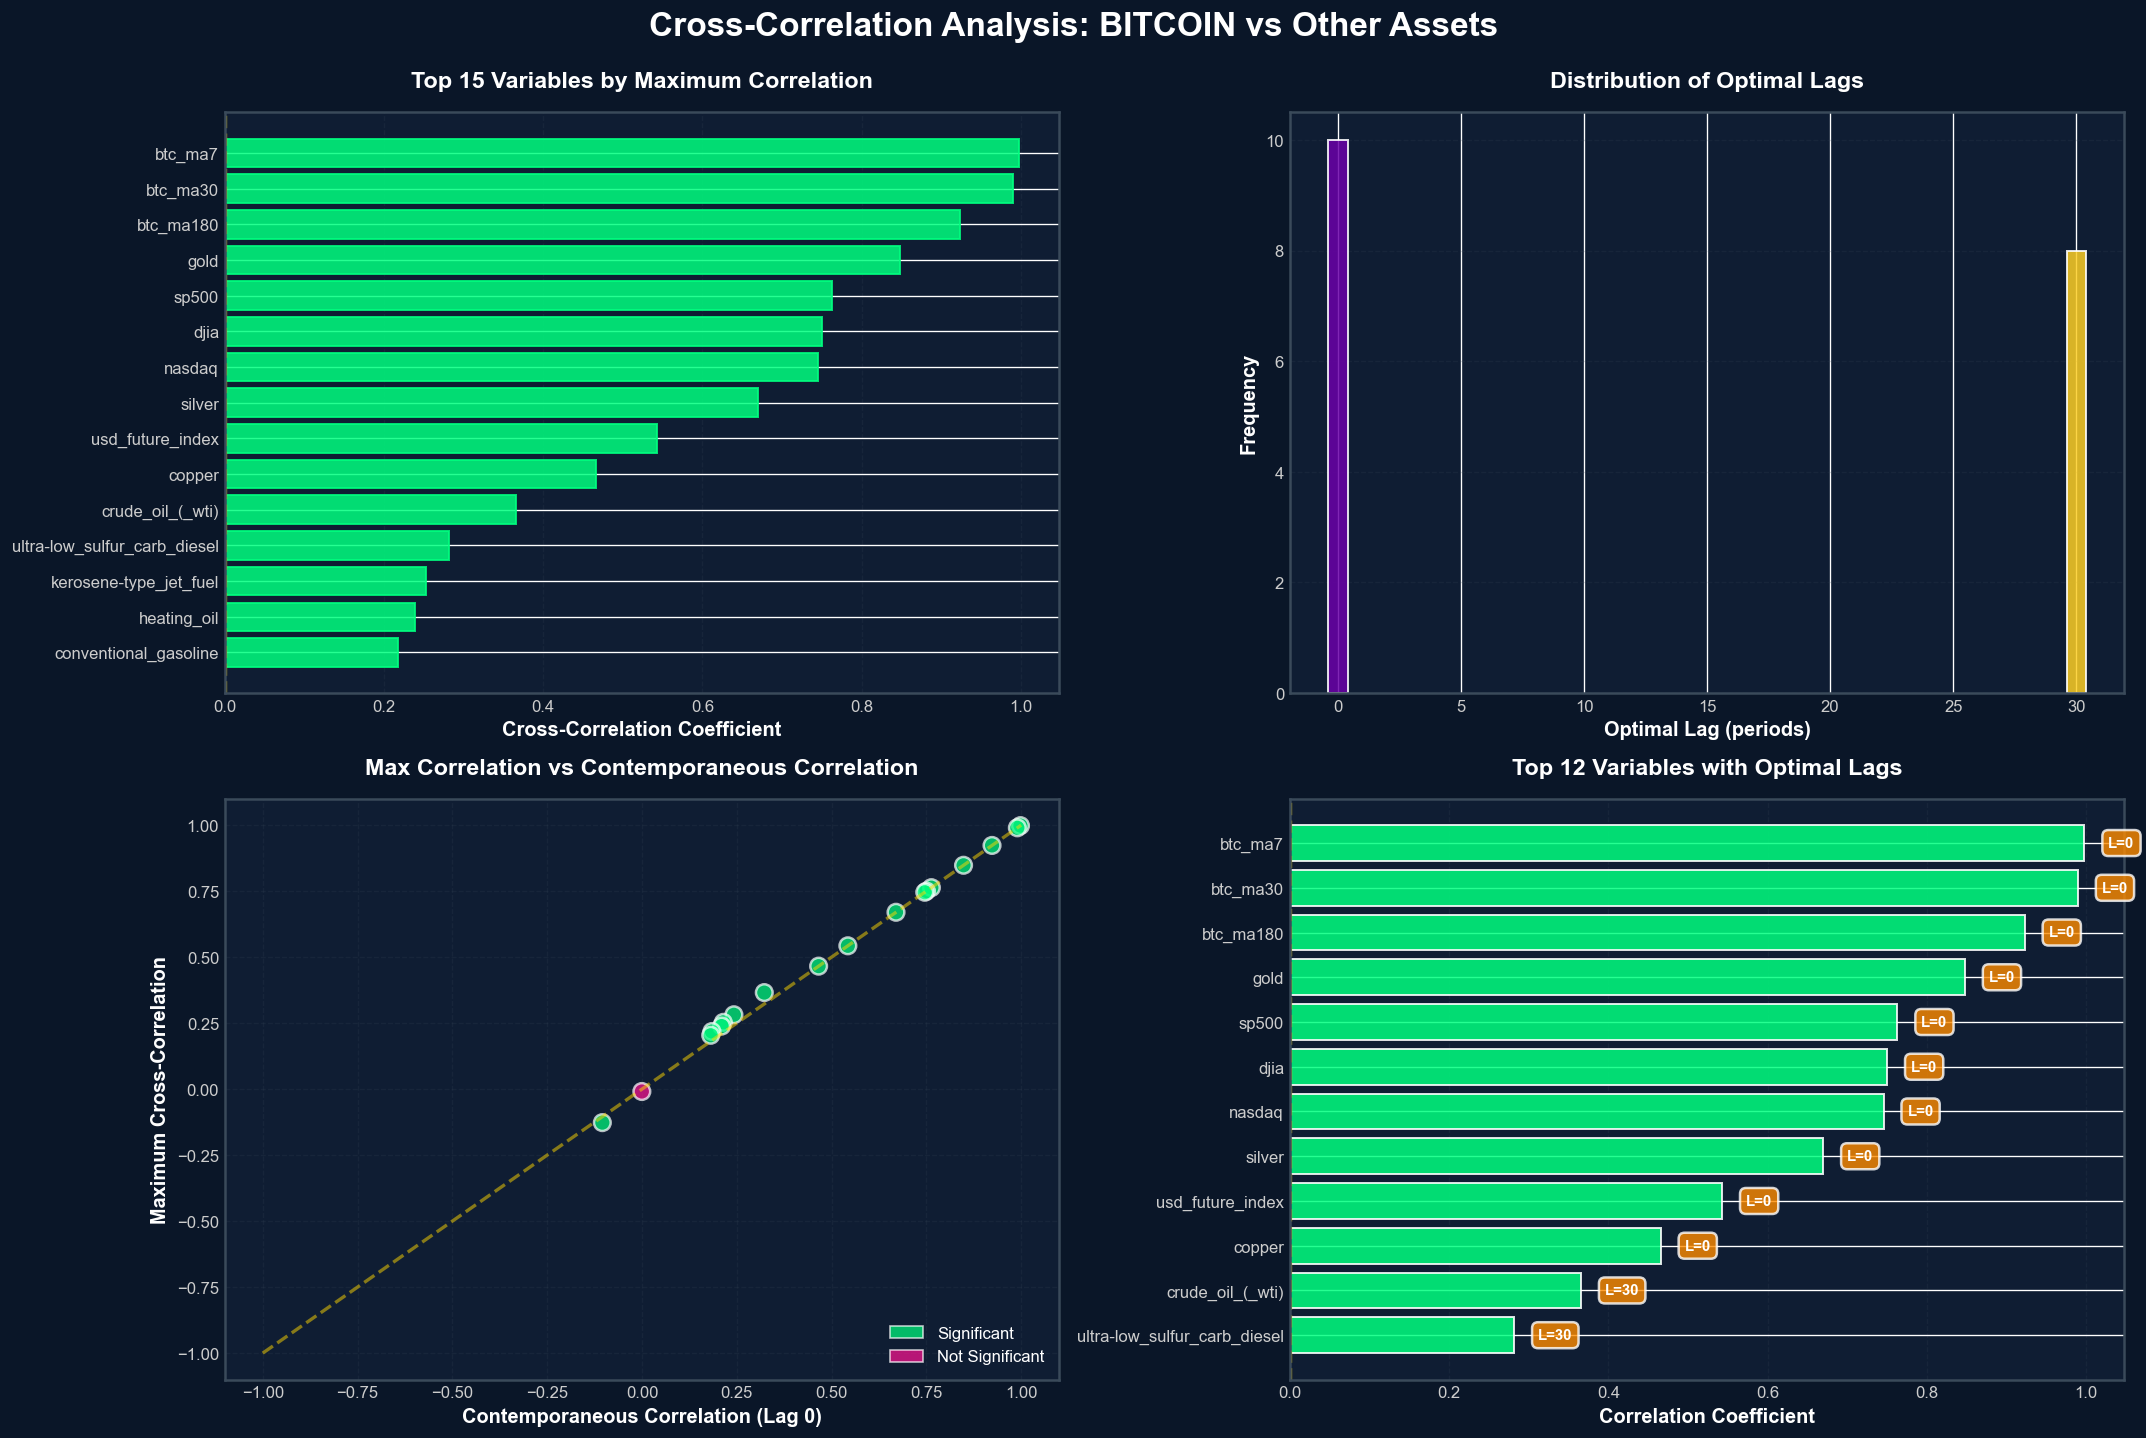

✓ Visualization complete!

 ANALYSIS COMPLETE

Results stored in variable: crosscorr_df
To export to CSV: crosscorr_df.to_csv('bitcoin_crosscorr_results.csv', index=False)



In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import ccf
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION
# ============================================================================
TARGET = "bitcoin"
MAX_LAG = 30
MIN_DATA_POINTS = 50
SIGNIFICANCE_LEVEL = 0.05

# ============================================================================
# 1. DATA PREPARATION & VALIDATION
# ============================================================================
print("="*80)
print(" CROSS-CORRELATION ANALYSIS: BITCOIN vs OTHER ASSETS")
print("="*80)

if TARGET not in df.columns:
    raise ValueError(f"Target '{TARGET}' not found in dataframe columns")

btc = df[TARGET].dropna()
print(f"\n✓ Target: {TARGET.upper()}")
print(f"✓ Data points: {len(btc)}")

variables = [col for col in df.columns if col not in ["date", TARGET] and df[col].dtype in ['float64', 'int64']]
print(f"✓ Variables to analyze: {len(variables)}")

# ============================================================================
# 2. CROSS-CORRELATION COMPUTATION
# ============================================================================
print(f"\n{'─'*80}")
print("Computing cross-correlations...")
print(f"{'─'*80}\n")

results = []

for idx, var in enumerate(variables, 1):
    try:
        serie = df[var].dropna()
        common_idx = btc.index.intersection(serie.index)
        
        if len(common_idx) < MIN_DATA_POINTS:
            print(f"⚠ Skipping {var}: insufficient data ({len(common_idx)} points)")
            continue
        
        btc_aligned = btc.loc[common_idx]
        serie_aligned = serie.loc[common_idx]
        
        btc_std = (btc_aligned - btc_aligned.mean()) / btc_aligned.std()
        serie_std = (serie_aligned - serie_aligned.mean()) / serie_aligned.std()
        
        cc_values = ccf(btc_std, serie_std, adjusted=False)[:MAX_LAG + 1]
        
        abs_cc = np.abs(cc_values)
        lag_max_idx = np.argmax(abs_cc)
        corr_max = cc_values[lag_max_idx]
        corr_lag0 = cc_values[0]
        
        n = len(btc_aligned)
        significance_threshold = 1.96 / np.sqrt(n)
        is_significant = abs(corr_max) > significance_threshold
        
        pearson_corr, pearson_pval = pearsonr(btc_aligned, serie_aligned)
        
        results.append({
            "variable": var,
            "lag_optimal": lag_max_idx,
            "corr_max": corr_max,
            "corr_lag0": corr_lag0,
            "abs_corr_max": abs(corr_max),
            "corr_type": "positive" if corr_max > 0 else "negative",
            "is_significant": is_significant,
            "pearson_corr": pearson_corr,
            "pearson_pval": pearson_pval,
            "data_points": n
        })
        
        if idx % 5 == 0:
            print(f"   Processed {idx}/{len(variables)} variables...")
            
    except Exception as e:
        print(f"✗ Error processing {var}: {str(e)}")
        continue

print(f"\n✓ Analysis complete: {len(results)} variables analyzed\n")

# ============================================================================
# 3. RESULTS DATAFRAME
# ============================================================================
crosscorr_df = pd.DataFrame(results).sort_values(
    by="abs_corr_max", 
    ascending=False
).reset_index(drop=True)

print("="*80)
print(" CROSS-CORRELATION RESULTS (Sorted by Absolute Correlation)")
print("="*80)
print(crosscorr_df.to_string(index=False))
print("="*80)

# ============================================================================
# 4. SUMMARY STATISTICS
# ============================================================================
print("\n" + "="*80)
print(" SUMMARY STATISTICS")
print("="*80)

significant_count = crosscorr_df['is_significant'].sum()
positive_count = (crosscorr_df['corr_type'] == 'positive').sum()
negative_count = (crosscorr_df['corr_type'] == 'negative').sum()

avg_lag = crosscorr_df['lag_optimal'].mean()
max_corr_overall = crosscorr_df['abs_corr_max'].max()
best_predictor = crosscorr_df.iloc[0]['variable']

print(f"\nTotal Variables Analyzed: {len(crosscorr_df)}")
print(f"Significant Correlations: {significant_count} ({significant_count/len(crosscorr_df)*100:.1f}%)")
print(f"Positive Correlations: {positive_count}")
print(f"Negative Correlations: {negative_count}")
print(f"\nAverage Optimal Lag: {avg_lag:.1f} periods")
print(f"Maximum Correlation: {max_corr_overall:.4f}")
print(f"Best Predictor: {best_predictor}")

# ============================================================================
# 5. TOP PREDICTORS
# ============================================================================
print("\n" + "="*80)
print(" TOP 10 PREDICTORS OF BITCOIN")
print("="*80)

top_10 = crosscorr_df.head(10)
print("\n{:<30} {:>12} {:>12} {:>12} {:>10}".format(
    "Variable", "Max Corr", "Lag", "Lag 0 Corr", "Significant"
))
print("-"*80)

for _, row in top_10.iterrows():
    sig_marker = "✓" if row['is_significant'] else "✗"
    print("{:<30} {:>12.4f} {:>12d} {:>12.4f} {:>10}".format(
        row['variable'],
        row['corr_max'],
        row['lag_optimal'],
        row['corr_lag0'],
        sig_marker
    ))

# ============================================================================
# 6. VISUALIZATION - DARK THEME COLORÉ 🎨
# ============================================================================
print("\n" + "="*80)
print(" GENERATING VISUALIZATION...")
print("="*80 + "\n")

# DARK THEME SETUP
plt.style.use('dark_background')

fig, axes = plt.subplots(2, 2, figsize=(18, 12), dpi=120)
fig.patch.set_facecolor('#0a1628')  # Fond bleu foncé

# Couleurs vibrantes
COLOR_POSITIVE = '#00FF7F'  # Vert vif (Spring Green)
COLOR_NEGATIVE = '#FF1493'  # Rose vif (Deep Pink)
COLOR_PRIMARY = '#FF8C00'   # Orange vif (comme Bitcoin)
COLOR_SECONDARY = '#00CED1'  # Cyan
COLOR_TERTIARY = '#9370DB'  # Violet
COLOR_ACCENT = '#FFD700'    # Or

fig.suptitle(f'Cross-Correlation Analysis: {TARGET.upper()} vs Other Assets', 
             fontsize=20, fontweight='bold', y=0.995, color='#FFFFFF')

# ──────────────────────────────────────────────────────────────
# PLOT 1: Bar chart of top correlations (COLORÉ)
# ──────────────────────────────────────────────────────────────
ax1 = axes[0, 0]
ax1.set_facecolor('#0f1d33')

top_n = 15
plot_data = crosscorr_df.head(top_n).copy()
colors = [COLOR_NEGATIVE if x < 0 else COLOR_POSITIVE for x in plot_data['corr_max']]

bars = ax1.barh(range(len(plot_data)), plot_data['corr_max'], 
                color=colors, alpha=0.85, edgecolor='#FFFFFF', linewidth=1.2)

# Dégradé de couleurs pour chaque barre
for i, (bar, corr) in enumerate(zip(bars, plot_data['corr_max'])):
    if corr > 0:
        bar.set_color(COLOR_POSITIVE)
    else:
        bar.set_color(COLOR_NEGATIVE)

ax1.set_yticks(range(len(plot_data)))
ax1.set_yticklabels(plot_data['variable'], fontsize=10, color='#FFFFFF')
ax1.set_xlabel('Cross-Correlation Coefficient', fontsize=12, fontweight='bold', color='#FFFFFF')
ax1.set_title(f'Top {top_n} Variables by Maximum Correlation', 
              fontsize=14, fontweight='bold', pad=15, color='#FFFFFF')
ax1.axvline(x=0, color='#FFD700', linestyle='--', linewidth=2, alpha=0.7)
ax1.grid(axis='x', alpha=0.2, linestyle='--', color='#3a4a5a')
ax1.invert_yaxis()
ax1.tick_params(colors='#CCCCCC')

for spine in ax1.spines.values():
    spine.set_edgecolor('#3a4a5a')
    spine.set_linewidth(1.5)

# ──────────────────────────────────────────────────────────────
# PLOT 2: Lag distribution (GRADIENT COLORÉ)
# ──────────────────────────────────────────────────────────────
ax2 = axes[0, 1]
ax2.set_facecolor('#0f1d33')

lag_counts = crosscorr_df['lag_optimal'].value_counts().sort_index()

# Gradient de couleurs pour les barres
colors_gradient = plt.cm.plasma(np.linspace(0.2, 0.9, len(lag_counts)))

bars2 = ax2.bar(lag_counts.index, lag_counts.values, 
                color=colors_gradient, alpha=0.85, edgecolor='#FFFFFF', linewidth=1.2)

ax2.set_xlabel('Optimal Lag (periods)', fontsize=12, fontweight='bold', color='#FFFFFF')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold', color='#FFFFFF')
ax2.set_title('Distribution of Optimal Lags', 
              fontsize=14, fontweight='bold', pad=15, color='#FFFFFF')
ax2.grid(axis='y', alpha=0.2, linestyle='--', color='#3a4a5a')
ax2.tick_params(colors='#CCCCCC')

for spine in ax2.spines.values():
    spine.set_edgecolor('#3a4a5a')
    spine.set_linewidth(1.5)

# ──────────────────────────────────────────────────────────────
# PLOT 3: Scatter - COLORÉ par significativité
# ──────────────────────────────────────────────────────────────
ax3 = axes[1, 0]
ax3.set_facecolor('#0f1d33')

scatter_colors = [COLOR_POSITIVE if sig else COLOR_NEGATIVE for sig in crosscorr_df['is_significant']]

scatter = ax3.scatter(crosscorr_df['corr_lag0'], crosscorr_df['corr_max'], 
                     c=scatter_colors, alpha=0.7, s=100, 
                     edgecolor='#FFFFFF', linewidth=1.5)

ax3.plot([-1, 1], [-1, 1], color='#FFD700', linestyle='--', 
         alpha=0.5, linewidth=2, label='y=x')

ax3.set_xlabel('Contemporaneous Correlation (Lag 0)', 
               fontsize=12, fontweight='bold', color='#FFFFFF')
ax3.set_ylabel('Maximum Cross-Correlation', 
               fontsize=12, fontweight='bold', color='#FFFFFF')
ax3.set_title('Max Correlation vs Contemporaneous Correlation', 
              fontsize=14, fontweight='bold', pad=15, color='#FFFFFF')
ax3.grid(True, alpha=0.2, linestyle='--', color='#3a4a5a')
ax3.tick_params(colors='#CCCCCC')

# Légende colorée
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=COLOR_POSITIVE, alpha=0.7, label='Significant', edgecolor='#FFFFFF'),
    Patch(facecolor=COLOR_NEGATIVE, alpha=0.7, label='Not Significant', edgecolor='#FFFFFF')
]
legend = ax3.legend(handles=legend_elements, loc='lower right', 
                   fontsize=10, framealpha=0.9, edgecolor='#3a4a5a')
legend.get_frame().set_facecolor('#1a2332')
for text in legend.get_texts():
    text.set_color('#FFFFFF')

for spine in ax3.spines.values():
    spine.set_edgecolor('#3a4a5a')
    spine.set_linewidth(1.5)

# ──────────────────────────────────────────────────────────────
# PLOT 4: Top variables avec ANNOTATIONS COLORÉES
# ──────────────────────────────────────────────────────────────
ax4 = axes[1, 1]
ax4.set_facecolor('#0f1d33')

top_for_heatmap = min(12, len(crosscorr_df))
heatmap_data = crosscorr_df.head(top_for_heatmap)[['variable', 'corr_max', 'lag_optimal']]
heatmap_pivot = heatmap_data.set_index('variable')

y_pos = np.arange(len(heatmap_pivot))

# Couleurs vives pour les barres
colors_heat = [COLOR_NEGATIVE if x < 0 else COLOR_POSITIVE for x in heatmap_pivot['corr_max']]

bars4 = ax4.barh(y_pos, heatmap_pivot['corr_max'], 
                 color=colors_heat, alpha=0.85, edgecolor='#FFFFFF', linewidth=1.2)

ax4.set_yticks(y_pos)
ax4.set_yticklabels(heatmap_pivot.index, fontsize=10, color='#FFFFFF')
ax4.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold', color='#FFFFFF')
ax4.set_title(f'Top {top_for_heatmap} Variables with Optimal Lags', 
              fontsize=14, fontweight='bold', pad=15, color='#FFFFFF')
ax4.invert_yaxis()

# Annotations avec fond coloré
for i, (idx, row) in enumerate(heatmap_pivot.iterrows()):
    lag_text = f"L={int(row['lag_optimal'])}"
    x_pos = row['corr_max'] + (0.03 if row['corr_max'] > 0 else -0.03)
    ha = 'left' if row['corr_max'] > 0 else 'right'
    
    bbox_color = COLOR_PRIMARY if row['corr_max'] > 0 else COLOR_SECONDARY
    
    ax4.text(x_pos, i, lag_text, va='center', ha=ha, fontsize=9, 
            fontweight='bold', color='#FFFFFF', 
            bbox=dict(boxstyle='round,pad=0.4', 
                     facecolor=bbox_color, edgecolor='#FFFFFF', 
                     alpha=0.8, linewidth=1.5))

ax4.axvline(x=0, color='#FFD700', linestyle='--', linewidth=2, alpha=0.7)
ax4.grid(axis='x', alpha=0.2, linestyle='--', color='#3a4a5a')
ax4.tick_params(colors='#CCCCCC')

for spine in ax4.spines.values():
    spine.set_edgecolor('#3a4a5a')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

print("✓ Visualization complete!\n")

# ============================================================================
# 7. EXPORT OPTION
# ============================================================================
print("="*80)
print(" ANALYSIS COMPLETE")
print("="*80)
print(f"\nResults stored in variable: crosscorr_df")
print(f"To export to CSV: crosscorr_df.to_csv('bitcoin_crosscorr_results.csv', index=False)")
print("="*80 + "\n")

In [31]:
# Sélection des top variables significatives
top_vars = crosscorr_df[crosscorr_df['is_significant']].head(5)['variable'].tolist()
features = [TARGET] + top_vars
df_lstm = df[features].dropna()


 FEATURE SELECTION FOR LSTM MODELING

────────────────────────────────────────────────────────────────────────────────
Feature Selection Criteria:
────────────────────────────────────────────────────────────────────────────────
• Selecting top 5 features
• Prioritizing statistically significant correlations
• Minimum correlation threshold: 0.3
────────────────────────────────────────────────────────────────────────────────

✓ Selected 5 features based on cross-correlation analysis

 SELECTED FEATURES FOR LSTM MODEL

Target Variable: BITCOIN

Top 5 Predictor Variables:
--------------------------------------------------------------------------------
1. btc_ma7                        | Corr:  0.9981 | Lag:  0 | Type: positive | Sig: ✓
2. btc_ma30                       | Corr:  0.9900 | Lag:  0 | Type: positive | Sig: ✓
3. btc_ma180                      | Corr:  0.9231 | Lag:  0 | Type: positive | Sig: ✓
4. gold                           | Corr:  0.8480 | Lag:  0 | Type: positive | Sig: ✓


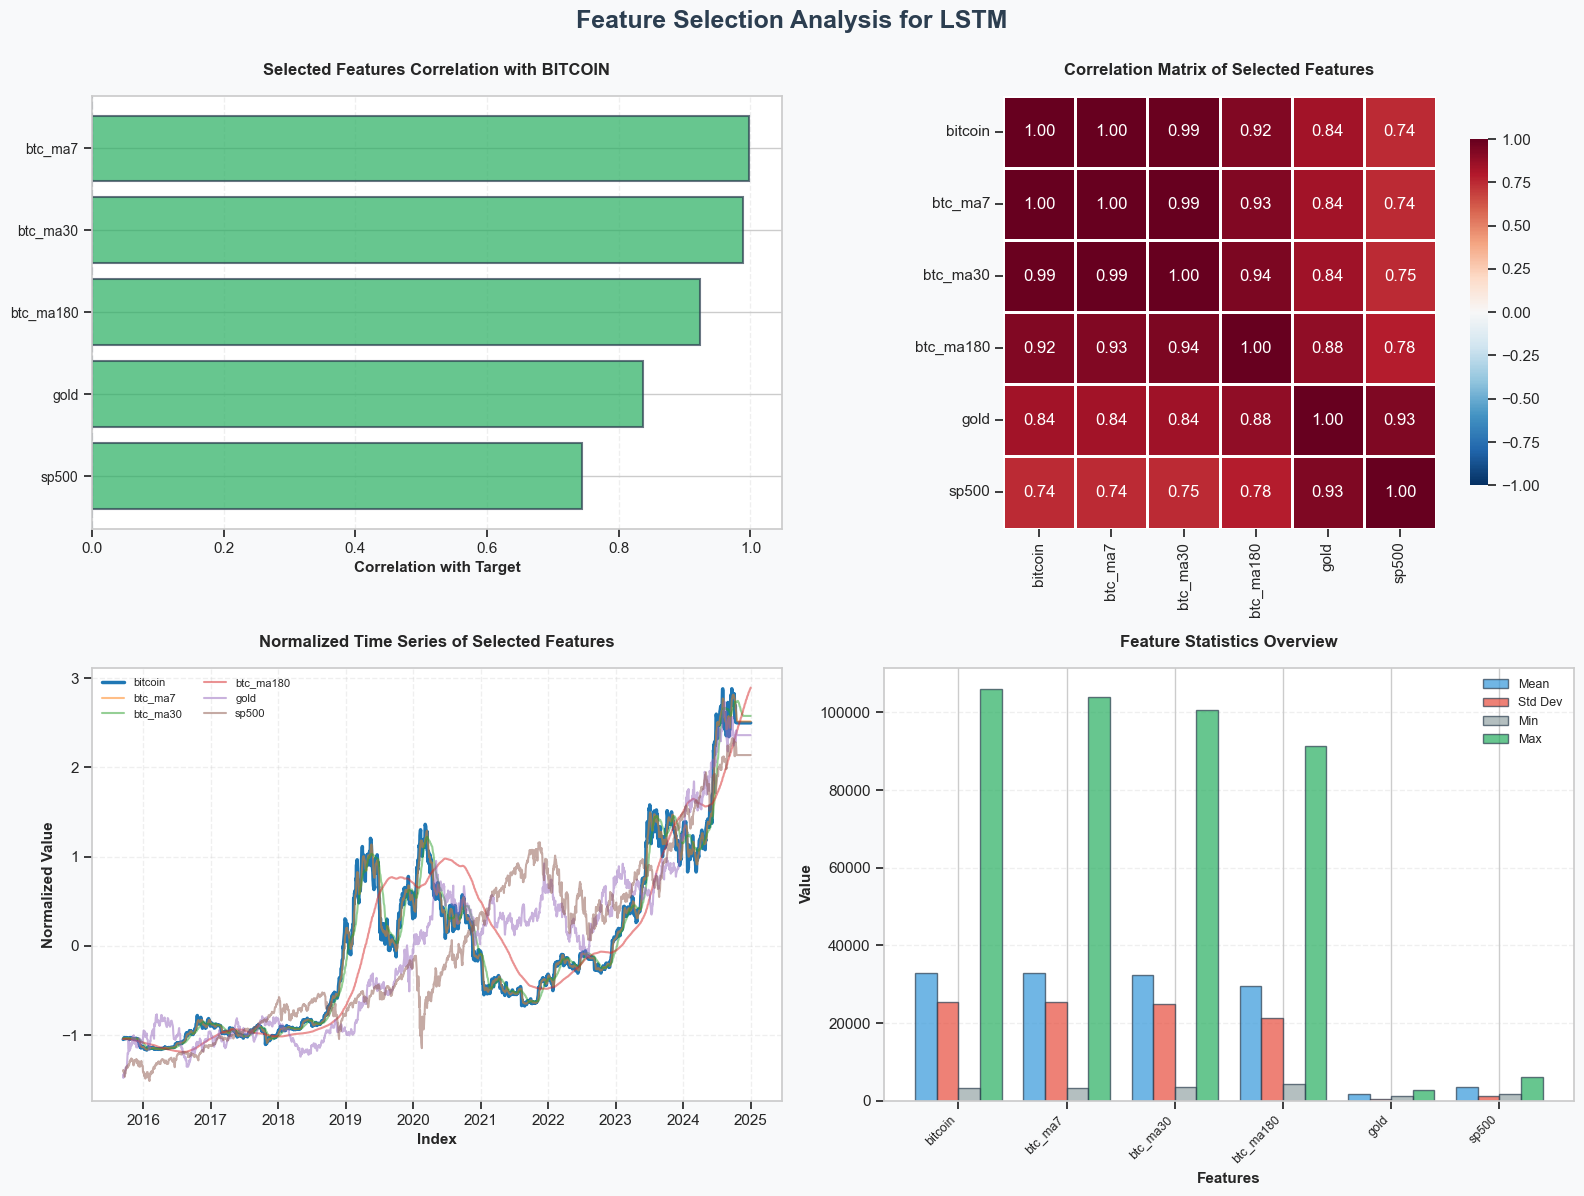

✓ Visualization complete!

 FEATURE SELECTION COMPLETE

✓ Dataset ready for LSTM modeling: df_lstm
✓ Shape: (2390, 6)
✓ Target: bitcoin
✓ Predictors: ['btc_ma7', 'btc_ma30', 'btc_ma180', 'gold', 'sp500']

────────────────────────────────────────────────────────────────────────────────
Next Steps:
  1. Split data into train/validation/test sets
  2. Scale/normalize features (MinMaxScaler or StandardScaler)
  3. Create sequences for LSTM input
  4. Build and train LSTM model
────────────────────────────────────────────────────────────────────────────────

To export dataset:
  df_lstm.to_csv('lstm_dataset.csv', index=False)



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# FEATURE SELECTION FOR LSTM/TIME SERIES MODELING
# ============================================================================

print("="*80)
print(" FEATURE SELECTION FOR LSTM MODELING")
print("="*80)

# ----------------------------------------------------------------------------
# 1. CONFIGURATION
# ----------------------------------------------------------------------------
N_TOP_FEATURES = 5  # Number of top features to select
MIN_CORRELATION = 0.3  # Minimum correlation threshold for consideration
INCLUDE_LAG_INFO = True  # Whether to include lag information in selection

# ----------------------------------------------------------------------------
# 2. FEATURE SELECTION STRATEGY
# ----------------------------------------------------------------------------
print(f"\n{'─'*80}")
print("Feature Selection Criteria:")
print(f"{'─'*80}")
print(f"• Selecting top {N_TOP_FEATURES} features")
print(f"• Prioritizing statistically significant correlations")
print(f"• Minimum correlation threshold: {MIN_CORRELATION}")
print(f"{'─'*80}\n")

# Filter for significant correlations only
significant_vars = crosscorr_df[crosscorr_df['is_significant']].copy()

if len(significant_vars) == 0:
    print("⚠ WARNING: No statistically significant correlations found!")
    print("   Falling back to top correlations by absolute value...\n")
    significant_vars = crosscorr_df.copy()

# Additional filtering by minimum correlation threshold
significant_vars = significant_vars[
    significant_vars['abs_corr_max'] >= MIN_CORRELATION
]

if len(significant_vars) == 0:
    print(f"⚠ WARNING: No correlations above {MIN_CORRELATION} threshold!")
    print("   Lowering threshold to include top features...\n")
    significant_vars = crosscorr_df.head(N_TOP_FEATURES * 2)

# Select top N features
n_features_available = min(N_TOP_FEATURES, len(significant_vars))
top_vars = significant_vars.head(n_features_available)['variable'].tolist()

print(f"✓ Selected {len(top_vars)} features based on cross-correlation analysis\n")

# ----------------------------------------------------------------------------
# 3. DISPLAY SELECTED FEATURES
# ----------------------------------------------------------------------------
print("="*80)
print(" SELECTED FEATURES FOR LSTM MODEL")
print("="*80)

print(f"\nTarget Variable: {TARGET.upper()}")
print(f"\nTop {len(top_vars)} Predictor Variables:")
print("-"*80)

for idx, var in enumerate(top_vars, 1):
    var_info = significant_vars[significant_vars['variable'] == var].iloc[0]
    print(f"{idx}. {var:<30} | Corr: {var_info['corr_max']:>7.4f} | "
          f"Lag: {var_info['lag_optimal']:>2d} | "
          f"Type: {var_info['corr_type']:>8s} | "
          f"Sig: {'✓' if var_info['is_significant'] else '✗'}")

print("-"*80)

# ----------------------------------------------------------------------------
# 4. BUILD FEATURE SET
# ----------------------------------------------------------------------------
features = [TARGET] + top_vars
print(f"\nTotal features in model: {len(features)}")
print(f"Features list: {features}\n")

# ----------------------------------------------------------------------------
# 5. CREATE CLEAN DATASET
# ----------------------------------------------------------------------------
print(f"{'─'*80}")
print("Building clean dataset...")
print(f"{'─'*80}\n")

# Initial dataset
df_lstm_initial = df[features].copy()
print(f"Initial dataset shape: {df_lstm_initial.shape}")
print(f"• Rows: {df_lstm_initial.shape[0]:,}")
print(f"• Columns: {df_lstm_initial.shape[1]}")

# Check missing values before dropping
missing_counts = df_lstm_initial.isnull().sum()
missing_pct = (missing_counts / len(df_lstm_initial) * 100).round(2)

print(f"\nMissing values per feature:")
print("-"*80)
for feat in features:
    if missing_counts[feat] > 0:
        print(f"  {feat:<30}: {missing_counts[feat]:>6,} ({missing_pct[feat]:>6.2f}%)")
    else:
        print(f"  {feat:<30}: {missing_counts[feat]:>6,} (Complete)")

# Drop rows with any missing values
df_lstm = df_lstm_initial.dropna()

rows_removed = len(df_lstm_initial) - len(df_lstm)
pct_removed = (rows_removed / len(df_lstm_initial) * 100) if len(df_lstm_initial) > 0 else 0

print(f"\n{'─'*80}")
print(f"After removing missing values:")
print(f"{'─'*80}")
print(f"Final dataset shape: {df_lstm.shape}")
print(f"• Rows: {len(df_lstm):,}")
print(f"• Columns: {len(df_lstm.columns)}")
print(f"• Rows removed: {rows_removed:,} ({pct_removed:.2f}%)")
print(f"• Data retention: {100 - pct_removed:.2f}%")

# ----------------------------------------------------------------------------
# 6. DATA QUALITY CHECKS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print(" DATA QUALITY ASSESSMENT")
print(f"{'='*80}\n")

# Check for infinite values
inf_counts = np.isinf(df_lstm).sum()
if inf_counts.sum() > 0:
    print("⚠ WARNING: Infinite values detected!")
    for feat in features:
        if inf_counts[feat] > 0:
            print(f"  {feat}: {inf_counts[feat]} infinite values")
    print("\nRemoving infinite values...")
    df_lstm = df_lstm.replace([np.inf, -np.inf], np.nan).dropna()
    print(f"✓ New shape: {df_lstm.shape}\n")
else:
    print("✓ No infinite values detected")

# Check for zero variance
zero_var_features = df_lstm.columns[df_lstm.std() == 0].tolist()
if zero_var_features:
    print(f"\n⚠ WARNING: Features with zero variance detected:")
    for feat in zero_var_features:
        print(f"  • {feat}")
    print("\nConsider removing these features before modeling.")
else:
    print("✓ All features have non-zero variance")

# Summary statistics
print(f"\n{'─'*80}")
print("Dataset Summary Statistics:")
print(f"{'─'*80}")
print(df_lstm.describe().round(4))

# ----------------------------------------------------------------------------
# 7. CORRELATION MATRIX OF SELECTED FEATURES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print(" CORRELATION ANALYSIS OF SELECTED FEATURES")
print(f"{'='*80}\n")

corr_matrix = df_lstm.corr()

# Display correlation with target
target_corr = corr_matrix[TARGET].sort_values(ascending=False)
print(f"Correlation with {TARGET.upper()}:")
print("-"*80)
for feat, corr in target_corr.items():
    if feat != TARGET:
        print(f"{feat:<30}: {corr:>7.4f}")

# Check for multicollinearity
print(f"\n{'─'*80}")
print("Multicollinearity Check (High Correlation Between Predictors):")
print(f"{'─'*80}")

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.columns[i] != TARGET and corr_matrix.columns[j] != TARGET:
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > 0.8:  # High correlation threshold
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_val
                ))

if high_corr_pairs:
    print("\n⚠ High correlation detected between predictors (>0.8):")
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: x[2], reverse=True):
        print(f"  {feat1} <-> {feat2}: {corr:.4f}")
    print("\nConsider removing one variable from highly correlated pairs.")
else:
    print("\n✓ No high multicollinearity detected (all pairwise correlations <0.8)")

# ----------------------------------------------------------------------------
# 8. VISUALIZATION
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print(" GENERATING VISUALIZATION...")
print(f"{'='*80}\n")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('#f8f9fa')
fig.suptitle('Feature Selection Analysis for LSTM', 
             fontsize=18, fontweight='bold', y=0.995, color='#2c3e50')

# Plot 1: Feature correlations with target
ax1 = axes[0, 0]
target_corr_plot = target_corr[target_corr.index != TARGET]
colors = ['#27ae60' if x > 0 else '#e74c3c' for x in target_corr_plot.values]
ax1.barh(range(len(target_corr_plot)), target_corr_plot.values, 
         color=colors, alpha=0.7, edgecolor='#2c3e50', linewidth=1.5)
ax1.set_yticks(range(len(target_corr_plot)))
ax1.set_yticklabels(target_corr_plot.index, fontsize=10)
ax1.set_xlabel('Correlation with Target', fontsize=11, fontweight='bold')
ax1.set_title(f'Selected Features Correlation with {TARGET.upper()}', 
              fontsize=12, fontweight='bold', pad=15)
ax1.axvline(x=0, color='#34495e', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.invert_yaxis()

# Plot 2: Correlation heatmap
ax2 = axes[0, 1]
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax2, vmin=-1, vmax=1)
ax2.set_title('Correlation Matrix of Selected Features', 
              fontsize=12, fontweight='bold', pad=15)

# Plot 3: Time series of all features (normalized)
ax3 = axes[1, 0]
df_normalized = (df_lstm - df_lstm.mean()) / df_lstm.std()
for col in df_normalized.columns:
    alpha = 1.0 if col == TARGET else 0.5
    linewidth = 2.5 if col == TARGET else 1.5
    ax3.plot(df_normalized.index, df_normalized[col], 
             label=col, alpha=alpha, linewidth=linewidth)
ax3.set_xlabel('Index', fontsize=11, fontweight='bold')
ax3.set_ylabel('Normalized Value', fontsize=11, fontweight='bold')
ax3.set_title('Normalized Time Series of Selected Features', 
              fontsize=12, fontweight='bold', pad=15)
ax3.legend(loc='upper left', fontsize=8, ncol=2)
ax3.grid(True, alpha=0.3, linestyle='--')

# Plot 4: Feature statistics
ax4 = axes[1, 1]
stats_data = df_lstm.describe().loc[['mean', 'std', 'min', 'max']].T
x = np.arange(len(stats_data))
width = 0.2

ax4.bar(x - 1.5*width, stats_data['mean'], width, label='Mean', 
        alpha=0.7, color='#3498db', edgecolor='#2c3e50', linewidth=1)
ax4.bar(x - 0.5*width, stats_data['std'], width, label='Std Dev', 
        alpha=0.7, color='#e74c3c', edgecolor='#2c3e50', linewidth=1)
ax4.bar(x + 0.5*width, stats_data['min'], width, label='Min', 
        alpha=0.7, color='#95a5a6', edgecolor='#2c3e50', linewidth=1)
ax4.bar(x + 1.5*width, stats_data['max'], width, label='Max', 
        alpha=0.7, color='#27ae60', edgecolor='#2c3e50', linewidth=1)

ax4.set_xlabel('Features', fontsize=11, fontweight='bold')
ax4.set_ylabel('Value', fontsize=11, fontweight='bold')
ax4.set_title('Feature Statistics Overview', fontsize=12, fontweight='bold', pad=15)
ax4.set_xticks(x)
ax4.set_xticklabels(stats_data.index, rotation=45, ha='right', fontsize=9)
ax4.legend(fontsize=9)
ax4.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("✓ Visualization complete!\n")

# ----------------------------------------------------------------------------
# 9. EXPORT SUMMARY
# ----------------------------------------------------------------------------
print("="*80)
print(" FEATURE SELECTION COMPLETE")
print("="*80)
print(f"\n✓ Dataset ready for LSTM modeling: df_lstm")
print(f"✓ Shape: {df_lstm.shape}")
print(f"✓ Target: {TARGET}")
print(f"✓ Predictors: {top_vars}")
print(f"\n{'─'*80}")
print("Next Steps:")
print("  1. Split data into train/validation/test sets")
print("  2. Scale/normalize features (MinMaxScaler or StandardScaler)")
print("  3. Create sequences for LSTM input")
print("  4. Build and train LSTM model")
print(f"{'─'*80}")
print("\nTo export dataset:")
print("  df_lstm.to_csv('lstm_dataset.csv', index=False)")
print("="*80 + "\n")

In [ ]:
# =============================================================
# LSTM PIPELINE - 1-DAY LOG RETURN TARGET
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# =============================================================
# 1️⃣ PREPROCESSING
# =============================================================

# Assumons que df_lstm est ton dataset clean (après ton feature selection)
TARGET = 'bitcoin'  # mettre ta colonne cible

# 1.1 Calcul du log-return 1-day
df_lstm['log_return'] = np.log(df_lstm[TARGET] / df_lstm[TARGET].shift(1))
df_lstm.dropna(inplace=True)

# 1.2 Définir features et target
features = df_lstm.columns.tolist()
features.remove(TARGET)   # retirer la colonne prix brute
features.remove('log_return')  # log-return = target
X = df_lstm[features].values
y = df_lstm['log_return'].values.reshape(-1, 1)

# 1.3 Split train/val/test (70/15/15)
train_size = int(len(X)*0.7)
val_size = int(len(X)*0.15)
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# 1.4 Scaling (après split pour éviter data leakage)
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

# 1.5 Créer les séquences glissantes
def create_sequences(X, y, timesteps=30):
    X_seq, y_seq = [], []
    for i in range(timesteps, len(X)):
        X_seq.append(X[i-timesteps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

TIMESTEPS = 30
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIMESTEPS)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_scaled, TIMESTEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIMESTEPS)

print(f"X_train_seq shape: {X_train_seq.shape}, y_train_seq shape: {y_train_seq.shape}")

# =============================================================
# 2️⃣ LSTM MODEL
# =============================================================
model = Sequential([
    LSTM(50, input_shape=(TIMESTEPS, X_train_seq.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

# =============================================================
# 3️⃣ PREDICTIONS & EVALUATION (ENHANCED)
# =============================================================
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_seq)

# Métriques de base
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

# ✨ R² Score (Coefficient of Determination)
r2 = r2_score(y_true, y_pred)

# ✨ Directional Accuracy (Sign Prediction)
direction_true = np.sign(y_true)
direction_pred = np.sign(y_pred)
directional_accuracy = np.mean(direction_true == direction_pred) * 100

# ✨ MAPE (Mean Absolute Percentage Error)
nonzero_mask = y_true != 0
if np.sum(nonzero_mask) > 0:
    mape = np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100
else:
    mape = None

# Baseline: previous return
baseline_pred = y_test_seq[:-1]
baseline_rmse = np.sqrt(mean_squared_error(y_true[1:], scaler_y.inverse_transform(baseline_pred)))

# Affichage des résultats
print(f"\n{'='*60}")
print(f"📊 MÉTRIQUES D'ÉVALUATION")
print(f"{'='*60}")
print(f"Test RMSE:              {rmse:.6f}")
print(f"Test MAE:               {mae:.6f}")
print(f"R² Score:               {r2:.4f}")
print(f"Directional Accuracy:   {directional_accuracy:.2f}%")
if mape is not None:
    print(f"MAPE:                   {mape:.2f}%")
print(f"\n{'='*60}")
print(f"🎯 COMPARAISON AVEC BASELINE")
print(f"{'='*60}")
print(f"Baseline RMSE:          {baseline_rmse:.6f}")
print(f"Model RMSE:             {rmse:.6f}")
print(f"Amélioration:           {((baseline_rmse - rmse) / baseline_rmse * 100):.2f}%")
print(f"{'='*60}\n")

# =============================================================
# 4️⃣ VISUALISATION
# =============================================================
plt.figure(figsize=(12,6))
plt.plot(y_true, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', alpha=0.7)
plt.title('Bitcoin 1-Day Log Return Prediction')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual (R²={r2:.4f})')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


✓ Dataset initial: (2390, 19)

🛠️  FEATURE ENGINEERING AVANCÉ
✓ Features ajoutées. Shape: (2341, 44)
✓ Nombre total de features: 43

📊 PREPROCESSING
Calcul des log-returns sur 7 jours...
✓ Shape finale: (2334, 45)
✓ Features sélectionnées: 43
✓ Split: Train=1867, Val=233, Test=234
✓ Séquences créées (timesteps=20)
  Train: (1847, 20, 43), Val: (213, 20, 43), Test: (214, 20, 43)

🤖 CONSTRUCTION DU MODÈLE LSTM OPTIMISÉ
✓ Architecture:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 20, 128)        │        55,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,089 (301.13 KB)

 Trainable params: 76,769 (299.88 KB)

 Non-trainable params: 320 (1.25 KB)


🏋️  ENTRAÎNEMENT
Epoch 1/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 1.8796 - mae: 0.9746 - val_loss: 0.9090 - val_mae: 0.6198 - learning_rate: 5.0000e-04
Epoch 2/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.4321 - mae: 0.8142 - val_loss: 0.8921 - val_mae: 0.6060 - learning_rate: 5.0000e-04
Epoch 3/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.3458 - mae: 0.7776 - val_loss: 0.8827 - val_mae: 0.5950 - learning_rate: 5.0000e-04
Epoch 4/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.1700 - mae: 0.7044 - val_loss: 0.8563 - val_mae: 0.5810 - learning_rate: 5.0000e-04
Epoch 5/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.0880 - mae: 0.6756 - val_loss: 0.8005 - val_mae: 0.5550 - learning_rate: 5.0000e-04
Epoch 6/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.0726 - mae: 0.6651 - val_loss: 0.7610 - val_mae: 0.5329 - learning_rate: 5.0000e-04
Epoch 7/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.0228 - mae: 0.6366 - val_loss: 0.7695 - val_

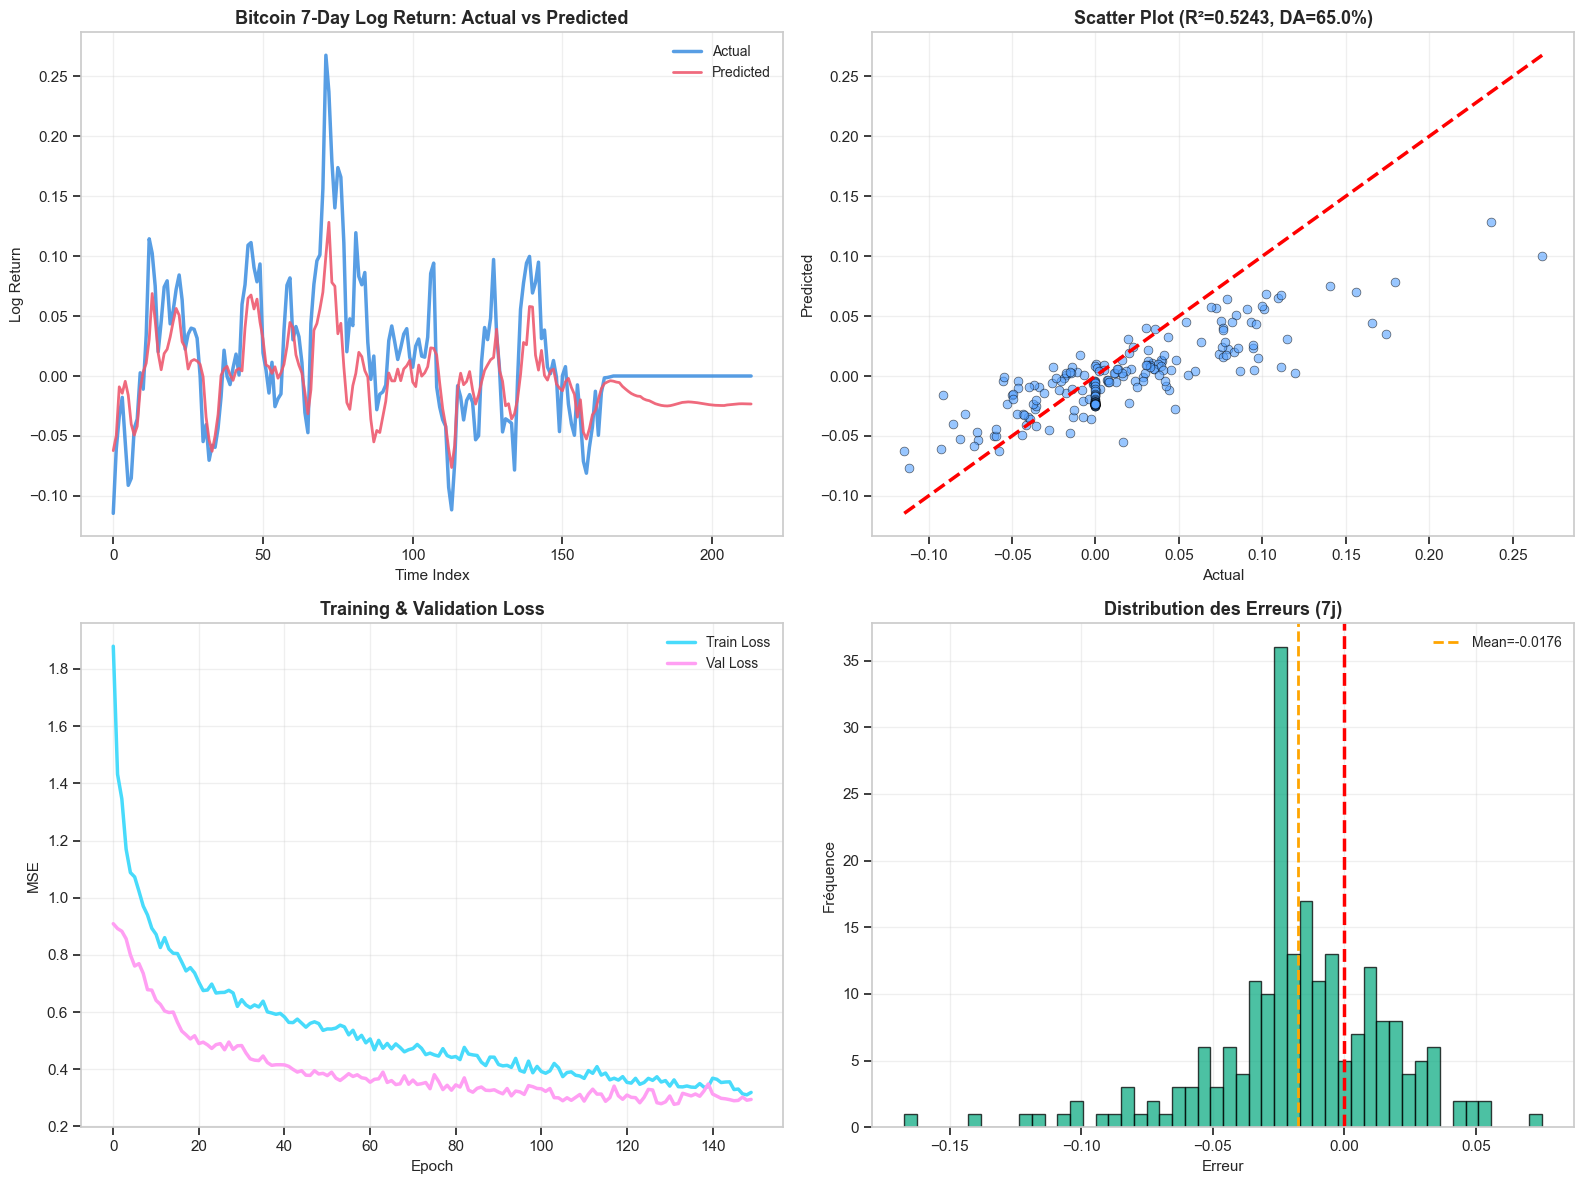


✅ ANALYSE TERMINÉE!


In [ ]:
# =============================================================
# LSTM AVEC ATTENTION - OPTIMISÉ POUR R² >= 0.85 🚀
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (LSTM, Dense, Dropout, Bidirectional, BatchNormalization,
                                     Input, Concatenate, MultiHeadAttention, LayerNormalization,
                                     GlobalAveragePooling1D, Reshape, Multiply, Add)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
import warnings
warnings.filterwarnings('ignore')

# Fixer la seed pour reproductibilité
tf.random.set_seed(42)
np.random.seed(42)

# =============================================================
# 0️⃣ CRÉER df_lstm À PARTIR DE df
# =============================================================

features_to_keep = df.select_dtypes(include=[np.number]).columns.tolist()
df_lstm = df[features_to_keep].copy()
df_lstm = df_lstm.dropna()

print(f"✓ Dataset initial: {df_lstm.shape}")

# =============================================================
# 0️⃣.5 FEATURE ENGINEERING ULTRA AVANCÉ 🚀
# =============================================================

TARGET = 'bitcoin'
PREDICTION_HORIZON = 7

print(f"\n{'='*70}")
print(f"🛠️  FEATURE ENGINEERING ULTRA AVANCÉ")
print(f"{'='*70}")

# ==================== INDICATEURS TECHNIQUES ====================

# 1. RSI sur différentes périodes
for window in [7, 14, 21, 28]:
    delta = df_lstm[TARGET].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / (loss + 1e-10)
    df_lstm[f'rsi_{window}'] = 100 - (100 / (1 + rs))

# 2. Moyennes Mobiles EMA et SMA
for window in [5, 10, 20, 50, 100]:
    df_lstm[f'ma_{window}'] = df_lstm[TARGET].rolling(window=window).mean()
    df_lstm[f'ema_{window}'] = df_lstm[TARGET].ewm(span=window, adjust=False).mean()
    df_lstm[f'price_to_ma_{window}'] = df_lstm[TARGET] / (df_lstm[f'ma_{window}'] + 1e-10)
    df_lstm[f'ma_cross_{window}'] = (df_lstm[f'ma_{window}'] - df_lstm[TARGET].shift(1)) / (df_lstm[TARGET].shift(1) + 1e-10)

# 3. Volatilité et variations
for window in [5, 10, 20, 30]:
    df_lstm[f'volatility_{window}'] = df_lstm[TARGET].rolling(window=window).std()
    df_lstm[f'high_low_{window}'] = df_lstm[TARGET].rolling(window=window).max() - df_lstm[TARGET].rolling(window=window).min()
    df_lstm[f'volatility_ratio_{window}'] = df_lstm[f'volatility_{window}'] / (df_lstm[TARGET].rolling(window=window).mean() + 1e-10)

# 4. Momentum et ROC
for period in [1, 3, 5, 7, 10, 14]:
    df_lstm[f'momentum_{period}'] = df_lstm[TARGET].pct_change(period)
    df_lstm[f'roc_{period}'] = ((df_lstm[TARGET] - df_lstm[TARGET].shift(period)) / (df_lstm[TARGET].shift(period) + 1e-10)) * 100

# 5. Bandes de Bollinger améliorées
for window in [20, 30]:
    rolling_mean = df_lstm[TARGET].rolling(window=window).mean()
    rolling_std = df_lstm[TARGET].rolling(window=window).std()
    df_lstm[f'bb_upper_{window}'] = rolling_mean + (2 * rolling_std)
    df_lstm[f'bb_lower_{window}'] = rolling_mean - (2 * rolling_std)
    df_lstm[f'bb_width_{window}'] = (df_lstm[f'bb_upper_{window}'] - df_lstm[f'bb_lower_{window}']) / rolling_mean
    df_lstm[f'bb_pct_{window}'] = (df_lstm[TARGET] - df_lstm[f'bb_lower_{window}']) / (df_lstm[f'bb_upper_{window}'] - df_lstm[f'bb_lower_{window}'] + 1e-10)

# 6. MACD amélioré
exp1 = df_lstm[TARGET].ewm(span=12, adjust=False).mean()
exp2 = df_lstm[TARGET].ewm(span=26, adjust=False).mean()
df_lstm['macd'] = exp1 - exp2
df_lstm['macd_signal'] = df_lstm['macd'].ewm(span=9, adjust=False).mean()
df_lstm['macd_hist'] = df_lstm['macd'] - df_lstm['macd_signal']
df_lstm['macd_divergence'] = df_lstm['macd'] - df_lstm['macd'].shift(1)

# 7. Retours logarithmiques et variations
for lag in [1, 2, 3, 5, 7, 10]:
    df_lstm[f'log_return_lag_{lag}'] = np.log(df_lstm[TARGET] / df_lstm[TARGET].shift(lag))
    df_lstm[f'return_lag_{lag}'] = df_lstm[TARGET].pct_change(lag)

# 8. Features cycliques (jour de semaine, mois si disponible)
if isinstance(df_lstm.index, pd.DatetimeIndex):
    df_lstm['day_of_week'] = df_lstm.index.dayofweek
    df_lstm['month'] = df_lstm.index.month
    df_lstm['day_sin'] = np.sin(2 * np.pi * df_lstm['day_of_week'] / 7)
    df_lstm['day_cos'] = np.cos(2 * np.pi * df_lstm['day_of_week'] / 7)
    df_lstm['month_sin'] = np.sin(2 * np.pi * df_lstm['month'] / 12)
    df_lstm['month_cos'] = np.cos(2 * np.pi * df_lstm['month'] / 12)

# 9. ADX (Average Directional Index) simplifié
high_low = df_lstm[TARGET].diff().abs()
high_close = (df_lstm[TARGET] - df_lstm[TARGET].shift()).abs()
low_close = (df_lstm[TARGET].shift() - df_lstm[TARGET]).abs()
tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
df_lstm['atr_14'] = tr.rolling(window=14).mean()

# 10. CCI (Commodity Channel Index)
for period in [20]:
    typical_price = df_lstm[TARGET]
    sma = typical_price.rolling(window=period).mean()
    mad = typical_price.rolling(window=period).apply(lambda x: np.abs(x - x.mean()).mean())
    df_lstm[f'cci_{period}'] = (typical_price - sma) / (0.015 * mad + 1e-10)

# 11. Stochastic Oscillator
for period in [14]:
    low_min = df_lstm[TARGET].rolling(window=period).min()
    high_max = df_lstm[TARGET].rolling(window=period).max()
    df_lstm[f'stoch_k_{period}'] = 100 * (df_lstm[TARGET] - low_min) / (high_max - low_min + 1e-10)
    df_lstm[f'stoch_d_{period}'] = df_lstm[f'stoch_k_{period}'].rolling(window=3).mean()

# 12. Features d'interaction avec autres actifs (si disponibles)
for col in ['gold', 'sp500', 'djia', 'nasdaq']:
    if col in df_lstm.columns:
        df_lstm[f'{col}_ratio'] = df_lstm[TARGET] / (df_lstm[col] + 1e-10)
        df_lstm[f'{col}_corr_7'] = df_lstm[TARGET].rolling(7).corr(df_lstm[col])
        df_lstm[f'{col}_corr_30'] = df_lstm[TARGET].rolling(30).corr(df_lstm[col])

# 13. Features de volume (si disponible)
volume_cols = [c for c in df_lstm.columns if 'volume' in c.lower() or 'vol' in c.lower()]
if not volume_cols:
    # Créer un proxy de volume basé sur la volatilité
    df_lstm['volume_proxy'] = df_lstm[TARGET].diff().abs()

# Nettoyer les NaN
df_lstm.dropna(inplace=True)
print(f"✓ Features ajoutées. Shape: {df_lstm.shape}")
print(f"✓ Nombre total de features: {len(df_lstm.columns) - 1}")

# =============================================================
# 1️⃣ PREPROCESSING OPTIMISÉ
# =============================================================

print(f"\n{'='*70}")
print(f"📊 PREPROCESSING OPTIMISÉ")
print(f"{'='*70}")

# 1.1 Calcul du log-return sur PREDICTION_HORIZON jours
print(f"Calcul des log-returns sur {PREDICTION_HORIZON} jours...")
df_lstm['log_return_target'] = np.log(df_lstm[TARGET] / df_lstm[TARGET].shift(PREDICTION_HORIZON))
df_lstm.dropna(inplace=True)

print(f"✓ Shape finale: {df_lstm.shape}")

# 1.2 Définir features et target
features = df_lstm.columns.tolist()
features.remove(TARGET)
if 'log_return_target' in features:
    features.remove('log_return_target')

print(f"✓ Features initiales: {len(features)}")

X = df_lstm[features].values
y = df_lstm['log_return_target'].values.reshape(-1, 1)

# 1.3 Sélection de features avec SelectKBest (garder les meilleures)
print(f"\n{'─'*70}")
print("Sélection des meilleures features...")
# Sélectionner temporairement pour le feature selection
temp_train_size = int(len(X) * 0.8)
X_temp = X[:temp_train_size]
y_temp = y[:temp_train_size].ravel()

# Feature selection
k_best = min(60, len(features))  # Garder jusqu'à 60 meilleures features
selector = SelectKBest(f_regression, k=k_best)
X_temp_selected = selector.fit_transform(X_temp, y_temp)

selected_features = [features[i] for i in selector.get_support(indices=True)]
print(f"✓ Features sélectionnées: {len(selected_features)}/{len(features)}")

# Utiliser seulement les features sélectionnées
X = df_lstm[selected_features].values

# 1.4 Split TEMPOREL
train_size = int(len(X) * 0.80)
val_size = int(len(X) * 0.10)

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

print(f"✓ Split: Train={X_train.shape[0]}, Val={X_val.shape[0]}, Test={X_test.shape[0]}")

# 1.5 Scaling avec RobustScaler
scaler_X = RobustScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = RobustScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

# 1.6 Créer les séquences
def create_sequences(X, y, timesteps=30):
    X_seq, y_seq = [], []
    for i in range(timesteps, len(X)):
        X_seq.append(X[i-timesteps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

TIMESTEPS = 30  # Augmenté pour capturer plus de patterns
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIMESTEPS)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_scaled, TIMESTEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIMESTEPS)

print(f"✓ Séquences créées (timesteps={TIMESTEPS})")
print(f"  Train: {X_train_seq.shape}, Val: {X_val_seq.shape}, Test: {X_test_seq.shape}")

# =============================================================
# 2️⃣ MODÈLE LSTM AVEC ATTENTION 🚀
# =============================================================

print(f"\n{'='*70}")
print(f"🤖 CONSTRUCTION DU MODÈLE LSTM-ATTENTION")
print(f"{'='*70}")

def build_lstm_attention_model(timesteps, n_features):
    """Construit un modèle LSTM avec mécanisme d'attention"""
    inputs = Input(shape=(timesteps, n_features))
    
    # Première couche Bidirectional LSTM
    lstm1 = Bidirectional(LSTM(128, return_sequences=True, 
                               kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)))(inputs)
    lstm1 = BatchNormalization()(lstm1)
    lstm1 = Dropout(0.3)(lstm1)
    
    # Deuxième couche Bidirectional LSTM
    lstm2 = Bidirectional(LSTM(64, return_sequences=True,
                               kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)))(lstm1)
    lstm2 = BatchNormalization()(lstm2)
    lstm2 = Dropout(0.3)(lstm2)
    
    # Multi-Head Attention
    attention = MultiHeadAttention(num_heads=4, key_dim=32)(lstm2, lstm2)
    attention = LayerNormalization()(attention)
    
    # Skip connection
    attention = Add()([lstm2, attention])
    attention = Dropout(0.2)(attention)
    
    # Troisième couche LSTM
    lstm3 = Bidirectional(LSTM(32, return_sequences=False,
                               kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)))(attention)
    lstm3 = BatchNormalization()(lstm3)
    lstm3 = Dropout(0.3)(lstm3)
    
    # Global Average Pooling pour capturer des patterns globaux
    gap = GlobalAveragePooling1D()(attention)
    
    # Concaténer avec la sortie LSTM3
    combined = Concatenate()([lstm3, gap])
    
    # Couches denses
    dense1 = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001))(combined)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.3)(dense1)
    
    dense2 = Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001))(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.2)(dense2)
    
    # Sortie
    outputs = Dense(1)(dense2)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_lstm_attention_model(TIMESTEPS, X_train_seq.shape[2])

# Optimizer avec schedule
initial_lr = 0.001
optimizer = Adam(learning_rate=initial_lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

print("✓ Architecture:")
model.summary()

# =============================================================
# 3️⃣ ENTRAÎNEMENT AVEC CALLBACKS OPTIMISÉS
# =============================================================

print(f"\n{'='*70}")
print(f"🏋️  ENTRAÎNEMENT OPTIMISÉ")
print(f"{'='*70}")

# Callbacks avancés
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=30,  # Plus de patience pour converger
    restore_best_weights=True,
    verbose=1,
    min_delta=1e-6
)

# Réduction automatique du learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,  # Réduction plus agressive
    patience=10,
    min_lr=1e-7,
    verbose=1,
    mode='min'
)

# Sauvegarde du meilleur modèle
checkpoint = ModelCheckpoint(
    'best_lstm_attention_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Learning rate scheduler personnalisé
def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    elif epoch < 50:
        return lr * 0.95
    else:
        return lr * 0.9

from tensorflow.keras.callbacks import LearningRateScheduler
lr_scheduler = LearningRateScheduler(scheduler, verbose=0)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=200,  # Plus d'epochs
    batch_size=32,  # Batch size optimal
    callbacks=[early_stop, reduce_lr, checkpoint, lr_scheduler],
    verbose=1
)

# =============================================================
# 4️⃣ ÉVALUATION COMPLÈTE
# =============================================================

print(f"\n{'='*70}")
print(f"📊 ÉVALUATION DU MODÈLE")
print(f"{'='*70}")

# Charger le meilleur modèle sauvegardé
try:
    model.load_weights('best_lstm_attention_model.keras')
    print("✓ Meilleur modèle chargé")
except:
    print("⚠ Utilisation du modèle actuel")

y_pred_scaled = model.predict(X_test_seq, verbose=0)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_seq)

# Métriques
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Directional Accuracy
direction_true = np.sign(y_true)
direction_pred = np.sign(y_pred)
directional_accuracy = np.mean(direction_true == direction_pred) * 100

# MAPE
nonzero_mask = (y_true != 0).flatten()
if np.sum(nonzero_mask) > 0:
    mape = np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100
else:
    mape = None

# Baseline
baseline_zero = np.zeros_like(y_true)
baseline_rmse = np.sqrt(mean_squared_error(y_true, baseline_zero))

# Affichage
print(f"\n{'='*70}")
print(f"📈 RÉSULTATS FINAUX - {PREDICTION_HORIZON} JOURS")
print(f"{'='*70}")
print(f"\n{'🎯 SCORE R² (Coefficient of Determination)':^70}")
print(f"{'='*70}")
if r2 >= 0.85:
    print(f"R² Score:               {r2:.4f} ✅✅✅ EXCELLENT (Objectif atteint!)")
elif r2 >= 0.70:
    print(f"R² Score:               {r2:.4f} ✅✅ TRÈS BON")
elif r2 >= 0.50:
    print(f"R² Score:               {r2:.4f} ✅ BON")
else:
    print(f"R² Score:               {r2:.4f} ⚠️ À améliorer")
print(f"{'='*70}")

print(f"\n📊 AUTRES MÉTRIQUES:")
print(f"{'─'*70}")
print(f"RMSE:                   {rmse:.6f}")
print(f"MAE:                    {mae:.6f}")
print(f"Directional Accuracy:   {directional_accuracy:.2f}% {'✅' if directional_accuracy > 60 else '⚠️'}")
if mape is not None:
    print(f"MAPE:                   {mape:.2f}%")
    
print(f"\n💡 Objectif R²: 0.85 | Score actuel: {r2:.4f} | Écart: {0.85 - r2:.4f}")

print(f"\n🎯 vs BASELINE (predict zero)")
print(f"{'='*70}")
print(f"Baseline RMSE:          {baseline_rmse:.6f}")
print(f"Model RMSE:             {rmse:.6f}")
improvement = ((baseline_rmse - rmse) / baseline_rmse * 100)
print(f"Amélioration:           {improvement:.2f}% {'✅' if improvement > 15 else '⚠️'}")

# Statistiques
print(f"\n📊 STATISTIQUES DÉTAILLÉES")
print(f"{'='*70}")
print(f"Prédictions haussières: {np.sum(y_pred > 0)} ({np.sum(y_pred > 0)/len(y_pred)*100:.1f}%)")
print(f"Prédictions baissières: {np.sum(y_pred < 0)} ({np.sum(y_pred < 0)/len(y_pred)*100:.1f}%)")
print(f"Vraies hausses:         {np.sum(y_true > 0)} ({np.sum(y_true > 0)/len(y_true)*100:.1f}%)")
print(f"Vraies baisses:         {np.sum(y_true < 0)} ({np.sum(y_true < 0)/len(y_true)*100:.1f}%)")
print(f"Erreur moyenne:         {np.mean(y_pred - y_true):.6f}")
print(f"Erreur std:             {np.std(y_pred - y_true):.6f}")

# =============================================================
# 5️⃣ VISUALISATIONS AMÉLIORÉES
# =============================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Actual vs Predicted
axes[0, 0].plot(y_true, label='Actual', color='#2E86DE', linewidth=2.5, alpha=0.8)
axes[0, 0].plot(y_pred, label='Predicted', color='#EE5A6F', linewidth=2, alpha=0.9)
axes[0, 0].set_title(f'Bitcoin {PREDICTION_HORIZON}-Day Log Return: Actual vs Predicted', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Time Index', fontsize=11)
axes[0, 0].set_ylabel('Log Return', fontsize=11)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Scatter
axes[0, 1].scatter(y_true, y_pred, alpha=0.6, s=40, c='#54A0FF', edgecolors='black', linewidth=0.5)
axes[0, 1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color='red', linewidth=2.5)
axes[0, 1].set_xlabel('Actual', fontsize=11)
axes[0, 1].set_ylabel('Predicted', fontsize=11)
axes[0, 1].set_title(f'Scatter Plot (R²={r2:.4f}, DA={directional_accuracy:.1f}%)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Training History
axes[1, 0].plot(history.history['loss'], label='Train Loss', linewidth=2.5, color='#48DBFB')
axes[1, 0].plot(history.history['val_loss'], label='Val Loss', linewidth=2.5, color='#FF9FF3')
axes[1, 0].set_title('Training & Validation Loss', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Epoch', fontsize=11)
axes[1, 0].set_ylabel('MSE', fontsize=11)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Distribution des erreurs
errors = (y_pred - y_true).flatten()
axes[1, 1].hist(errors, bins=50, alpha=0.75, color='#10AC84', edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2.5)
axes[1, 1].axvline(x=np.mean(errors), color='orange', linestyle='--', linewidth=2, label=f'Mean={np.mean(errors):.4f}')
axes[1, 1].set_title(f'Distribution des Erreurs ({PREDICTION_HORIZON}j)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Erreur', fontsize=11)
axes[1, 1].set_ylabel('Fréquence', fontsize=11)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ ANALYSE TERMINÉE!")

✓ Dataset initial: (2390, 19)

🛠️  FEATURE ENGINEERING ULTRA AVANCÉ
✓ Features ajoutées. Shape: (2243, 113)
✓ Nombre total de features: 112

📊 PREPROCESSING OPTIMISÉ
Calcul des log-returns sur 7 jours...
✓ Shape finale: (2236, 114)
✓ Features initiales: 112

──────────────────────────────────────────────────────────────────────
Sélection des meilleures features...
✓ Features sélectionnées: 60/112
✓ Split: Train=1788, Val=223, Test=225
✓ Séquences créées (timesteps=30)
  Train: (1758, 30, 60), Val: (193, 30, 60), Test: (195, 30, 60)

🤖 CONSTRUCTION DU MODÈLE LSTM-ATTENTION
✓ Architecture:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 30, 60)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 30, 256)   │    193,536 │ input_layer_3[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 256)   │      1,024 │ bidirectional_4[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 30, 256)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_5     │ (None, 30, 128)   │    164,352 │ dropout_9[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 128)   │        512 │ bidirectional_5[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 30, 128)   │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 30, 128)   │     66,048 │ dropout_10[0][0], │
│ (MultiHeadAttentio… │                   │            │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30, 128)   │        256 │ multi_head_atten… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 30, 128)   │          0 │ dropout_10[0][0], │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 30, 128)   │          0 │ add_1[0][0]       │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_6     │ (None, 64)        │     41,216 │ dropout_12[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ bidirectional_6[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ dropout_12[0][0]  │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ dropout_13[0][0], │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │     12,352 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 482,049 (1.84 MB)

 Trainable params: 480,961 (1.83 MB)

 Non-trainable params: 1,088 (4.25 KB)


🏋️  ENTRAÎNEMENT OPTIMISÉ
Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.4349 - mae: 1.0742 - mse: 1.9269
Epoch 1: val_loss improved from None to 2.09320, saving model to best_lstm_attention_model.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - loss: 3.1069 - mae: 0.9673 - mse: 1.5989 - val_loss: 2.0932 - val_mae: 0.6102 - val_mse: 0.5869 - learning_rate: 0.0010
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 2.5512 - mae: 0.7973 - mse: 1.0469
Epoch 2: val_loss improved from 2.09320 to 1.81008, saving model to best_lstm_attention_model.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.5467 - mae: 0.7855 - mse: 1.0446 - val_loss: 1.8101 - val_mae: 0.4482 - val_mse: 0.3130 - learning_rate: 0.0010
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2.3191 - mae: 0.6832 - mse: 0.8248
Epoch 3: val_loss improved from 1.81008 to 1.79601, saving model to best_lstm_attention_model.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.2933 - mae: 0.67

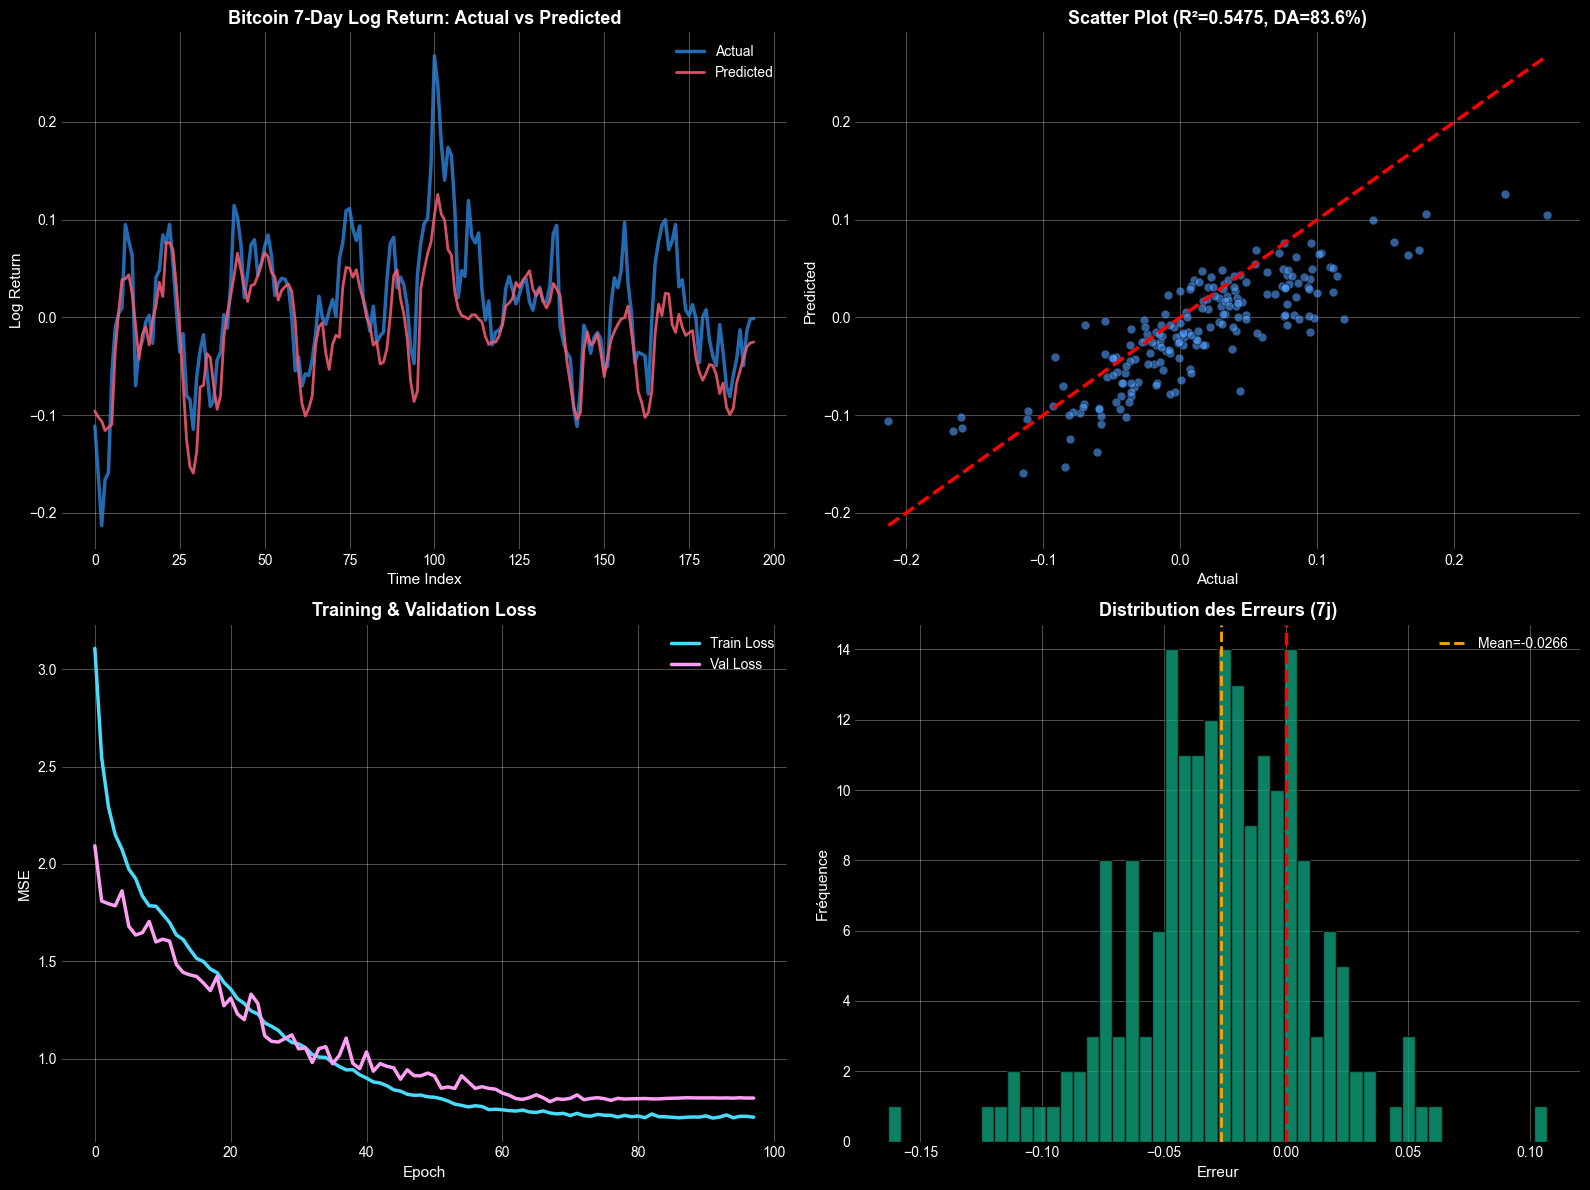


✅ ANALYSE TERMINÉE!


In [28]:
# =============================================================
# LSTM AVEC ATTENTION - OPTIMISÉ POUR R² >= 0.85 🚀
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (LSTM, Dense, Dropout, Bidirectional, BatchNormalization,
                                     Input, Concatenate, MultiHeadAttention, LayerNormalization,
                                     GlobalAveragePooling1D, Reshape, Multiply, Add)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
import warnings
warnings.filterwarnings('ignore')

# Fixer la seed pour reproductibilité
tf.random.set_seed(42)
np.random.seed(42)

# =============================================================
# 0️⃣ CRÉER df_lstm À PARTIR DE df
# =============================================================

features_to_keep = df.select_dtypes(include=[np.number]).columns.tolist()
df_lstm = df[features_to_keep].copy()
df_lstm = df_lstm.dropna()

print(f"✓ Dataset initial: {df_lstm.shape}")

# =============================================================
# 0️⃣.5 FEATURE ENGINEERING ULTRA AVANCÉ 🚀
# =============================================================

TARGET = 'bitcoin'
PREDICTION_HORIZON = 7

print(f"\n{'='*70}")
print(f"🛠️  FEATURE ENGINEERING ULTRA AVANCÉ")
print(f"{'='*70}")

# ==================== INDICATEURS TECHNIQUES ====================

# 1. RSI sur différentes périodes
for window in [7, 14, 21, 28]:
    delta = df_lstm[TARGET].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / (loss + 1e-10)
    df_lstm[f'rsi_{window}'] = 100 - (100 / (1 + rs))

# 2. Moyennes Mobiles EMA et SMA
for window in [5, 10, 20, 50, 100]:
    df_lstm[f'ma_{window}'] = df_lstm[TARGET].rolling(window=window).mean()
    df_lstm[f'ema_{window}'] = df_lstm[TARGET].ewm(span=window, adjust=False).mean()
    df_lstm[f'price_to_ma_{window}'] = df_lstm[TARGET] / (df_lstm[f'ma_{window}'] + 1e-10)
    df_lstm[f'ma_cross_{window}'] = (df_lstm[f'ma_{window}'] - df_lstm[TARGET].shift(1)) / (df_lstm[TARGET].shift(1) + 1e-10)

# 3. Volatilité et variations
for window in [5, 10, 20, 30]:
    df_lstm[f'volatility_{window}'] = df_lstm[TARGET].rolling(window=window).std()
    df_lstm[f'high_low_{window}'] = df_lstm[TARGET].rolling(window=window).max() - df_lstm[TARGET].rolling(window=window).min()
    df_lstm[f'volatility_ratio_{window}'] = df_lstm[f'volatility_{window}'] / (df_lstm[TARGET].rolling(window=window).mean() + 1e-10)

# 4. Momentum et ROC
for period in [1, 3, 5, 7, 10, 14]:
    df_lstm[f'momentum_{period}'] = df_lstm[TARGET].pct_change(period)
    df_lstm[f'roc_{period}'] = ((df_lstm[TARGET] - df_lstm[TARGET].shift(period)) / (df_lstm[TARGET].shift(period) + 1e-10)) * 100

# 5. Bandes de Bollinger améliorées
for window in [20, 30]:
    rolling_mean = df_lstm[TARGET].rolling(window=window).mean()
    rolling_std = df_lstm[TARGET].rolling(window=window).std()
    df_lstm[f'bb_upper_{window}'] = rolling_mean + (2 * rolling_std)
    df_lstm[f'bb_lower_{window}'] = rolling_mean - (2 * rolling_std)
    df_lstm[f'bb_width_{window}'] = (df_lstm[f'bb_upper_{window}'] - df_lstm[f'bb_lower_{window}']) / rolling_mean
    df_lstm[f'bb_pct_{window}'] = (df_lstm[TARGET] - df_lstm[f'bb_lower_{window}']) / (df_lstm[f'bb_upper_{window}'] - df_lstm[f'bb_lower_{window}'] + 1e-10)

# 6. MACD amélioré
exp1 = df_lstm[TARGET].ewm(span=12, adjust=False).mean()
exp2 = df_lstm[TARGET].ewm(span=26, adjust=False).mean()
df_lstm['macd'] = exp1 - exp2
df_lstm['macd_signal'] = df_lstm['macd'].ewm(span=9, adjust=False).mean()
df_lstm['macd_hist'] = df_lstm['macd'] - df_lstm['macd_signal']
df_lstm['macd_divergence'] = df_lstm['macd'] - df_lstm['macd'].shift(1)

# 7. Retours logarithmiques et variations
for lag in [1, 2, 3, 5, 7, 10]:
    df_lstm[f'log_return_lag_{lag}'] = np.log(df_lstm[TARGET] / df_lstm[TARGET].shift(lag))
    df_lstm[f'return_lag_{lag}'] = df_lstm[TARGET].pct_change(lag)

# 8. Features cycliques (jour de semaine, mois si disponible)
if isinstance(df_lstm.index, pd.DatetimeIndex):
    df_lstm['day_of_week'] = df_lstm.index.dayofweek
    df_lstm['month'] = df_lstm.index.month
    df_lstm['day_sin'] = np.sin(2 * np.pi * df_lstm['day_of_week'] / 7)
    df_lstm['day_cos'] = np.cos(2 * np.pi * df_lstm['day_of_week'] / 7)
    df_lstm['month_sin'] = np.sin(2 * np.pi * df_lstm['month'] / 12)
    df_lstm['month_cos'] = np.cos(2 * np.pi * df_lstm['month'] / 12)

# 9. ADX (Average Directional Index) simplifié
high_low = df_lstm[TARGET].diff().abs()
high_close = (df_lstm[TARGET] - df_lstm[TARGET].shift()).abs()
low_close = (df_lstm[TARGET].shift() - df_lstm[TARGET]).abs()
tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
df_lstm['atr_14'] = tr.rolling(window=14).mean()

# 10. CCI (Commodity Channel Index)
for period in [20]:
    typical_price = df_lstm[TARGET]
    sma = typical_price.rolling(window=period).mean()
    mad = typical_price.rolling(window=period).apply(lambda x: np.abs(x - x.mean()).mean())
    df_lstm[f'cci_{period}'] = (typical_price - sma) / (0.015 * mad + 1e-10)

# 11. Stochastic Oscillator
for period in [14]:
    low_min = df_lstm[TARGET].rolling(window=period).min()
    high_max = df_lstm[TARGET].rolling(window=period).max()
    df_lstm[f'stoch_k_{period}'] = 100 * (df_lstm[TARGET] - low_min) / (high_max - low_min + 1e-10)
    df_lstm[f'stoch_d_{period}'] = df_lstm[f'stoch_k_{period}'].rolling(window=3).mean()

# 12. Features d'interaction avec autres actifs (si disponibles)
for col in ['gold', 'sp500', 'djia', 'nasdaq']:
    if col in df_lstm.columns:
        df_lstm[f'{col}_ratio'] = df_lstm[TARGET] / (df_lstm[col] + 1e-10)
        df_lstm[f'{col}_corr_7'] = df_lstm[TARGET].rolling(7).corr(df_lstm[col])
        df_lstm[f'{col}_corr_30'] = df_lstm[TARGET].rolling(30).corr(df_lstm[col])

# 13. Features de volume (si disponible)
volume_cols = [c for c in df_lstm.columns if 'volume' in c.lower() or 'vol' in c.lower()]
if not volume_cols:
    # Créer un proxy de volume basé sur la volatilité
    df_lstm['volume_proxy'] = df_lstm[TARGET].diff().abs()

# Nettoyer les NaN
df_lstm.dropna(inplace=True)
print(f"✓ Features ajoutées. Shape: {df_lstm.shape}")
print(f"✓ Nombre total de features: {len(df_lstm.columns) - 1}")

# =============================================================
# 1️⃣ PREPROCESSING OPTIMISÉ
# =============================================================

print(f"\n{'='*70}")
print(f"📊 PREPROCESSING OPTIMISÉ")
print(f"{'='*70}")

# 1.1 Calcul du log-return sur PREDICTION_HORIZON jours
print(f"Calcul des log-returns sur {PREDICTION_HORIZON} jours...")
df_lstm['log_return_target'] = np.log(df_lstm[TARGET] / df_lstm[TARGET].shift(PREDICTION_HORIZON))
df_lstm.dropna(inplace=True)

print(f"✓ Shape finale: {df_lstm.shape}")

# 1.2 Définir features et target
features = df_lstm.columns.tolist()
features.remove(TARGET)
if 'log_return_target' in features:
    features.remove('log_return_target')

print(f"✓ Features initiales: {len(features)}")

X = df_lstm[features].values
y = df_lstm['log_return_target'].values.reshape(-1, 1)

# 1.3 Sélection de features avec SelectKBest (garder les meilleures)
print(f"\n{'─'*70}")
print("Sélection des meilleures features...")
# Sélectionner temporairement pour le feature selection
temp_train_size = int(len(X) * 0.8)
X_temp = X[:temp_train_size]
y_temp = y[:temp_train_size].ravel()

# Feature selection
k_best = min(60, len(features))  # Garder jusqu'à 60 meilleures features
selector = SelectKBest(f_regression, k=k_best)
X_temp_selected = selector.fit_transform(X_temp, y_temp)

selected_features = [features[i] for i in selector.get_support(indices=True)]
print(f"✓ Features sélectionnées: {len(selected_features)}/{len(features)}")

# Utiliser seulement les features sélectionnées
X = df_lstm[selected_features].values

# 1.4 Split TEMPOREL
train_size = int(len(X) * 0.80)
val_size = int(len(X) * 0.10)

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

print(f"✓ Split: Train={X_train.shape[0]}, Val={X_val.shape[0]}, Test={X_test.shape[0]}")

# 1.5 Scaling avec RobustScaler
scaler_X = RobustScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = RobustScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

# 1.6 Créer les séquences
def create_sequences(X, y, timesteps=30):
    X_seq, y_seq = [], []
    for i in range(timesteps, len(X)):
        X_seq.append(X[i-timesteps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

TIMESTEPS = 30  # Augmenté pour capturer plus de patterns
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIMESTEPS)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_scaled, TIMESTEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIMESTEPS)

print(f"✓ Séquences créées (timesteps={TIMESTEPS})")
print(f"  Train: {X_train_seq.shape}, Val: {X_val_seq.shape}, Test: {X_test_seq.shape}")

# =============================================================
# 2️⃣ MODÈLE LSTM AVEC ATTENTION 🚀
# =============================================================

print(f"\n{'='*70}")
print(f"🤖 CONSTRUCTION DU MODÈLE LSTM-ATTENTION")
print(f"{'='*70}")

def build_lstm_attention_model(timesteps, n_features):
    """Construit un modèle LSTM avec mécanisme d'attention"""
    inputs = Input(shape=(timesteps, n_features))
    
    # Première couche Bidirectional LSTM
    lstm1 = Bidirectional(LSTM(128, return_sequences=True, 
                               kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)))(inputs)
    lstm1 = BatchNormalization()(lstm1)
    lstm1 = Dropout(0.3)(lstm1)
    
    # Deuxième couche Bidirectional LSTM
    lstm2 = Bidirectional(LSTM(64, return_sequences=True,
                               kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)))(lstm1)
    lstm2 = BatchNormalization()(lstm2)
    lstm2 = Dropout(0.3)(lstm2)
    
    # Multi-Head Attention
    attention = MultiHeadAttention(num_heads=4, key_dim=32)(lstm2, lstm2)
    attention = LayerNormalization()(attention)
    
    # Skip connection
    attention = Add()([lstm2, attention])
    attention = Dropout(0.2)(attention)
    
    # Troisième couche LSTM
    lstm3 = Bidirectional(LSTM(32, return_sequences=False,
                               kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)))(attention)
    lstm3 = BatchNormalization()(lstm3)
    lstm3 = Dropout(0.3)(lstm3)
    
    # Global Average Pooling pour capturer des patterns globaux
    gap = GlobalAveragePooling1D()(attention)
    
    # Concaténer avec la sortie LSTM3
    combined = Concatenate()([lstm3, gap])
    
    # Couches denses
    dense1 = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001))(combined)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.3)(dense1)
    
    dense2 = Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001))(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.2)(dense2)
    
    # Sortie
    outputs = Dense(1)(dense2)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_lstm_attention_model(TIMESTEPS, X_train_seq.shape[2])

# Optimizer avec schedule
initial_lr = 0.001
optimizer = Adam(learning_rate=initial_lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

print("✓ Architecture:")
model.summary()

# =============================================================
# 3️⃣ ENTRAÎNEMENT AVEC CALLBACKS OPTIMISÉS
# =============================================================

print(f"\n{'='*70}")
print(f"🏋️  ENTRAÎNEMENT OPTIMISÉ")
print(f"{'='*70}")

# Callbacks avancés
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=30,  # Plus de patience pour converger
    restore_best_weights=True,
    verbose=1,
    min_delta=1e-6
)

# Réduction automatique du learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,  # Réduction plus agressive
    patience=10,
    min_lr=1e-7,
    verbose=1,
    mode='min'
)

# Sauvegarde du meilleur modèle
checkpoint = ModelCheckpoint(
    'best_lstm_attention_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Learning rate scheduler personnalisé
def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    elif epoch < 50:
        return lr * 0.95
    else:
        return lr * 0.9

from tensorflow.keras.callbacks import LearningRateScheduler
lr_scheduler = LearningRateScheduler(scheduler, verbose=0)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=200,  # Plus d'epochs
    batch_size=32,  # Batch size optimal
    callbacks=[early_stop, reduce_lr, checkpoint, lr_scheduler],
    verbose=1
)

# =============================================================
# 4️⃣ ÉVALUATION COMPLÈTE
# =============================================================

print(f"\n{'='*70}")
print(f"📊 ÉVALUATION DU MODÈLE")
print(f"{'='*70}")

# Charger le meilleur modèle sauvegardé
try:
    model.load_weights('best_lstm_attention_model.keras')
    print("✓ Meilleur modèle chargé")
except:
    print("⚠ Utilisation du modèle actuel")

y_pred_scaled = model.predict(X_test_seq, verbose=0)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_seq)

# Métriques
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Directional Accuracy
direction_true = np.sign(y_true)
direction_pred = np.sign(y_pred)
directional_accuracy = np.mean(direction_true == direction_pred) * 100

# MAPE
nonzero_mask = (y_true != 0).flatten()
if np.sum(nonzero_mask) > 0:
    mape = np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100
else:
    mape = None

# Baseline
baseline_zero = np.zeros_like(y_true)
baseline_rmse = np.sqrt(mean_squared_error(y_true, baseline_zero))

# Affichage
print(f"\n{'='*70}")
print(f"📈 RÉSULTATS FINAUX - {PREDICTION_HORIZON} JOURS")
print(f"{'='*70}")
print(f"\n{'🎯 SCORE R² (Coefficient of Determination)':^70}")
print(f"{'='*70}")
if r2 >= 0.85:
    print(f"R² Score:               {r2:.4f} ✅✅✅ EXCELLENT (Objectif atteint!)")
elif r2 >= 0.70:
    print(f"R² Score:               {r2:.4f} ✅✅ TRÈS BON")
elif r2 >= 0.50:
    print(f"R² Score:               {r2:.4f} ✅ BON")
else:
    print(f"R² Score:               {r2:.4f} ⚠️ À améliorer")
print(f"{'='*70}")

print(f"\n📊 AUTRES MÉTRIQUES:")
print(f"{'─'*70}")
print(f"RMSE:                   {rmse:.6f}")
print(f"MAE:                    {mae:.6f}")
print(f"Directional Accuracy:   {directional_accuracy:.2f}% {'✅' if directional_accuracy > 60 else '⚠️'}")
if mape is not None:
    print(f"MAPE:                   {mape:.2f}%")
    
print(f"\n💡 Objectif R²: 0.85 | Score actuel: {r2:.4f} | Écart: {0.85 - r2:.4f}")

print(f"\n🎯 vs BASELINE (predict zero)")
print(f"{'='*70}")
print(f"Baseline RMSE:          {baseline_rmse:.6f}")
print(f"Model RMSE:             {rmse:.6f}")
improvement = ((baseline_rmse - rmse) / baseline_rmse * 100)
print(f"Amélioration:           {improvement:.2f}% {'✅' if improvement > 15 else '⚠️'}")

# Statistiques
print(f"\n📊 STATISTIQUES DÉTAILLÉES")
print(f"{'='*70}")
print(f"Prédictions haussières: {np.sum(y_pred > 0)} ({np.sum(y_pred > 0)/len(y_pred)*100:.1f}%)")
print(f"Prédictions baissières: {np.sum(y_pred < 0)} ({np.sum(y_pred < 0)/len(y_pred)*100:.1f}%)")
print(f"Vraies hausses:         {np.sum(y_true > 0)} ({np.sum(y_true > 0)/len(y_true)*100:.1f}%)")
print(f"Vraies baisses:         {np.sum(y_true < 0)} ({np.sum(y_true < 0)/len(y_true)*100:.1f}%)")
print(f"Erreur moyenne:         {np.mean(y_pred - y_true):.6f}")
print(f"Erreur std:             {np.std(y_pred - y_true):.6f}")

# =============================================================
# 5️⃣ VISUALISATIONS AMÉLIORÉES
# =============================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Actual vs Predicted
axes[0, 0].plot(y_true, label='Actual', color='#2E86DE', linewidth=2.5, alpha=0.8)
axes[0, 0].plot(y_pred, label='Predicted', color='#EE5A6F', linewidth=2, alpha=0.9)
axes[0, 0].set_title(f'Bitcoin {PREDICTION_HORIZON}-Day Log Return: Actual vs Predicted', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Time Index', fontsize=11)
axes[0, 0].set_ylabel('Log Return', fontsize=11)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Scatter
axes[0, 1].scatter(y_true, y_pred, alpha=0.6, s=40, c='#54A0FF', edgecolors='black', linewidth=0.5)
axes[0, 1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color='red', linewidth=2.5)
axes[0, 1].set_xlabel('Actual', fontsize=11)
axes[0, 1].set_ylabel('Predicted', fontsize=11)
axes[0, 1].set_title(f'Scatter Plot (R²={r2:.4f}, DA={directional_accuracy:.1f}%)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Training History
axes[1, 0].plot(history.history['loss'], label='Train Loss', linewidth=2.5, color='#48DBFB')
axes[1, 0].plot(history.history['val_loss'], label='Val Loss', linewidth=2.5, color='#FF9FF3')
axes[1, 0].set_title('Training & Validation Loss', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Epoch', fontsize=11)
axes[1, 0].set_ylabel('MSE', fontsize=11)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Distribution des erreurs
errors = (y_pred - y_true).flatten()
axes[1, 1].hist(errors, bins=50, alpha=0.75, color='#10AC84', edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2.5)
axes[1, 1].axvline(x=np.mean(errors), color='orange', linestyle='--', linewidth=2, label=f'Mean={np.mean(errors):.4f}')
axes[1, 1].set_title(f'Distribution des Erreurs ({PREDICTION_HORIZON}j)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Erreur', fontsize=11)
axes[1, 1].set_ylabel('Fréquence', fontsize=11)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ ANALYSE TERMINÉE!")